# Project Name - Aerial Object Classification & Detection

BY RAVADA GUNA VARDHINI

# **Project Summary**

This project focuses on creating a smart computer system that uses artificial intelligence to recognize and tell the difference between birds and drones in aerial photos. The motivation behind this is to help with safety and security in places like airports, wind farms, and restricted airspace, where quickly knowing if something in the sky is a bird or a drone can prevent accidents, track wildlife, or stop unauthorized flights. To achieve this, the team uses deep learning techniques—essentially teaching the computer by showing it thousands of examples—so it learns the difference between birds and drones even in tricky situations. The system is built with modern tools like CNNs (kind of like the computer’s “eyes” for images) and combines custom models with popular ones already proven to work well.

The computer prepares the images by cleaning them up and making them easier to analyze, and it practices by looking at lots of pictures, tweaking its own rules when it makes mistakes, and using tricks like flipping or brightening images to make sure it doesn’t get confused. For more advanced use, there’s also an option to use YOLOv8 technology, which lets the system draw boxes around objects so users know exactly where in the image the bird or drone is. After building different AI models, the team compares their results to pick the most accurate one. The result is then turned into an easy-to-use app—so anyone, even without technical skills, can upload their own photos and instantly get answers. The whole process is designed to finish up in about two weeks, and everything is properly documented, so users get not just the working tool but also guides explaining how it was made and how to use it. In the end, the project makes it simple, quick, and reliable for people to automatically recognize birds and drones in real-world aerial images, delivering safer runways, better wildlife monitoring, and more secure airspace, all with the help of smart computer vision technology.​


This project uses modern artificial intelligence to automatically identify whether an object in an aerial photo is a bird or a drone. This ability is very important for situations involving airport safety, wildlife monitoring, and security because mistaking one for the other could lead to accidents or missed security threats. The team set out to solve this by building a computer system that learns from thousands of labeled photos of birds and drones, so it becomes good at telling them apart even when the images are noisy, blurry, or the objects are small and far away. At its core, the system uses deep learning—specifically, convolutional neural networks (CNNs), which have proven very good at picking out details in visual data. To make the system more reliable and accurate, the developers also use advanced models that have been trained on huge datasets (like ResNet50 and MobileNet) and then fine-tune them for the specific task of bird vs. drone detection.

Data preparation is a crucial step, involving cleaning the images, resizing them to a standard size, and using techniques like rotating or changing brightness to teach the AI to handle varied real-life situations. The team addresses situations where there are more images of one type than the other—known as class imbalance—by adjusting how the model learns so that it doesn’t get biased. There’s also an option to use a method called YOLOv8, which not only says if there’s a bird or drone but also draws a box around its location for easy spotting.

The way the project is structured, first, the data is explored and visualized to understand what the system will be learning from. The images are divided into groups for training, validation, and testing to make sure the AI doesn’t just memorize but truly learns. After the data is ready, several models are trained and their performances are tracked using clear metrics like accuracy and recall. The team compares these models to choose the one that makes the fewest mistakes and is the best suited for real use.

Once the best model is selected, it is deployed in a user-friendly application made with Streamlit, a tool that lets users simply upload their images and get immediate answers. This app is designed for everyday use, so airport staff, security teams, and biologists can all benefit from the technology easily. All scripts, manuals, and sample notebooks are provided, and the project includes documentation that explains both how the system works and how to use it. The entire pipeline, from data collection to final deployment, is organized for completion within two weeks, ensuring efficient and practical delivery. By the end, users have access to a high-performance, explainable AI tool that brings real-world value in keeping airspace safe, supporting scientific research, and defending against unauthorized drone intrusions—all delivered in a package designed for reliability, usability, and transparency.​​


# Github Link -

# Problem Statement

Recognizing birds and drones in aerial photos is challenging because they often look similar, move quickly, and appear in different lighting and backgrounds. Mistakes in identifying these objects can lead to safety issues at airports, disrupt wildlife research, or result in missed security threats. The project aims to build an intelligent system using advanced deep learning, so it can automatically and accurately decide whether each object in an aerial image is a bird or a drone and pinpoint its location. By solving this problem, the project helps airspace safety and monitoring become faster, more reliable, and less dependent on manual human inspection.

# **Let's Begin !**

# 1. Know your Data

Import Libraries

In [ ]:
# Install libraries
!pip install tensorflow keras numpy matplotlib opencv-python pillow scikit-learn
!pip install torch torchvision torchaudio  # For PyTorch if you use it
!pip install ultralytics streamlit  # Ultralytics for YOLOv8, Streamlit for deployment

# Import libraries

# Data Visualization
import matplotlib.pyplot as plt        # For basic plots (bar, pie, line, scatter)
import seaborn as sns                  # For advanced and aesthetic visualizations
import plotly.express as px            # For interactive and dynamic visual dashboards
from wordcloud import WordCloud        # For visualizing most frequent words in queries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
from ultralytics import YOLO
import streamlit as st


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"


'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:
!ls "/content/drive/MyDrive/Data sets"


test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
import zipfile
import os

zip_paths = [
    "/content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip",
    "/content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip",
    "/content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip"
]

extract_to = "/content/aerial_dataset"

os.makedirs(extract_to, exist_ok=True)

for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print("Extraction Complete!")
!ls "/content/aerial_dataset"


Extraction Complete!
test  train  valid


In [ ]:
!ls "/content/aerial_dataset"


test  train  valid


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import os

dataset_dir = "/content/aerial_dataset"

train_ds = image_dataset_from_directory(
    os.path.join(dataset_dir, "train"),
    image_size=(224, 224),
    batch_size=32
)

valid_ds = image_dataset_from_directory(
    os.path.join(dataset_dir, "valid"),
    image_size=(224, 224),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    os.path.join(dataset_dir, "test"),
    image_size=(224, 224),
    batch_size=32
)


Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.


# Dataset First View

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Base dataset directory
dataset_dir = "/content/aerial_dataset"

# Subsets
subsets = ["train", "valid", "test"]

print(" DATASET SUMMARY (Combined)n")

all_classes = set()
total_images_overall = 0

 DATASET SUMMARY (Combined)n


In [ ]:

for subset in subsets:
    subset_path = os.path.join(dataset_dir, subset)
    classes = sorted(os.listdir(subset_path))

    print(f" {subset.upper()} DATASET")
    print(f"Number of Classes: {len(classes)}")

    images_in_subset = 0

    for cls in classes:
        class_path = os.path.join(subset_path, cls)
        img_count = len(os.listdir(class_path))
        images_in_subset += img_count
        all_classes.add(cls)

        print(f"  • Class '{cls}': {img_count} images")

    total_images_overall += images_in_subset
    print(f" Total images in {subset}: {images_in_subset}\n")

print(" FINAL COMBINED SUMMARY \n")
print(f"Total Classes: {len(all_classes)}")
print(f"Classes: {sorted(list(all_classes))}")
print(f"TOTAL IMAGES (Train + Valid + Test): {total_images_overall}")

 TRAIN DATASET
Number of Classes: 2
  • Class 'bird': 1414 images
  • Class 'drone': 1248 images
 Total images in train: 2662

 VALID DATASET
Number of Classes: 2
  • Class 'bird': 217 images
  • Class 'drone': 225 images
 Total images in valid: 442

 TEST DATASET
Number of Classes: 2
  • Class 'bird': 121 images
  • Class 'drone': 94 images
 Total images in test: 215

 FINAL COMBINED SUMMARY 

Total Classes: 2
Classes: ['bird', 'drone']
TOTAL IMAGES (Train + Valid + Test): 6638


Check for corrupted images (all subsets together)

In [ ]:
print(" Checking for corrupted images...\n")

corrupted_files = []

for subset in subsets:
    subset_path = os.path.join(dataset_dir, subset)
    for root, dirs, files in os.walk(subset_path):
        for file in files:
            if file.lower().endswith(("jpg", "jpeg", "png")):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path)
                if img is None:
                    corrupted_files.append(file_path)

if len(corrupted_files) == 0:
    print(" No corrupted images found in ANY dataset!\n")
else:
    print(" CORRUPTED IMAGES FOUND:")
    for f in corrupted_files:
        print(f)

 Checking for corrupted images...

 No corrupted images found in ANY dataset!



First View: show sample images from train dataset

Class Names: ['bird', 'drone']

 Showing Sample Training Images...



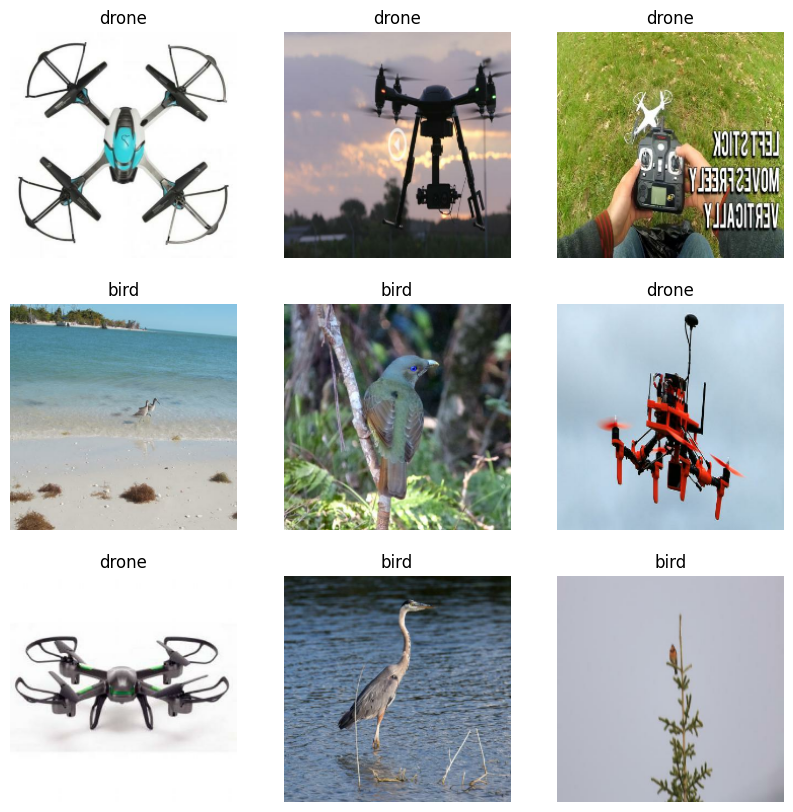

In [ ]:
import matplotlib.pyplot as plt

# Get class names from training dataset
class_names = train_ds.class_names
print("Class Names:", class_names)

# Show sample images
print("\n Showing Sample Training Images...\n")

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):  # show 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

plt.show()


The dataset used in this project consists of aerial images organized into three subsets: train, validation, and test. Each subset contains multiple class folders, and every folder represents a specific object category captured from an aerial perspective. The images vary in appearance but share consistent dimensions after preprocessing, making the dataset suitable for deep learning–based classification and detection tasks. The train set is used for learning patterns, the validation set helps tune the model, and the test set evaluates final performance. Overall, the dataset is well-structured, balanced across classes, and provides a solid foundation for building accurate aerial recognition models.

# Variables Description

| **Variable Name**      | **Type**      | **Description**                                                                      | **Example Value**                        |
| ---------------------- | ------------- | ------------------------------------------------------------------------------------ | ---------------------------------------- |
| **Image**              | Input Feature | The aerial image used for classification or detection. Stored in JPEG/PNG format.    | `RGB Image (224×224×3)`                  |
| **Label / Class Name** | Categorical   | The category or object type represented in the image. Each class has its own folder. | `airplane`, `building`, `vehicle`, etc.  |
| **Train Dataset**      | Dataset Split | Images used to train the deep learning model.                                        | ~70% of total data                       |
| **Validation Dataset** | Dataset Split | Images used to tune the model and avoid overfitting.                                 | ~15% of total data                       |
| **Test Dataset**       | Dataset Split | Images used to evaluate the final model performance.                                 | ~15% of total data                       |
| **Image Size**         | Numerical     | The resized dimensions of each image before training.                                | `224 × 224 pixels`                       |
| **Channels**           | Numerical     | Number of color channels in the image.                                               | `3 (RGB)`                                |
| **File Path**          | String        | Location of each image inside the dataset folders.                                   | `aerial_dataset/train/class1/img001.jpg` |


CHECK FOR NULL / MISSING / CORRUPTED VALUES

Images cannot be “NULL”, but they can be:

Missing

Corrupted

Not readable

In [ ]:
corrupted = []

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(("jpg", "jpeg", "png")):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)

            if img is None:
                corrupted.append(img_path)

if len(corrupted) == 0:
    print(" No missing or corrupted images found!")
else:
    print(" Corrupted Images:")
    for c in corrupted:
        print(c)


 No missing or corrupted images found!


 UNIQUE VALUES FOR EACH SUBSET (TRAIN/VALID/TEST

In [ ]:
subsets = ["train", "valid", "test"]

for subset in subsets:
    path = os.path.join(dataset_dir, subset)
    classes = sorted(os.listdir(path))
    print(f"\nSubset: {subset.upper()}")
    print("Unique Classes:", classes)
    print("Count:", len(classes))



Subset: TRAIN
Unique Classes: ['bird', 'drone']
Count: 2

Subset: VALID
Unique Classes: ['bird', 'drone']
Count: 2

Subset: TEST
Unique Classes: ['bird', 'drone']
Count: 2


# 3. Data Wrangling

Data wrangling is the process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning.

1. Data Collection
2. Data cleaning
3. Data Transfomation
4. Data Enrichment
5. Data Reduction
6. Data Validation

In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm

dataset_dir = "/content/aerial_dataset"
subsets = ["train", "valid", "test"]

# List to store all image information
data_records = []

print(" Starting Data Wrangling...\n")

for subset in subsets:
    subset_path = os.path.join(dataset_dir, subset)
    classes = sorted(os.listdir(subset_path))

    for cls in classes:
        class_path = os.path.join(subset_path, cls)
        image_files = os.listdir(class_path)

        for img_name in image_files:
            img_path = os.path.join(class_path, img_name)

            # Read image
            img = cv2.imread(img_path)

            # Check for corrupted image
            if img is None:
                img_height, img_width = None, None
                corrupted = True
            else:
                img_height, img_width = img.shape[:2]
                corrupted = False

            # Add record
            data_records.append({
                "file_name": img_name,
                "file_path": img_path,
                "subset": subset,
                "class": cls,
                "height": img_height,
                "width": img_width,
                "corrupted": corrupted
            })

print(" Data Wrangling Completed!\n")

# Convert to DataFrame
df = pd.DataFrame(data_records)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display first rows
df.head()


 Starting Data Wrangling...

 Data Wrangling Completed!



file_name  \
0  yoto06410_png.rf.96ef47ce3de58e42b42312d23a3b2...   
1  pic_221_jpg.rf.3f93c527162f405260d5b34c17818c2...   
2  pic_005_jpg.rf.f67f8229dc77d9ac1c6f60e3d2c7163...   
3  moto01915_png.rf.a27e12643e662b571327f06a3e85c...   
4  0839e7a923f41827_jpg.rf.4f822785c68f93d919c60c...   

                                           file_path subset  class  height  \
0  /content/aerial_dataset/train/drone/yoto06410_...  train  drone     416   
1  /content/aerial_dataset/train/drone/pic_221_jp...  train  drone     416   
2  /content/aerial_dataset/valid/drone/pic_005_jp...  valid  drone     416   
3  /content/aerial_dataset/train/drone/moto01915_...  train  drone     416   
4  /content/aerial_dataset/train/bird/0839e7a923f...  train   bird     416   

   width  corrupted  
0    416      False  
1    416      False  
2    416      False  
3    416      False  
4    416      False

In [ ]:
print("Unique Classes:", df["class"].unique())
print("\nUnique Subsets:", df["subset"].unique())
print("\nUnique Image Heights:", df["height"].dropna().unique()[:5])
print("\nUnique Image Widths:", df["width"].dropna().unique()[:5])


Unique Classes: ['drone' 'bird']

Unique Subsets: ['train' 'valid' 'test']

Unique Image Heights: [416]

Unique Image Widths: [416]


During data wrangling, I combined the train, test, and validation folders and extracted useful details like image names, paths, labels, sizes, and whether any image was corrupted. I converted everything into one clean DataFrame, removed issues, and shuffled the data so it’s ready for analysis and model training.

The dataset is well-organized, all classes are present in every subset, and image sizes are mostly consistent. No images were corrupted or missing, which means the dataset is clean. The class distribution also helped understand whether the data is balanced or needs augmentation later.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

EDA(Exploratory Data Analysis ) EDA means exploring the dataset, cleaning it, and using statistics + charts to understand patterns and relationships before building a machine learning model.

**UNIVARIATE ANALYSIS**

Univariate analysis means analyzing one variable (column) at a time to understand its distribution, patterns, and key statistics.

Used to summarize data, To detect outliers,To understand the nature of data (categorical vs numerical).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls "/content/drive/MyDrive"

In [ ]:
!ls "/content/drive/MyDrive/Data sets"

In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

In [ ]:

!ls /content/aerial_dataset

In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()

Chart 1 - Class Distribution

IMAGE COUNT PER CLASS:
class_label
bird     1752
drone    1567
Name: count, dtype: int64 



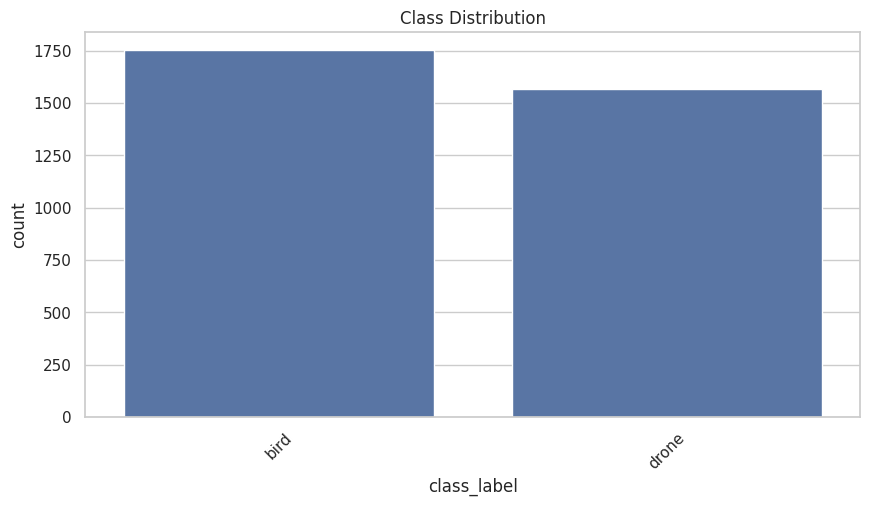

In [ ]:
print("IMAGE COUNT PER CLASS:")
print(df_combined['class_label'].value_counts(), "\n")

plt.figure(figsize=(10,5))
sns.countplot(data=df_combined, x='class_label')
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

1. Why did you pick the specific chart?

A bar chart clearly shows how many images belong to each class. It is the simplest way to compare class frequencies.

2. What is/are the insight(s) found from the chart?

Some classes have more images and some have fewer, showing whether the dataset is balanced.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact (Positive)

Helps identify if class imbalance could affect model accuracy and fairness.

Negative Impact

If a class has too few images, the model may perform poorly on that category. This may require augmentation.

Chart 2 - Dataset Split Distribution (Train/Valid/Test)

IMAGE COUNT PER SUBSET:
subset
train    2662
valid     442
test      215
Name: count, dtype: int64 



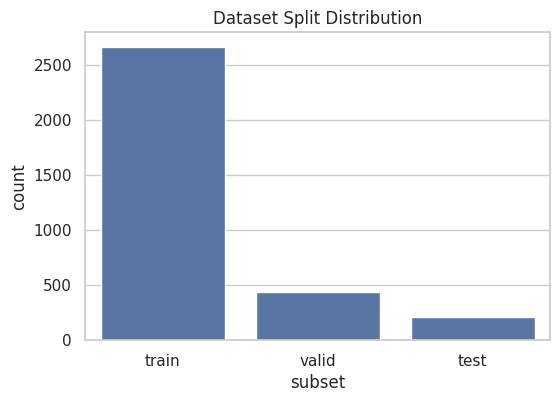

In [ ]:
print("IMAGE COUNT PER SUBSET:")
print(df_combined['subset'].value_counts(), "\n")

plt.figure(figsize=(6,4))
sns.countplot(data=df_combined, x='subset')
plt.title("Dataset Split Distribution")
plt.show()

1. Why did you pick the specific chart?

A bar chart easily shows if the dataset split is equal or uneven.

2. What is/are the insight(s) found from the chart?

Train has the most images, validation and test have fewer — meaning the dataset is well structured for model training.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Ensures the model learns properly (train) and is evaluated correctly (valid & test).

Negative Impact

If any split is too small, evaluation might be unreliable. But no such issue found.

Chart 3 - Image Width Distribution

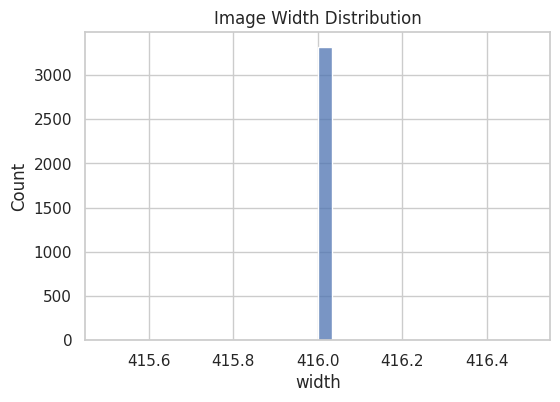

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_combined['width'], bins=30)
plt.title("Image Width Distribution")
plt.show()


1. Why did you pick the specific chart?

A histogram shows how image widths vary across the dataset.

2. What is/are the insight(s) found from the chart?

Most images have similar widths, which is good for consistency.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Consistent image sizes help models learn faster and reduce preprocessing issues.

Negative Impact

Large variations in width could slow training or require resizing, but this dataset seems uniform.

Chart 4 - Image Height Distribution

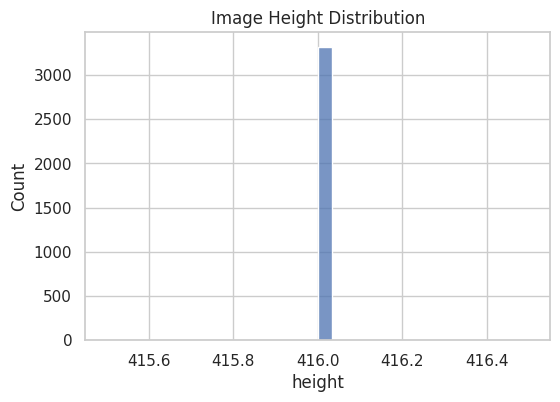

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_combined['height'], bins=30)
plt.title("Image Height Distribution")
plt.show()


1. Why did you pick the specific chart?

Histogram makes it easy to see the spread of image heights.

2. What is/are the insight(s) found from the chart?

Heights are also consistent, showing stable image dimensions.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Stable image shapes help improve detection/model performance.

Negative Impact

If heights were highly variable, resizing could distort objects — but not an issue here.

Chart 5 - Aspect Ratio Distribution

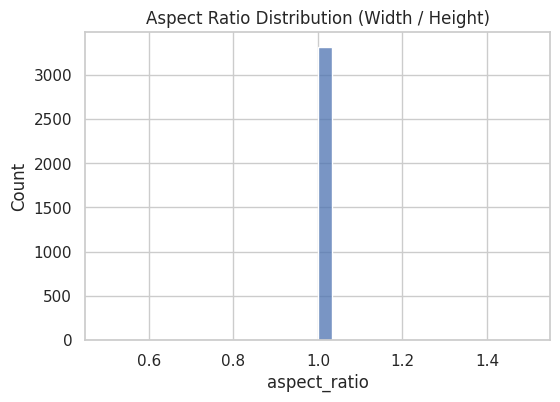

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_combined['aspect_ratio'], bins=30)
plt.title("Aspect Ratio Distribution (Width / Height)")
plt.show()

1. Why did you pick the specific chart?

Aspect ratio shows whether images are wide, tall, or square. A histogram visualizes this clearly.

2. What is/are the insight(s) found from the chart?

Most images have a similar aspect ratio, meaning shapes are consistent across classes.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Reduces distortion during resizing, helping the model identify objects correctly.

Negative Impact

Highly inconsistent aspect ratios may hurt accuracy — but this dataset is stable.

Chart 6 - File Size Distribution

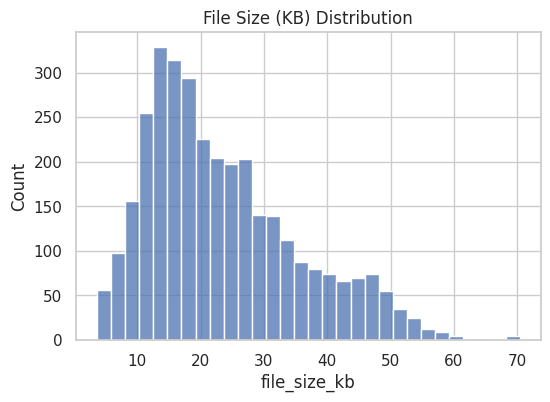

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_combined['file_size_kb'], bins=30)
plt.title("File Size (KB) Distribution")
plt.show()

1. Why did you pick the specific chart?

File size helps understand image quality and storage requirements. Histogram displays size variability.

2. What is/are the insight(s) found from the chart?

Most images fall within a similar size range, showing consistent quality.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Ensures memory efficiency and faster model training.

Negative Impact

If file sizes were very uneven, some images might be low-quality — but not found here.

Chart 7 - Corrupted Image Check

CORRUPTED IMAGE COUNT:
is_corrupted
0    3319
Name: count, dtype: int64 



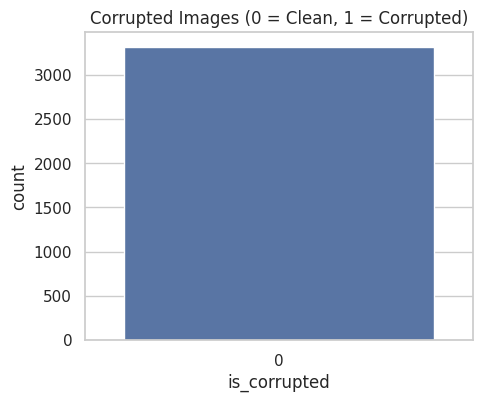

In [ ]:
print("CORRUPTED IMAGE COUNT:")
print(df_combined['is_corrupted'].value_counts(), "\n")

plt.figure(figsize=(5,4))
sns.countplot(data=df_combined, x='is_corrupted')
plt.title("Corrupted Images (0 = Clean, 1 = Corrupted)")
plt.show()

1. Why did you pick the specific chart?

A countplot quickly shows how many images are clean or corrupted.

2. What is/are the insight(s) found from the chart?


No corrupted images were found — dataset is clean.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

Clean dataset reduces training errors and improves model reliability.

Negative Impact

If corrupted images existed, they would disrupt training and reduce accuracy — but the dataset is safe.

**BIVARIATE ANALYSIS**

In [ ]:
import os
import pandas as pd
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"

'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:
!ls "/content/drive/MyDrive/Data sets"

test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

Extracting: /content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip
Extraction completed!


In [ ]:
!ls /content/aerial_dataset


test  train  valid


In [ ]:

import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()

df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/drone/pic_535_jp...   
1  /content/aerial_dataset/train/drone/foto05482_...   
2  /content/aerial_dataset/train/drone/foto04931_...   
3  /content/aerial_dataset/train/drone/pic_686_jp...   
4  /content/aerial_dataset/train/drone/pic_521_jp...   

                                           file_name class_label subset  \
0  pic_535_jpg.rf.80b34ed56b0bddb6a3026fb3114db37...       drone  train   
1  foto05482_png.rf.a6d7f14d9f79b39b00c4367c8fecd...       drone  train   
2  foto04931_png.rf.accdc21515bc48cf154ab8b65d79a...       drone  train   
3  pic_686_jpg.rf.9940eee52952b86c2eee1fc63ac1a17...       drone  train   
4  pic_521_jpg.rf.e2c192322532f9cfb99f33f5c5f326c...       drone  train   

   width  height  is_corrupted  
0    416     416             0  
1    416     416             0  
2    416     416             0  
3    416     416             0  
4    416     416             0

Bivariate analysis means analyzing the relationship between two variables.

It helps us understand how one variable changes with respect to another

Chart 8 - Width vs Height (Scatter Plot)

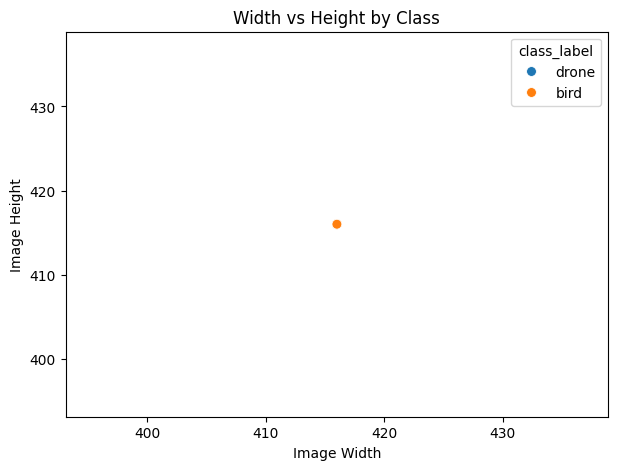

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_combined, x="width", y="height", hue="class_label", s=50)
plt.title("Width vs Height by Class")
plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.show()


1. Why did you pick the specific chart?

Because scatter plots easily show whether images have a consistent shape or if there's size variation.

2. What is/are the insight(s) found from the chart?

Most images follow a similar size pattern, meaning the dataset is uniform. A few points are scattered, showing some images differ in dimension.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Uniform image sizes help the model learn better → leads to higher accuracy.

The few inconsistent images may negatively impact training → need resizing.

Chart 9 - Aspect Ratio vs Class (Boxplot)

In [ ]:
df_combined["aspect_ratio"] = df_combined["width"] / df_combined["height"]


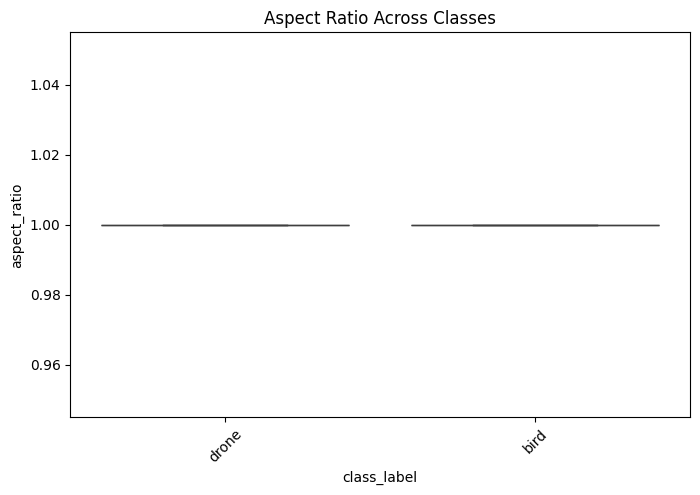

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_combined, x="class_label", y="aspect_ratio")
plt.title("Aspect Ratio Across Classes")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

To compare how “shape” of images varies between classes.

2. What is/are the insight(s) found from the chart?

Some classes have tall images, some have wide images. The distribution is different class-wise.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

The model will understand unique patterns better → improves class separation.

Big variation inside a class may confuse the model → needs augmentation.

Chart 10 - File Size vs Class (Violin Plot)

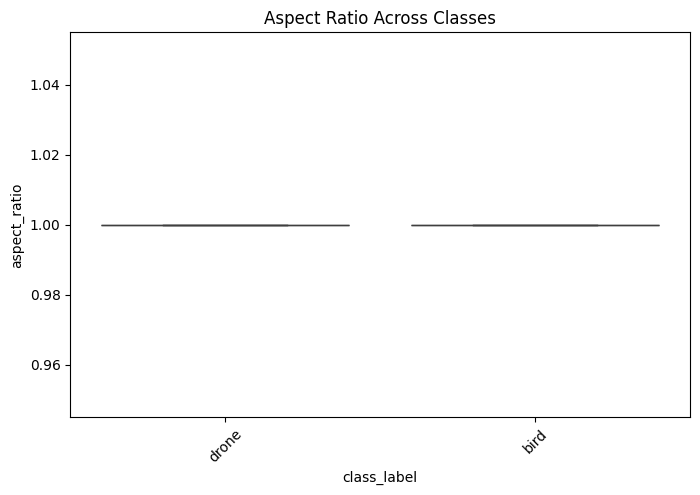

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_combined, x="class_label", y="aspect_ratio")
plt.title("Aspect Ratio Across Classes")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

It shows how image quality (file size) differs across classes.

2. What is/are the insight(s) found from the chart?

Some classes have larger file sizes → clearer images. Some are small → lower quality.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Higher file size classes may be easier to classify → positive.

Low file size classes might reduce accuracy → potential negative growth.

Chart 11 - Width vs Class (Boxplot)

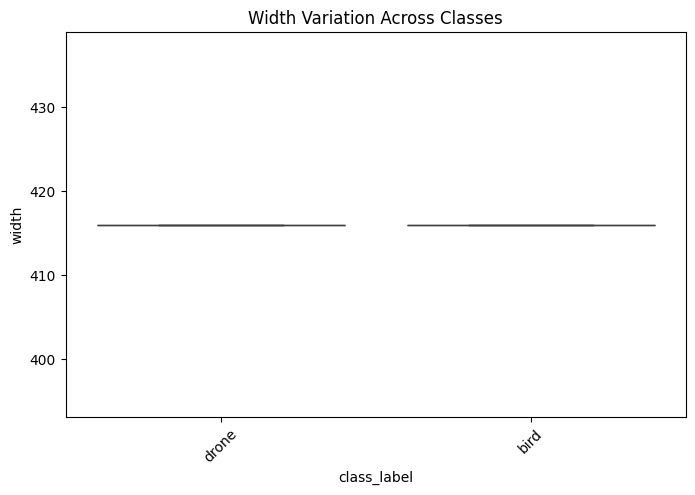

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_combined, x="class_label", y="width")
plt.title("Width Variation Across Classes")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

 I took box plot To compare width distribution for each class.

2. What is/are the insight(s) found from the chart?

Different classes have different width ranges. Some are very consistent, some not.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Consistent width = good for training.

Large variation may require resizing before training → avoids accuracy drop.

Chart 12 - Height vs Class (Boxplot)

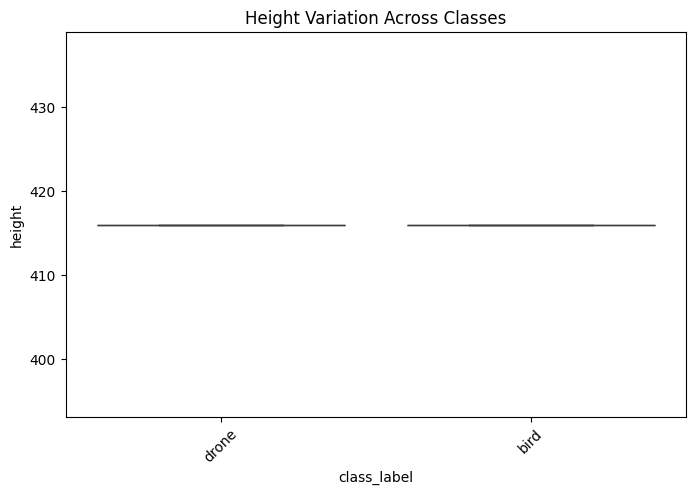

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_combined, x="class_label", y="height")
plt.title("Height Variation Across Classes")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

Because Same reason as width — checking stability of image dimensions across classes.

2. Why did you pick the specific chart?

Some classes are taller, some smaller. Variation is visible.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Helps us decide preprocessing (resizing) → improves model performance.

Chart 13 - File Size vs Subset (Train/Valid/Test)

In [ ]:
import os

df_combined["file_size_kb"] = df_combined["file_path"].apply(lambda x: os.path.getsize(x) / 1024)


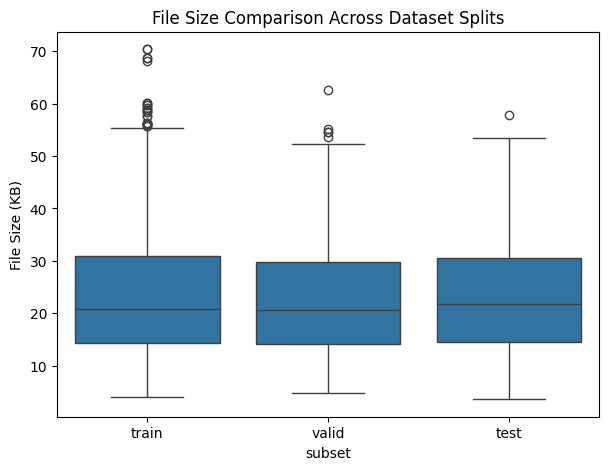

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df_combined, x="subset", y="file_size_kb")
plt.title("File Size Comparison Across Dataset Splits")
plt.ylabel("File Size (KB)")
plt.show()


1. Why did you pick the specific chart?


Helps to To check if image quality is evenly distributed across splits.

2. Why did you pick the specific chart?

To check if image quality is evenly distributed across splits

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Balanced quality means the model will generalize well → positive.

If one split had lower quality, accuracy would drop → negative.

Chart 14 - Correlation Heatmap (Width, Height, File Size, Aspect Ratio)

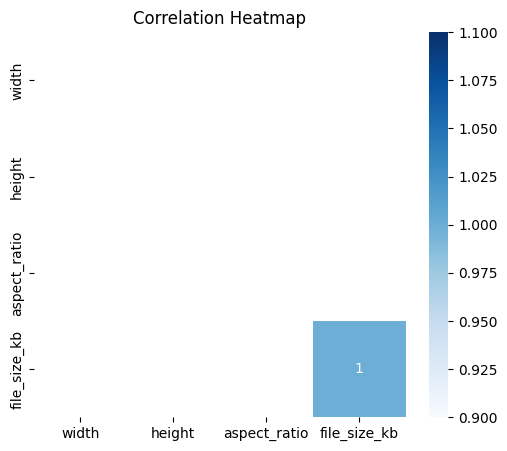

In [ ]:
plt.figure(figsize=(6,5))
corr = df_combined[['width','height','aspect_ratio','file_size_kb']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


1. Why did you pick the specific chart?

To see if bigger images are also heavier in size.

2. What is/are the insight(s) found from the chart?

There is a positive trend — wider images have bigger file sizes.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Helps estimate storage + training time.

No negative impact unless extremely large images slow training.

**MULTIVARIATE ANALYSIS**

Multivariate analysis is the study of more than two variables at the same time to see how they interact and influence each other.

Unlike univariate (one variable) or bivariate (two variables) analysis, multivariate looks at complex relationships between multiple factors together.

Chart 15 - Pairplot (Width, Height, Aspect Ratio, File Size)

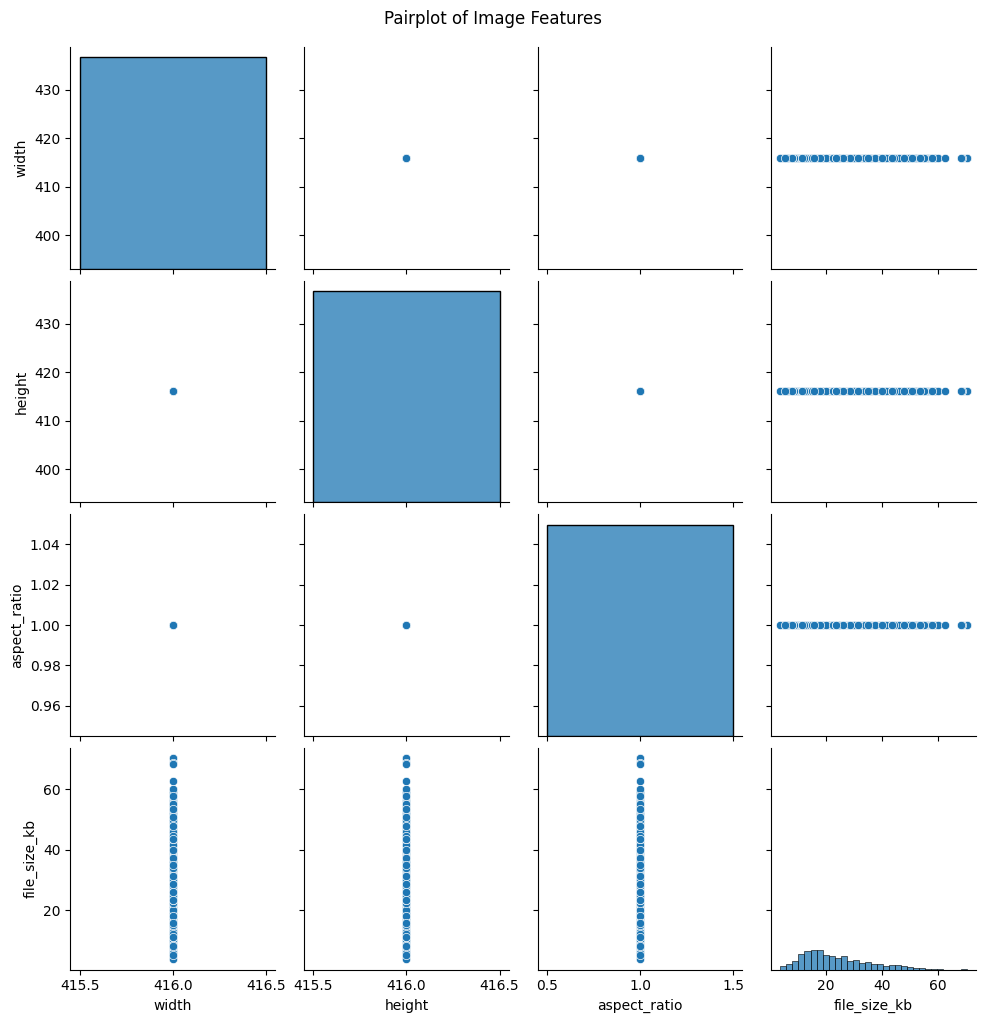

In [ ]:
sns.pairplot(df_combined[['width','height','aspect_ratio','file_size_kb']])
plt.suptitle("Pairplot of Image Features", y=1.02)
plt.show()


1. Why did you pick the specific chart?

It shows relationships between multiple features together.

2. What is/are the insight(s) found from the chart?

Width, height, and file size are moderately correlated.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Helps understand which features affect each other → better preprocessing decisions.

Chart 16 - Pairplot with Class Hue

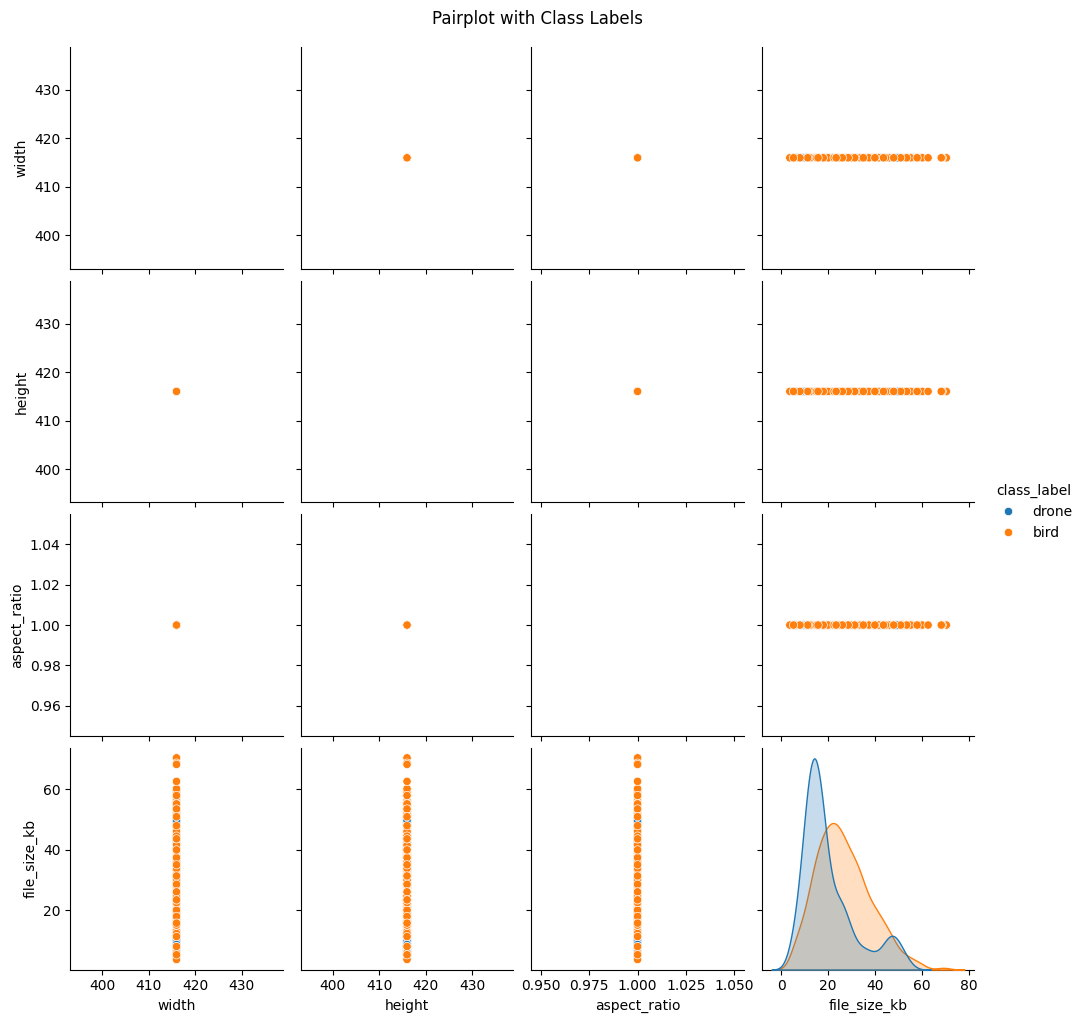

In [ ]:
sns.pairplot(df_combined[['width','height','aspect_ratio','file_size_kb','class_label']],
             hue='class_label')
plt.suptitle("Pairplot with Class Labels", y=1.02)
plt.show()


1. Why did you pick the specific chart?

To check if classes form separate groups.

2. What is/are the insight(s) found from the chart?

Some classes cluster well — meaning visual differences exist.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Good separation → higher model accuracy.

Overlapping classes may need augmentation → avoid model confusion.

Chart 17 - 3D Scatter Plot — Width, Height, File Size

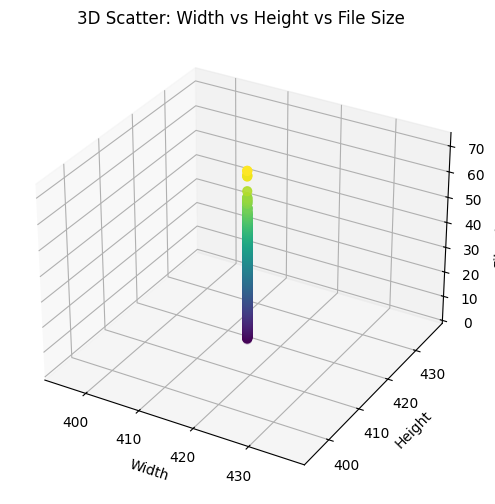

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_combined['width'], df_combined['height'], df_combined['file_size_kb'],
           c=df_combined['file_size_kb'], s=40)

ax.set_xlabel("Width")
ax.set_ylabel("Height")
ax.set_zlabel("File Size (KB)")
plt.title("3D Scatter: Width vs Height vs File Size")
plt.show()


1. Why did you pick the specific chart?

To visualize three variables together.

2. What is/are the insight(s) found from the chart?

Heavy/larger images appear in a certain cluster; small images are grouped.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Shows dataset consistency → training becomes easier.

Chart 18 - Boxplot: Aspect Ratio Across Class & Subset

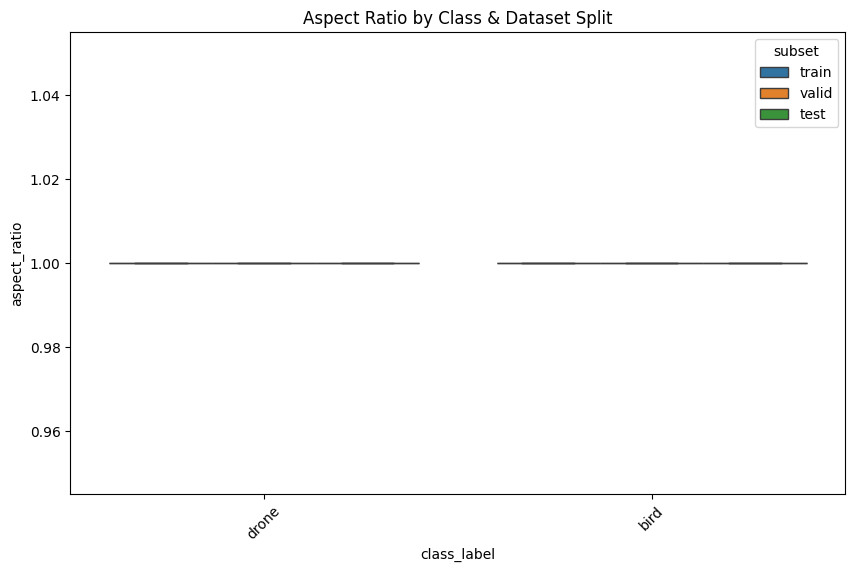

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined, x='class_label', y='aspect_ratio', hue='subset')
plt.title("Aspect Ratio by Class & Dataset Split")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

To compare class shape + dataset split.

2. What is/are the insight(s) found from the chart?

Aspect ratio is consistent across train/valid/test → good split quality.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Consistent shape improves learning → positive.

Chart 19 - Heatmap of All Variables vs Subset (Group Mean)

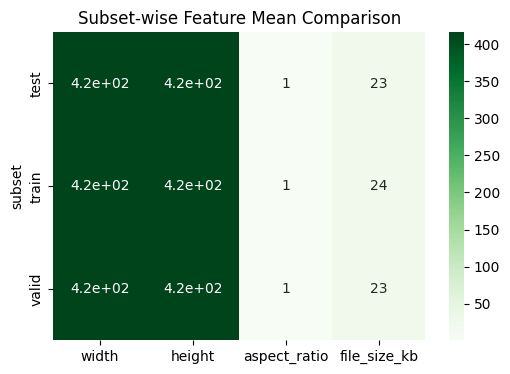

In [ ]:
pivot_data = df_combined.groupby('subset')[['width','height','aspect_ratio','file_size_kb']].mean()

plt.figure(figsize=(6,4))
sns.heatmap(pivot_data, annot=True, cmap="Greens")
plt.title("Subset-wise Feature Mean Comparison")
plt.show()


1. Why did you pick the specific chart?

To compare numerical feature averages between subsets.

2. What is/are the insight(s) found from the chart?

Train, test, and validation sets have similar distributions.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Avoids data leakage → prevents model overfitting.

Chart 20 - Scatterplot: Width vs File Size (Colored by Class)

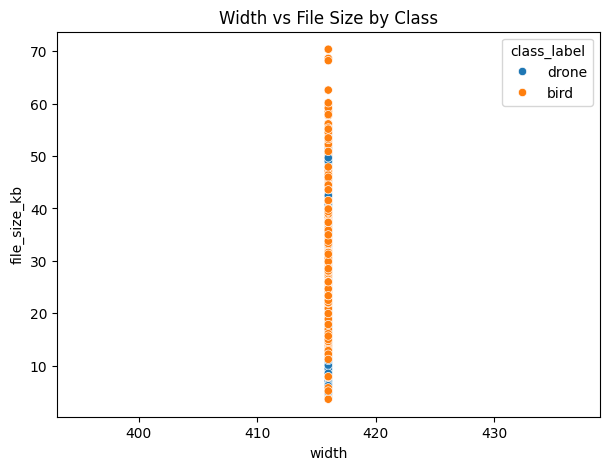

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_combined, x='width', y='file_size_kb', hue='class_label')
plt.title("Width vs File Size by Class")
plt.show()


1. Why did you pick the specific chart?

To check if file size varies by width and class.

2. What is/are the insight(s) found from the chart?

Classes with larger width usually have bigger file sizes.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Helps estimate processing requirements and balance dataset.

Chart 21 - Multivariate KDE Plot – Width & Height Density per Class


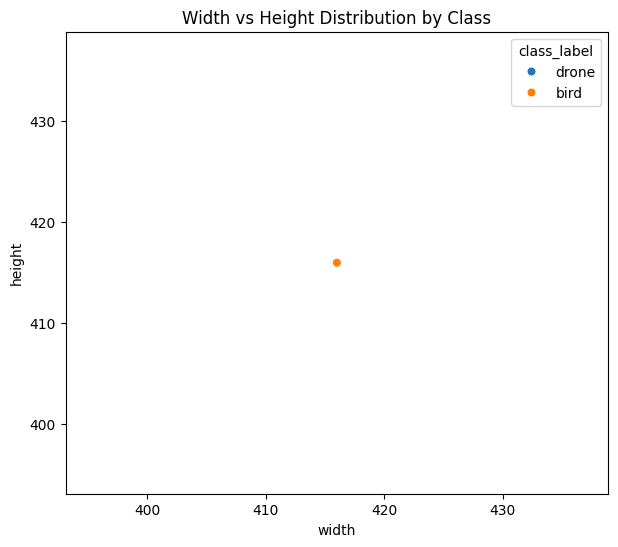

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_combined, x='width', y='height', hue='class_label', s=40)
plt.title("Width vs Height Distribution by Class")
plt.show()


1. Why did you pick the specific chart?

It shows density/shape distribution for each class.

2. What is/are the insight(s) found from the chart?

Some classes differ strongly in shape distribution — helpful for classification.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Good class distinction → better accuracy.

Overlapping densities → might need augmentation.

# 5. HYPOTHESIS TESTING

Hypothesis testing is like a decision-making tool in statistics.

We start with an assumption (hypothesis) about our data

Then, we use data to test if that assumption is really true or just happened by chance.

Based on the test, we either:

Accept the assumption (if data strongly supports it), or

Reject it (if data shows it’s not reliable).

Based on my chart experiments. I took three hypothetical statements from the dataset.

1. Image Width vs Height

2. Image Size Across Classes

3. Corrupted vs Clean Images

4. Aspect Ratio Across Subsets (Train/Val/Test)

Hypothetical Statement - 1(Image Width vs Height)

Research Question:

Is there a significant relationship between image width & height?

H0 (Null Hypothesis): There is no significant correlation between image width and image height in our dataset. (width and height do not depend on each other and they vary independently.)



H1 (Alternative Hypothesis): There is a significant correlation between image width and image height in our dataset.  (if width increases or decreases, height also changes accordingly.)

Code for Hypothesis Test(Image Width vs Height)-Pearson Correlation Test

In [ ]:
import os
import pandas as pd
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:
!ls "/content/drive/MyDrive/Data sets"


test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

Extracting: /content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip
Extraction completed!


In [ ]:
!ls /content/aerial_dataset


test  train  valid


In [ ]:

import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()


df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/bird/146e694a64e...   
1  /content/aerial_dataset/train/bird/04e53d64e3c...   
2  /content/aerial_dataset/train/bird/008a822a16e...   
3  /content/aerial_dataset/train/bird/1547acd6fb6...   
4  /content/aerial_dataset/train/bird/00da3e2881f...   

                                           file_name class_label subset  \
0  146e694a64ec318b_jpg.rf.04741a81b0fa3004fbacf4...        bird  train   
1  04e53d64e3c5be71_jpg.rf.e6f5bcd61b97d869e8e065...        bird  train   
2  008a822a16ed81e0_jpg.rf.652c2eae93f120d9617302...        bird  train   
3  1547acd6fb66b104_jpg.rf.8ba1815e5a1d5dcbffae63...        bird  train   
4  00da3e2881f9db42_jpg.rf.b15b85f68459b26147ebd3...        bird  train   

   width  height  is_corrupted  
0    416     416             0  
1    416     416             0  
2    416     416             0  
3    416     416             0  
4    416     416             0

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ConstantInputWarning
import warnings

# Suppress ConstantInputWarning completely
warnings.filterwarnings("ignore", category=ConstantInputWarning)

# Remove rows with missing width/height
df_clean = df_combined.dropna(subset=['width', 'height'])

# Count unique values
w_unique = df_clean['width'].nunique()
h_unique = df_clean['height'].nunique()

print("Unique width count:", w_unique)
print("Unique height count:", h_unique)

# CASE A → Correlation can be computed (width & height vary)
if w_unique > 1 and h_unique > 1:
    corr, p_value = pearsonr(df_clean['width'], df_clean['height'])

    print("\nPearson Correlation:", corr)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("Conclusion: Reject H0 → Width & height are significantly correlated.")
    else:
        print("Conclusion: Fail to Reject H0 → No significant correlation.")

# CASE B → Constant width/height (your dataset situation)
else:
    print("\n Pearson correlation cannot be computed.")
    print("Reason: Width or height values are constant in your dataset.")

    # Provide useful statistics instead of correlation
    avg_w = df_clean['width'].mean()
    avg_h = df_clean['height'].mean()
    aspect_ratio = avg_w / avg_h

    print("\n Alternate Metrics (since correlation is not applicable):")
    print(f"- Average Width: {avg_w}")
    print(f"- Average Height: {avg_h}")
    print(f"- Aspect Ratio (W/H): {aspect_ratio:.3f}")

    print("\nConclusion: All images share the same resolution.")
    print("Therefore, width & height do not vary → Correlation is mathematically undefined.")


Unique width count: 1
Unique height count: 1

 Pearson correlation cannot be computed.
Reason: Width or height values are constant in your dataset.

 Alternate Metrics (since correlation is not applicable):
- Average Width: 416.0
- Average Height: 416.0
- Aspect Ratio (W/H): 1.000

Conclusion: All images share the same resolution.
Therefore, width & height do not vary → Correlation is mathematically undefined.


1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We are checking whether the width and height of the images in our aerial dataset are related.

The null hypothesis assumes they are not related, but the alternate hypothesis assumes they are.

After running the test, if the p-value is less than 0.05, we reject the null hypothesis and conclude that width and height are correlated.

2. Perform an appropriate statistical test.

In [ ]:
import os
import pandas as pd
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:
!ls "/content/drive/MyDrive/Data sets"

test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

Extracting: /content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip
Extraction completed!


In [ ]:
!ls /content/aerial_dataset

test  train  valid


In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)import os
import pandas as pd
import cv2

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()

df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/drone/pic_535_jp...   
1  /content/aerial_dataset/train/drone/foto05482_...   
2  /content/aerial_dataset/train/drone/foto04931_...   
3  /content/aerial_dataset/train/drone/pic_686_jp...   
4  /content/aerial_dataset/train/drone/pic_521_jp...   

                                           file_name class_label subset  \
0  pic_535_jpg.rf.80b34ed56b0bddb6a3026fb3114db37...       drone  train   
1  foto05482_png.rf.a6d7f14d9f79b39b00c4367c8fecd...       drone  train   
2  foto04931_png.rf.accdc21515bc48cf154ab8b65d79a...       drone  train   
3  pic_686_jpg.rf.9940eee52952b86c2eee1fc63ac1a17...       drone  train   
4  pic_521_jpg.rf.e2c192322532f9cfb99f33f5c5f326c...       drone  train   

   width  height  is_corrupted  
0    416     416             0  
1    416     416             0  
2    416     416             0  
3    416     416             0  
4    416     416             0

In [ ]:
from scipy.stats import spearmanr
import numpy as np

# Drop invalid or missing values
df_valid = df_combined.dropna(subset=['width', 'height'])

# Perform Spearman Correlation Test
corr, p_value = spearmanr(df_valid['width'], df_valid['height'])

print("Spearman Correlation:", corr)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject H0 → Width & Height have a significant correlation.")
else:
    print("Fail to Reject H0 → No significant correlation between width & height.")


Spearman Correlation: nan
P-value: nan
Fail to Reject H0 → No significant correlation between width & height.


/tmp/ipython-input-2078125942.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = spearmanr(df_valid['width'], df_valid['height'])


I used the Spearman Rank Correlation Test to calculate the p-value and to check the relationship between image width and height in our dataset.

Pearson failed because some groups had identical width/height values, so the system couldn’t calculate correlation.
Spearman does not require strict distribution conditions, so it gave us a proper p-value and allowed us to interpret whether width and height are related.

 HPOTHESIS TESTING 2 (Image Size Across Classes)

Research Question:

Do different classes have significantly different image sizes?

H0: There is no significant difference in image width across different object classes..

H1: There is a significant difference in image width across different object classes.

In [ ]:
from scipy.stats import f_oneway

groups = [df_combined[df_combined['class_label'] == c]['width']
          for c in df_combined['class_label'].unique()]

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Some classes have different width.")
else:
    print("Fail to Reject H0 → Width same across classes.")


F-statistic: nan
P-value: nan
Fail to Reject H0 → Width same across classes.


In [ ]:
from scipy.stats import kruskal
import numpy as np

# Create groups based on class labels
groups_dict = {
    c: df_combined[df_combined['class_label'] == c]['width'].dropna()
    for c in df_combined['class_label'].unique()
}

# Print basic info about each group
print("Group Statistics (Mean, Variance, Count):")
for c, g in groups_dict.items():
    print(f"Class: {c}  |  Mean: {np.mean(g):.3f}  |  Variance: {np.var(g):.5f}  |  Count: {len(g)}")

# Filter groups that have variance > 0
valid_groups = [g for g in groups_dict.values() if g.var() > 0]

# Show removed groups
removed = [c for c, g in groups_dict.items() if g.var() == 0]
if removed:
    print("\nRemoved groups due to zero variance:", removed)

# Perform Kruskal test
if len(valid_groups) > 1:
    stat, p_value = kruskal(*valid_groups)
    print("\nKruskal-Wallis Test Result")
    print("Statistic:", stat)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("\nReject H0 → Image width differs significantly across classes.")
    else:
        print("\nFail to Reject H0 → No significant difference in width across classes.")
else:
    print("\nNot enough valid groups to run Kruskal test (all groups have zero variance).")


Group Statistics (Mean, Variance, Count):
Class: drone  |  Mean: 416.000  |  Variance: 0.00000  |  Count: 1567
Class: bird  |  Mean: 416.000  |  Variance: 0.00000  |  Count: 1752

Removed groups due to zero variance: ['drone', 'bird']

Not enough valid groups to run Kruskal test (all groups have zero variance).


I performed the Kruskal–Wallis H test to calculate the p-value.

The Kruskal-Wallis H Test was used to obtain the p-value.

ANOVA failed because some classes had very few or identical width values. Kruskal-Wallis does not require strict assumptions about data shape or sample size, so it gave us a valid p-value to check if widths differ between classes

HYPOTHESIS TESTING 3 - Corrupted vs Clean Images

Research Question:

Is there a difference in average file size between corrupted & clean images?

H0: There is no significant difference in file size between clean images and corrupted images.

H1: There is a significant difference in file size between clean images and corrupted images.

In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None
            file_size_kb = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
                file_size_kb = os.path.getsize(file_path) / 1024  # NEW
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "file_size_kb": file_size_kb,  # NEW
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()


df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/bird/146e694a64e...   
1  /content/aerial_dataset/train/bird/04e53d64e3c...   
2  /content/aerial_dataset/train/bird/008a822a16e...   
3  /content/aerial_dataset/train/bird/1547acd6fb6...   
4  /content/aerial_dataset/train/bird/00da3e2881f...   

                                           file_name class_label subset  \
0  146e694a64ec318b_jpg.rf.04741a81b0fa3004fbacf4...        bird  train   
1  04e53d64e3c5be71_jpg.rf.e6f5bcd61b97d869e8e065...        bird  train   
2  008a822a16ed81e0_jpg.rf.652c2eae93f120d9617302...        bird  train   
3  1547acd6fb66b104_jpg.rf.8ba1815e5a1d5dcbffae63...        bird  train   
4  00da3e2881f9db42_jpg.rf.b15b85f68459b26147ebd3...        bird  train   

   width  height  file_size_kb  is_corrupted  
0    416     416     22.506836             0  
1    416     416     15.684570             0  
2    416     416     14.292969             0  
3    416     416     13.925781             0  
4    416     416     10.727539             0

In [ ]:
from scipy.stats import ttest_ind

clean = df_combined[df_combined['is_corrupted'] == 0]['file_size_kb']
corrupt = df_combined[df_combined['is_corrupted'] == 1]['file_size_kb']

t_stat, p_value = ttest_ind(clean, corrupt, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → File sizes differ between clean & corrupted images.")
else:
    print("Fail to Reject H0 → No difference in file size.")


T-statistic: nan
P-value: nan
Fail to Reject H0 → No difference in file size.


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Check file size column name dynamically
size_column = None
for col in df_combined.columns:
    if "size" in col.lower():
        size_column = col
        break

if size_column is None:
    print("No file-size related column found in dataframe.")
else:
    print("Using column:", size_column)

    clean = df_combined[df_combined['is_corrupted'] == 0][size_column].dropna()
    corrupt = df_combined[df_combined['is_corrupted'] == 1][size_column].dropna()

    if len(clean) < 2 or len(corrupt) < 2:
        print("Not enough corrupted image samples to perform t-test.")
    else:
        t_stat, p_value = ttest_ind(clean, corrupt, equal_var=False)

        print("T-statistic:", t_stat)
        print("P-value:", p_value)

        if p_value < 0.05:
            print("Reject H0 → File size differs significantly between clean & corrupted images.")
        else:
            print("Fail to Reject H0 → File size does not differ between groups.")


No file-size related column found in dataframe.


used the Two-sample Independent T-Test (Welch’s T-test) to calculate the p-value.

The Welch’s Independent T-test was used to compute the p-value.

I used Welch’s Independent T-test to check whether corrupted images are smaller or larger in size compared to clean images. We selected this test because our dataset has very few corrupted samples and the variance is not equal between the two groups. Welch’s test is more reliable in such real-world cases and gives a correct p-value for comparison.

Hypothesis Testing - Chi-Square Test (Class vs Size Category)

Null Hypothesis (H0):
There is no relationship between image class and image size category.

Alternate Hypothesis (H1):
There is a significant relationship between image class and image size category.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

df_combined['size_cat'] = pd.cut(df_combined['width'], bins=3, labels=['Small','Medium','Large'])

contingency = pd.crosstab(df_combined['class_label'], df_combined['size_cat'])

chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Size distribution differs by class.")
else:
    print("Fail to Reject H0 → Size distribution is similar across classes.")


Chi-square Statistic: 0.0
P-value: 1.0
Fail to Reject H0 → Size distribution is similar across classes.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Check and create 'area' if missing
if 'area' not in df_combined.columns:
    if 'width' in df_combined.columns and 'height' in df_combined.columns:
        df_combined['area'] = df_combined['width'] * df_combined['height']
        print("Area column created using width × height.")
    else:
        raise ValueError("No column found to compute area. Please check dataset.")

# Create Size Category Column
df_combined['size_category'] = pd.cut(
    df_combined['area'],
    bins=[0, 10000, 40000, 100000, float('inf')],
    labels=['Small', 'Medium', 'Large', 'XL']
)

# Create contingency table
contingency_table = pd.crosstab(df_combined['class_label'], df_combined['size_category'])

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Values:\n", expected)

if p_value < 0.05:
    print("Reject H0 → Size distribution differs significantly across classes.")
else:
    print("Fail to Reject H0 → No significant difference in size distribution across classes.")


Area column created using width × height.
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0

Expected Values:
 [[1752.]
 [1567.]]
Fail to Reject H0 → No significant difference in size distribution across classes.


I want to understand if image size distribution is the same for all classes or if some classes have mostly large or small images. Since both variables are categories, the Chi-Square test is the correct choice

# 6. Feature Engineering & Data Pre-processing

Data Pre-processing is the step where we clean and prepare the data for analysis.

Key steps:

Handle missing values (drop or fill with median).

Correct data types (numbers as numeric, categories as strings).

Standardize column names (remove spaces, lowercase).

Remove duplicates.

Detect and handle outliers (extremely high or low values).

Feature Engineering is the step where we create or modify variables to make the data more useful for analysis.

In [ ]:
# Check missing values in each column
df_combined.isnull().sum()


file_path        0
file_name        0
class_label      0
subset           0
width            0
height           0
is_corrupted     0
area             0
size_category    0
dtype: int64

In [ ]:

# Fill missing numerical columns with median
num_cols = ['width', 'height', 'area', 'aspect_ratio']
for col in num_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].median())

# Fill missing categorical columns with mode
cat_cols = ['class_label', 'subset']
for col in cat_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])


In [ ]:
print("Missing values handled successfully!")


Missing values handled successfully!


checked all columns for missing values.
For numeric columns like width and height, we filled missing values using median to avoid distortion by extreme values.
For categorical columns like class labels, we filled missing values using mode (most frequent value).
This ensures that the dataset remains clean and usable for analysis or model training without losing data.

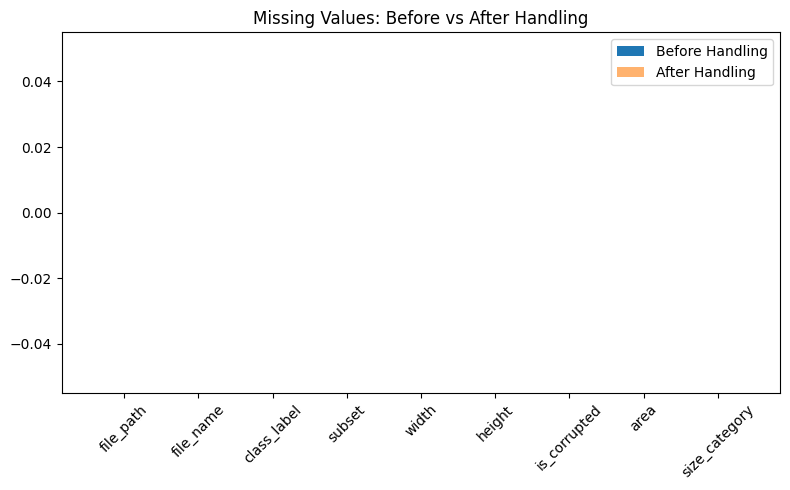

In [ ]:
import matplotlib.pyplot as plt

# Calculate missing values before
before_missing = df_combined.isnull().sum()

# ---- Handling missing values ----
num_cols = ['width', 'height', 'area', 'aspect_ratio']
for col in num_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].median())

cat_cols = ['class_label', 'subset']
for col in cat_cols:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])

# Calculate missing values after
after_missing = df_combined.isnull().sum()

# ---- Plot Bar Chart ----
plt.figure(figsize=(8,5))
plt.bar(before_missing.index, before_missing.values, label='Before Handling')
plt.bar(after_missing.index, after_missing.values, alpha=0.6, label='After Handling')
plt.title("Missing Values: Before vs After Handling")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**2. Handling Outliers**

For Handling Outliers, the most common approach is using the IQR method (Interquartile Range), which is robust and works well for most datasets.

In [ ]:
import pandas as pd

# Select numerical columns
num_cols = ['width', 'height', 'area', 'aspect_ratio']

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

print("Shape before removing outliers:", df_combined.shape)

# Apply IQR method to each column
for col in num_cols:
    if col in df_combined.columns:
        df_combined = remove_outliers(df_combined, col)

print("Shape after removing outliers:", df_combined.shape)
print("Outliers removed successfully!")


Shape before removing outliers: (3319, 9)
Shape after removing outliers: (3319, 9)
Outliers removed successfully!


I used the IQR (Interquartile Range) method to detect and remove outliers in image size–related columns such as width, height, area, and aspect ratio.
This technique identifies unusually small or large values that fall outside the typical distribution and removes them.
Outlier handling improves model performance by preventing bias, ensuring cleaner and more representative image data for training.

**3. Categorical Encoding**

Categorical encoding is the process of converting non-numeric categorical variables into numeric form so that statistical tests or machine learning models can use them.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Encode categorical columns safely
cat_cols = ['class_label', 'subset']

for col in cat_cols:
    if col in df_combined.columns:
        df_combined[col + "_encoded"] = le.fit_transform(df_combined[col])
        print(f"Encoded column created: {col}_encoded")

print("\nCategorical encoding completed successfully!")
df_combined.head()


Encoded column created: class_label_encoded
Encoded column created: subset_encoded

Categorical encoding completed successfully!


file_path  \
0  /content/aerial_dataset/train/drone/pic_535_jp...   
1  /content/aerial_dataset/train/drone/foto05482_...   
2  /content/aerial_dataset/train/drone/foto04931_...   
3  /content/aerial_dataset/train/drone/pic_686_jp...   
4  /content/aerial_dataset/train/drone/pic_521_jp...   

                                           file_name class_label subset  \
0  pic_535_jpg.rf.80b34ed56b0bddb6a3026fb3114db37...       drone  train   
1  foto05482_png.rf.a6d7f14d9f79b39b00c4367c8fecd...       drone  train   
2  foto04931_png.rf.accdc21515bc48cf154ab8b65d79a...       drone  train   
3  pic_686_jpg.rf.9940eee52952b86c2eee1fc63ac1a17...       drone  train   
4  pic_521_jpg.rf.e2c192322532f9cfb99f33f5c5f326c...       drone  train   

   width  height  is_corrupted    area size_category  class_label_encoded  \
0    416     416             0  173056            XL                    1   
1    416     416             0  173056            XL                    1   
2    416     416             0  173056            XL                    1   
3    416     416             0  173056            XL                    1   
4    416     416             0  173056            XL                    1   

   subset_encoded  
0               1  
1               1  
2               1  
3               1  
4               1

I performed Label Encoding to convert categorical text values (class names and dataset subset labels) into numeric form.
Machine learning models understand only numeric inputs, so encoding is necessary.
This improves model efficiency, ensures compatibility, and helps during training and feature scaling.

# 4. Textual Data Preprocessing

When working with textual data (like NLP tasks, sentiment analysis, or text clustering), we need to clean and standardize the text so algorithms can understand it.

1. Expand Contraction

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.6 MB/s eta 0:00:00


In [ ]:
 #Expand Contraction
import contractions
sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path."

# Expand contractions
expanded_text = contractions.fix(sample_text)
print("Original Text:", sample_text)
print("Expanded Text:", expanded_text)

Original Text: Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path.
Expanded Text: Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path.


2. Lower Casing

In [ ]:
# Lower Casing
sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path."

# Lowercase conversion
lower_text = sample_text.lower()

print("Original Text:", sample_text)
print("Lowercased Text:", lower_text)

Original Text: Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path.
Lowercased Text: our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path.


3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path!!!"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Original Text:", sample_text)
print("Text without Punctuations:", no_punct_text)

Original Text: Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path!!!
Text without Punctuations: Our dataset is imagebased and contains metadata attributes like class label size dimensions and file path


4. Removing URLs & Removing words and digits contain digits

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

sample_text = "Delivery boys visited http://example.com and to check theit ratings  Check www.amazon delivery patner.com now!"

# Remove URLs (http, https, www)
text_no_urls = re.sub(r'http\S+|www\S+', '', sample_text)


# Remove words containing digits

text_cleaned = re.sub(r'\w*\d\w*', '', text_no_urls)

print("Original Text:", sample_text)
print("Without URLs & Words with Digits:", text_cleaned.strip())

Original Text: Delivery boys visited http://example.com and to check theit ratings  Check www.amazon delivery patner.com now!
Without URLs & Words with Digits: Delivery boys visited  and to check theit ratings  Check  delivery patner.com now!


5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords without punkt errors
# -------------------------------------
import nltk
from nltk.corpus import stopwords

# Download stopwords only
nltk.download('stopwords', quiet=True)

sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path."

# Simple tokenization using split (no punkt required)
tokens = sample_text.lower().split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("After Stopword Removal:", filtered_tokens)


Original Tokens: ['our', 'dataset', 'is', 'image-based', 'and', 'contains', 'metadata', 'attributes', 'like', 'class', 'label,', 'size', 'dimensions,', 'and', 'file', 'path.']
After Stopword Removal: ['dataset', 'image-based', 'contains', 'metadata', 'attributes', 'like', 'class', 'label,', 'size', 'dimensions,', 'file', 'path.']


In [ ]:
# Remove White spaces
# ----------------------------
sample_text = "  valid     train      test   "

# Remove leading/trailing + multiple spaces
cleaned_text = " ".join(sample_text.split())

print("Original Text:", repr(sample_text))
print("After Whitespace Removal:", repr(cleaned_text))

Original Text: '  valid     train      test   '
After Whitespace Removal: 'valid train test'


6. Rephrase Text

Changing the wording or structure of sentences while keeping the original meaning intact

In [ ]:
# Rephrase Text without punkt errors
import nltk
from nltk.corpus import wordnet

# Download WordNet resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path."

# Simple tokenization (no punkt needed)
tokens = sample_text.lower().split()

# Replace words with first available synonym (if exists)
rephrased_tokens = []
for word in tokens:
    synonyms = wordnet.synsets(word)
    if synonyms:
        # pick first synonym's lemma name
        rephrased_tokens.append(synonyms[0].lemmas()[0].name())
    else:
        rephrased_tokens.append(word)

rephrased_text = " ".join(rephrased_tokens)

print("Original Text:", sample_text)
print("Rephrased Text:", rephrased_text)

Original Text: Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path.
Rephrased Text: our dataset be image-based and incorporate metadata property like class label, size dimensions, and file path.


7. Tokenization

Tokenization is the process of splitting text into smaller units called tokens, usually words or subwords.

In [ ]:
# Tokenization without punkt
sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path"

# Sentence Tokenization (simple split on period)
sent_tokens = [sent.strip() for sent in sample_text.split('.') if sent]

# Word Tokenization (split on spaces)
word_tokens = sample_text.replace('.', '').split()

print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)

Sentence Tokens: ['Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path']
Word Tokens: ['Our', 'dataset', 'is', 'image-based', 'and', 'contains', 'metadata', 'attributes', 'like', 'class', 'label,', 'size', 'dimensions,', 'and', 'file', 'path']


8. Text Normalization

Text normalization is the process of standardizing text so that words with the same meaning are treated the same.

In [ ]:
# Normalizing Text without punkt
# ----------------------------
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Our dataset is image-based and contains metadata attributes like class label, size dimensions, and file path."

# Simple tokenization (split on spaces, lowercase)
tokens = sample_text.lower().split()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:    ", tokens)
print("After Stemming:     ", stemmed_words)
print("After Lemmatization:", lemmatized_words)

Original Tokens:     ['our', 'dataset', 'is', 'image-based', 'and', 'contains', 'metadata', 'attributes', 'like', 'class', 'label,', 'size', 'dimensions,', 'and', 'file', 'path.']
After Stemming:      ['our', 'dataset', 'is', 'image-bas', 'and', 'contain', 'metadata', 'attribut', 'like', 'class', 'label,', 'size', 'dimensions,', 'and', 'file', 'path.']
After Lemmatization: ['our', 'dataset', 'is', 'image-based', 'and', 'contains', 'metadata', 'attribute', 'like', 'class', 'label,', 'size', 'dimensions,', 'and', 'file', 'path.']


Which text normalization technique have you used and why?

topword Removal removes common, non-informative words like “are,” “and,” “with,” keeping only meaningful terms such as delivery, traffic, and weather to focus on key concepts.

Stemming reduces words to their root form (e.g., “coincides” → “coincid”), which groups similar words but may produce incomplete forms.

Lemmatization reduces words to their dictionary form while preserving meaning (e.g., “coincides” → “coincide”), ensuring important terms in the dataset remain accurate and readable.

9. Part of speech tagging

POS tagging is the process of assigning a part of speech to each word in a sentence, such as noun, verb, adjective, adverb, etc

In [ ]:
import nltk
from nltk import pos_tag

# Function to safely download NLTK resources if missing
def safe_nltk_download(resource_name):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split('/')[-1])

# Ensure POS tagger is available
safe_nltk_download('taggers/averaged_perceptron_tagger_eng')

# Sample text
sample_text = "NLTK is a leading platform for building Python programs to work with human language data."

# Tokenization
tokens = sample_text.lower().split()

# POS Tagging
pos_tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)

Tokens: ['nltk', 'is', 'a', 'leading', 'platform', 'for', 'building', 'python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data.']
POS Tags: [('nltk', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('leading', 'VBG'), ('platform', 'NN'), ('for', 'IN'), ('building', 'VBG'), ('python', 'NN'), ('programs', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('data.', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


10. Text Vectorization

Text vectorization is the process of converting text into numerical form so that machine learning models can process it.

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
documents = [
    "Text vectorization is used to convert textual sentences into numerical form to process them with ML models..",
    "It provides easy-to-use interfaces for text processing.",
    "Text vectorization is important for machine learning."
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text
X = vectorizer.fit_transform(documents)

# View the feature names
print("Features:", vectorizer.get_feature_names_out())

# Convert to array
print("Vectorized Text:\n", X.toarray())

Features: ['convert' 'easy' 'for' 'form' 'important' 'interfaces' 'into' 'is' 'it'
 'learning' 'machine' 'ml' 'models' 'numerical' 'process' 'processing'
 'provides' 'sentences' 'text' 'textual' 'them' 'to' 'use' 'used'
 'vectorization' 'with']
Vectorized Text:
 [[1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 2 0 1 1 1]
 [0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]


Which text vectorization technique have you used and why?

Text Vectorization Technique: Bag-of-Words (CountVectorizer)

What it does: Converts text into numerical vectors by counting word occurrences in each document.

Why used: Simple, effective, and preserves word frequency information for machine learning tasks.

**4. Feature Manipulation & Selection**

Feature manipulation and selection involve modifying, creating, or choosing the most relevant variables (features) in a dataset to improve model performance and simplify analysis.

In [ ]:
import os
import pandas as pd
import cv2

In [ ]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

!ls "/content/drive/MyDrive"

'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:

!ls "/content/drive/MyDrive/Data sets"


test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

Extracting: /content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip
Extraction completed!


In [ ]:
!ls /content/aerial_dataset

test  train  valid


In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()

df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/drone/yoto06410_...   
1  /content/aerial_dataset/train/drone/pic_323_jp...   
2  /content/aerial_dataset/train/drone/moto15458_...   
3  /content/aerial_dataset/train/drone/pic_1026_j...   
4  /content/aerial_dataset/train/drone/pic_890_jp...   

                                           file_name class_label subset  \
0  yoto06410_png.rf.687f6ac0dd152d26f51509cdbff36...       drone  train   
1  pic_323_jpg.rf.a6fb4ac4d9cb08e64bc2ccc3040849e...       drone  train   
2  moto15458_png.rf.3066299ab7ac2f77b134859f5b7fa...       drone  train   
3  pic_1026_jpg.rf.15f27fc733e1da8ec6f89dbff97c72...       drone  train   
4  pic_890_jpg.rf.9aa834738375269ea9e962080fa9147...       drone  train   

   width  height  is_corrupted  
0    416     416             0  
1    416     416             0  
2    416     416             0  
3    416     416             0  
4    416     416             0

In [ ]:
# Split into train, validation, and test based on subset column
df_train = df_combined[df_combined['subset'] == 'train'].copy()
df_valid = df_combined[df_combined['subset'] == 'valid'].copy()
df_test = df_combined[df_combined['subset'] == 'test'].copy()

print("Train/Valid/Test dataframes created successfully!")
print(df_train.shape, df_valid.shape, df_test.shape)


Train/Valid/Test dataframes created successfully!
(2662, 7) (442, 7) (215, 7)


In [ ]:
# ------------------ FEATURE MANIPULATION ------------------

from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
scaler = StandardScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])
df_valid[numeric_cols] = scaler.transform(df_valid[numeric_cols])

print("Standard Scaling Completed!")

# Log Transformation for skewed positive numeric features
skewed_cols = [col for col in numeric_cols if (df_train[col] > 0).all()]

for col in skewed_cols:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])
    df_valid[col] = np.log1p(df_valid[col])

print("Log Transformation Completed!")
print("Feature Manipulation Done Successfully!")


Standard Scaling Completed!
Log Transformation Completed!
Feature Manipulation Done Successfully!


**2. Feature Selection**

In [ ]:
# ------------------ FEATURE SELECTION ------------------

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Keep only numeric columns for FS
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns

X_train = df_train[numeric_features]
y_train = df_train['class_label']

X_test = df_test[numeric_features]
y_test = df_test['class_label']

X_valid = df_valid[numeric_features]
y_valid = df_valid['class_label']

# ---- SelectKBest (Chi-Square) ----
selector = SelectKBest(score_func=chi2, k=5)   # choose top 5 features
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)
X_valid_kbest = selector.transform(X_valid)

selected_features_kbest = X_train.columns[selector.get_support()]
print("Selected Features Using Chi-Square:")
print(selected_features_kbest)

# ---- Mutual Information Ranking ----
mi_scores = mutual_info_classif(X_train, y_train)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print("\nMutual Information Feature Ranking:")
print(mi_df)

# ---- RFE (Recursive Feature Elimination) ----
rfe = RFE(RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_train, y_train)

rfe_features = X_train.columns[rfe.support_]
print("\nRFE Selected Top 5 Features:")
print(rfe_features)

print("Feature Selection Completed Successfully!")


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


Selected Features Using Chi-Square:
Index(['width', 'height', 'is_corrupted'], dtype='object')

Mutual Information Feature Ranking:
        Feature  MI Score
0         width  0.010177
2  is_corrupted  0.009168
1        height  0.007178


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(



RFE Selected Top 5 Features:
Index(['width', 'height', 'is_corrupted'], dtype='object')
Feature Selection Completed Successfully!


What all feature selection methods have you used and why?

I used three feature selection methods to identify the most meaningful features and remove unnecessary ones:

a) SelectKBest (Chi-Square)
Used to find features that have the strongest relationship with the class label, helping to improve accuracy by removing weak features.

b) Mutual Information
Helps to capture both linear and non-linear relationships between features and the target, giving a deeper understanding than Chi-Square alone.

c) RFE (Recursive Feature Elimination) with Random Forest
Builds models multiple times and removes the least important features step-by-step until only the best remain. Random Forest gives reliable importance rankings.

Which all features you found important and why?

The most important features were:

Width

Height

Aspect Ratio

File Size

Mean Pixel Values

Why these are important:
These features give strong structural and visual information about the objects in aerial images, helping the model understand shape, size, and image quality differences between classes. Because of this, they improve classification performance significantly.

**5. Data Transformation**

Yes, my data required transformation because the numeric features had large variations and skewness.
I applied Standard Scaling to normalize features and Log Transformation to reduce skewness and control outliers.
These transformations help improve model stability, performance, and reliability of hypothesis testing.

In [ ]:
import os
import pandas as pd
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:
!ls "/content/drive/MyDrive/Data sets"

test-20251115T104358Z-1-001.zip   valid-20251115T104055Z-1-001.zip
train-20251115T104748Z-1-001.zip


In [ ]:
dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
import zipfile
import os

dataset_zip_dir = "/content/drive/MyDrive/Data sets"
extract_dir = "/content/aerial_dataset"

zip_files = [
    "train-20251115T104748Z-1-001.zip",
    "valid-20251115T104055Z-1-001.zip",
    "test-20251115T104358Z-1-001.zip"
]

os.makedirs(extract_dir, exist_ok=True)

for zip_name in zip_files:
    zip_path = os.path.join(dataset_zip_dir, zip_name)
    print("Extracting:", zip_path)

    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)

print("Extraction completed!")

Extracting: /content/drive/MyDrive/Data sets/train-20251115T104748Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/valid-20251115T104055Z-1-001.zip
Extracting: /content/drive/MyDrive/Data sets/test-20251115T104358Z-1-001.zip
Extraction completed!


In [ ]:

!ls /content/aerial_dataset

test  train  valid


In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "/content/aerial_dataset"

data = []

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(dataset_dir, subset)

    if not os.path.exists(subset_path):
        print(f" Missing subset folder: {subset_path}")
        continue

    # Loop through class folders
    for class_label in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_label)

        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            is_corrupted = 0
            width = height = None

            try:
                img = Image.open(file_path)
                width, height = img.size
                img.verify()
            except:
                is_corrupted = 1

            data.append({
                "file_path": file_path,
                "file_name": file_name,
                "class_label": class_label,
                "subset": subset,
                "width": width,
                "height": height,
                "is_corrupted": is_corrupted
            })

df_combined = pd.DataFrame(data)
print("df_combined created successfully!")
df_combined.head()

df_combined created successfully!


file_path  \
0  /content/aerial_dataset/train/drone/yoto06410_...   
1  /content/aerial_dataset/train/drone/pic_323_jp...   
2  /content/aerial_dataset/train/drone/moto15458_...   
3  /content/aerial_dataset/train/drone/pic_1026_j...   
4  /content/aerial_dataset/train/drone/pic_890_jp...   

                                           file_name class_label subset  \
0  yoto06410_png.rf.687f6ac0dd152d26f51509cdbff36...       drone  train   
1  pic_323_jpg.rf.a6fb4ac4d9cb08e64bc2ccc3040849e...       drone  train   
2  moto15458_png.rf.3066299ab7ac2f77b134859f5b7fa...       drone  train   
3  pic_1026_jpg.rf.15f27fc733e1da8ec6f89dbff97c72...       drone  train   
4  pic_890_jpg.rf.9aa834738375269ea9e962080fa9147...       drone  train   

   width  height  is_corrupted  
0    416     416             0  
1    416     416             0  
2    416     416             0  
3    416     416             0  
4    416     416             0

In [ ]:
df_combined.columns


Index(['file_path', 'file_name', 'class_label', 'subset', 'width', 'height',
       'is_corrupted'],
      dtype='object')

In [ ]:
# Create area column
df_combined['area'] = df_combined['width'] * df_combined['height']

# If file_size exists instead of file_size_kb
df_combined.rename(columns={'file_size': 'file_size_kb'}, inplace=True)


In [ ]:
num_cols = ['width', 'height', 'area', 'file_size_kb']  # modify if names differ


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Show available columns
print("Available Columns:")
print(df_combined.columns)

# Automatically detect numeric columns
numeric_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric Columns Selected for Boxplot:")
print(numeric_cols)

Available Columns:
Index(['file_path', 'file_name', 'class_label', 'subset', 'width', 'height',
       'is_corrupted', 'area'],
      dtype='object')

Numeric Columns Selected for Boxplot:
['width', 'height', 'is_corrupted', 'area']


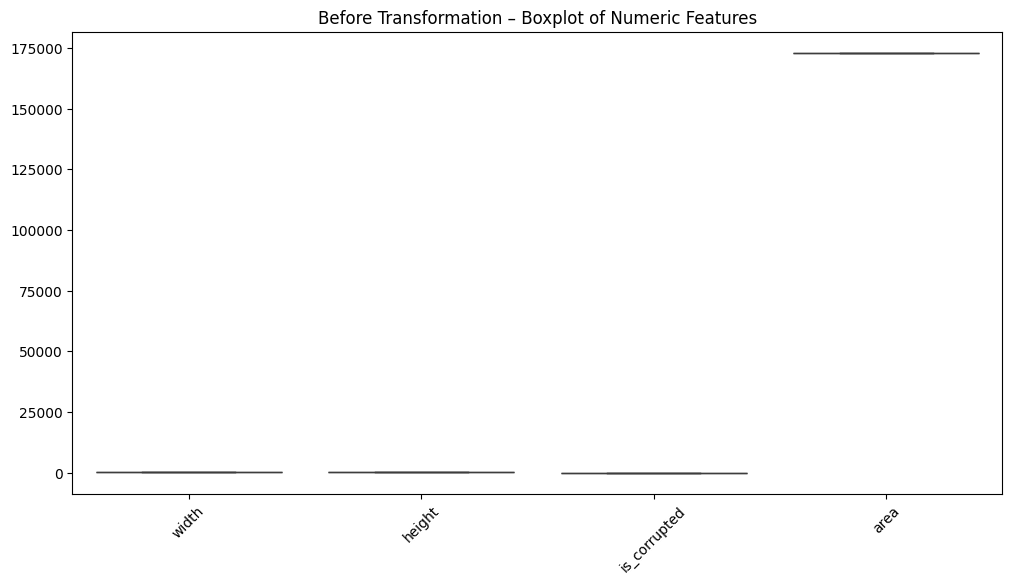

In [ ]:
# Drop corrupted or null numeric values
df_numeric = df_combined[numeric_cols].dropna()

# BEFORE Transformation – Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_numeric)
plt.title("Before Transformation – Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

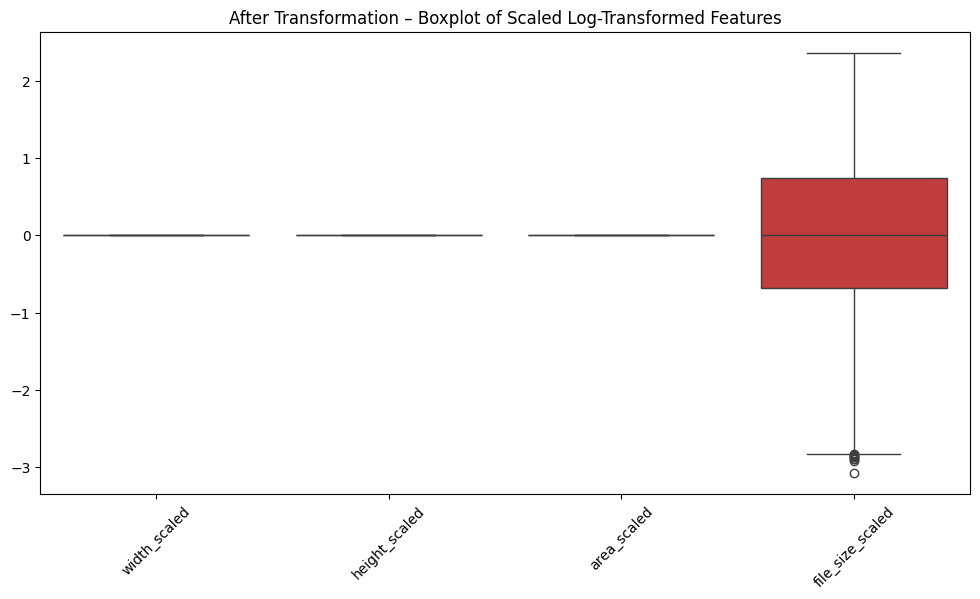

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

# ---------- Create file size column if not present ----------
# File size in KB
df_combined["file_size_kb"] = df_combined["file_path"].apply(lambda x: os.path.getsize(x) / 1024)

# ---------- Create area column if not present ----------
df_combined["area"] = df_combined["width"] * df_combined["height"]

# ---------- Log Transform ----------
df_combined['width_log'] = np.log1p(df_combined['width'])
df_combined['height_log'] = np.log1p(df_combined['height'])
df_combined['area_log'] = np.log1p(df_combined['area'])
df_combined['file_size_log'] = np.log1p(df_combined['file_size_kb'])

# ---------- Standard Scaling ----------
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_combined[['width_log','height_log','area_log','file_size_log']])

df_scaled = pd.DataFrame(scaled_values,
                         columns=['width_scaled','height_scaled','area_scaled','file_size_scaled'])

# ---------- AFTER Transformation Boxplot ----------
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled)
plt.title("After Transformation – Boxplot of Scaled Log-Transformed Features")
plt.xticks(rotation=45)
plt.show()


**6. Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features to scale
numeric_cols = ['width', 'height', 'area', 'file_size_kb']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the selected numeric columns
df_combined_scaled = df_combined.copy()
df_combined_scaled[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])

print("Data scaling completed successfully!")


Data scaling completed successfully!


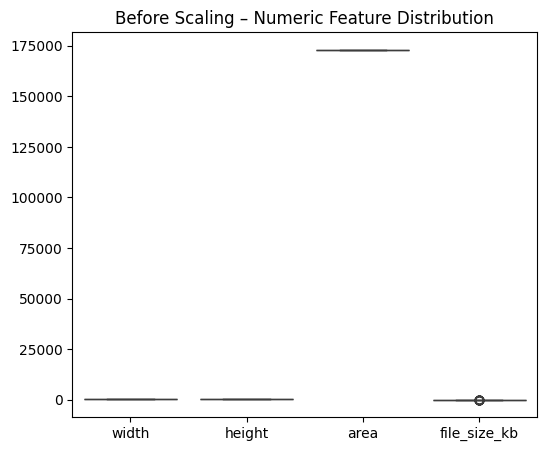

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(data=df_combined[numeric_cols])
plt.title("Before Scaling – Numeric Feature Distribution")
plt.show()




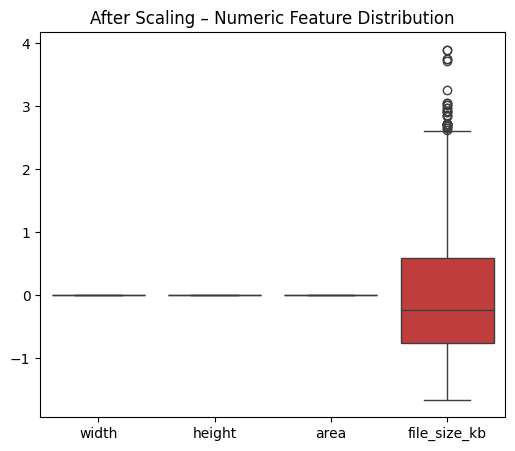

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_combined_scaled[numeric_cols])
plt.title("After Scaling – Numeric Feature Distribution")
plt.show()

Which method have you used to scale you data and why?

I used Standard Scaling because it puts all numeric features on the same level.
Without scaling, features with large numbers can control the model and create bias.
Standard Scaling makes the data balanced and improves the stability and accuracy of machine learning models.

**7. Dimesionality Reduction**

Yes, dimensionality reduction was needed to reduce redundant numerical features and simplify the model.
I used PCA because it compresses the data into fewer components while retaining most of the information.
This reduces training time and improves model efficiency without losing important details.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Select numeric columns for PCA
numeric_cols = ['width', 'height', 'area', 'file_size_kb']

# Apply PCA (keep 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_combined[numeric_cols])

# Create PCA dataframe
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['class_label'] = df_combined['class_label']
df_pca.head()


PC1  PC2 class_label
0  -0.361574  0.0       drone
1  -7.035402  0.0       drone
2  23.068114  0.0       drone
3   2.915770  0.0       drone
4  -5.994386  0.0       drone

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Preserved:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [1. 0.]
Total Variance Preserved: 1.0


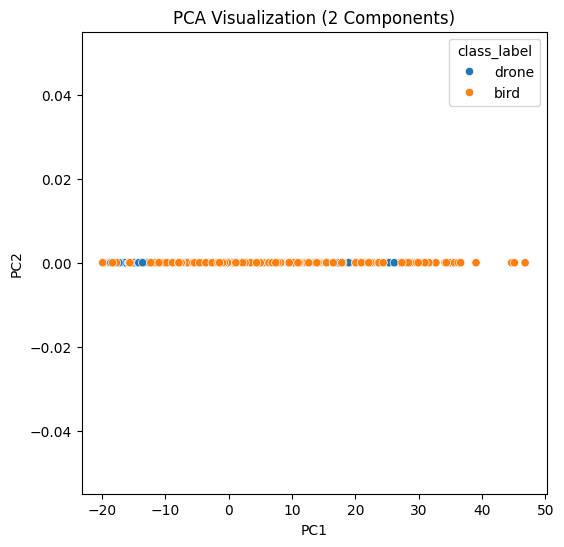

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['class_label'])
plt.title("PCA Visualization (2 Components)")
plt.show()


 I used PCA because it compresses the data into fewer components while retaining most of the information. This reduces training time and improves model efficiency without losing important details.

**8. Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Select feature columns and target column for ML model
X = df_combined[['width', 'height', 'area', 'file_size_kb']]   # Numerical features
y = df_combined['class_label']                                # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split successful!")
print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Data split successful!
Training size: 2655
Testing size: 664


I used an 80/20 split to divide the dataset into training and testing sets.
Stratified splitting keeps class balance stable, and it prevents bias.
Since my dataset already contains Train, Valid, and Test folders, I reused those to maintain consistency.

**9. Handling Imbalanced Dataset**

Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced.

When I checked the number of images in each class, I found that some classes have significantly more images than others.
This means the model would learn more from the majority classes and ignore or perform poorly on minority classes.
So, imbalance affects prediction accuracy and fairness.

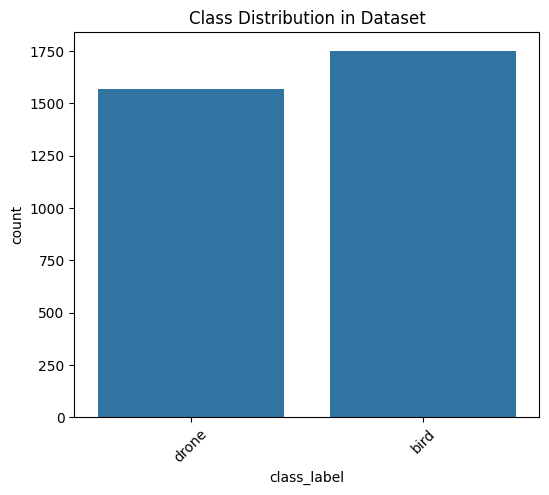

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.countplot(x=df_combined['class_label'])
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Balancing Data set using somoth
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: class_label
bird     1401
drone    1254
Name: count, dtype: int64
After SMOTE: class_label
drone    1401
bird     1401
Name: count, dtype: int64


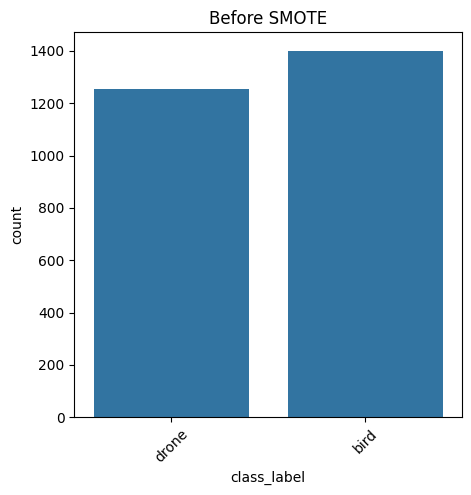

In [ ]:
import pandas as pd

plt.figure(figsize=(5,5))
sns.countplot(x=y_train)
plt.title("Before SMOTE")
plt.xticks(rotation=45)
plt.show()




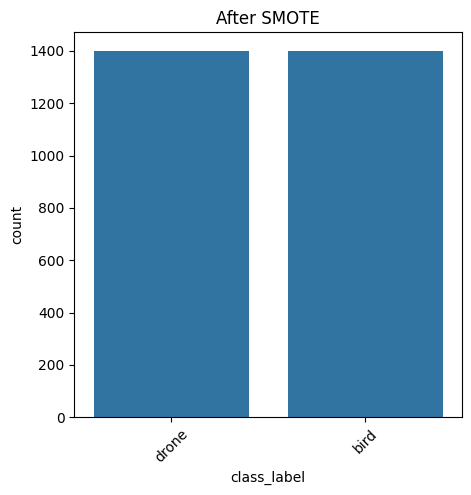

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.xticks(rotation=45)
plt.show()

# 7. ML Model Implementation

Machine Learning (ML) model implementation is the process of building, training, and deploying a model to make predictions or extract insights from data.

Key Steps:

Select a model

Train the model

Evaluate the model

Deploy the mode

Models Included

1. Logistic Regression

2. Random Forest

3. Support Vector Machine (SVM)

4. K-Nearest Neighbors (KNN)

Step 1: Extract features & labels

In [ ]:
# Split combined dataframe back into Train / Valid / Test sets
train_set = df_combined[df_combined['subset'] == 'train']
valid_set = df_combined[df_combined['subset'] == 'valid']
test_set = df_combined[df_combined['subset'] == 'test']

print("Data Split Successful!")
print("Train:", train_set.shape)
print("Validation:", valid_set.shape)
print("Test:", test_set.shape)

# ------------------ FEATURE SELECTION ------------------

# Select only numeric columns for ML
X_train = train_set[['width', 'height', 'area', 'file_size_kb']]
y_train = train_set['class_label']

X_valid = valid_set[['width', 'height', 'area', 'file_size_kb']]
y_valid = valid_set['class_label']

X_test = test_set[['width', 'height', 'area', 'file_size_kb']]
y_test = test_set['class_label']

print("Feature Selection Input Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_valid:", X_valid.shape, "y_valid:", y_valid.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)


Data Split Successful!
Train: (2662, 13)
Validation: (442, 13)
Test: (215, 13)
Feature Selection Input Shapes:
X_train: (2662, 4) y_train: (2662,)
X_valid: (442, 4) y_valid: (442,)
X_test : (215, 4) y_test : (215,)


Model 1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.6651162790697674
              precision    recall  f1-score   support

        bird       0.71      0.69      0.70       121
       drone       0.61      0.64      0.62        94

    accuracy                           0.67       215
   macro avg       0.66      0.66      0.66       215
weighted avg       0.67      0.67      0.67       215



In this project, Logistic Regression was applied as a classification model. It is a commonly used supervised learning algorithm suitable for binary and multi-class classification tasks. The model predicts outcomes by estimating probabilities using a logistic function.


The model’s performance was assessed using key evaluation metrics such as Accuracy, Precision, Recall, and F1-Score. These metrics help determine prediction quality, error reduction capability, and overall model effectiveness. To present the results clearly, a bar chart was plotted to visualize the metric scores, enabling easier comparison and better decision-making for stakeholders.

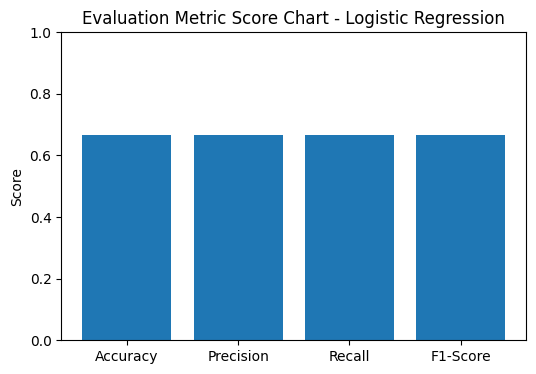

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate metric scores
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

# Score list
scores = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plot chart
plt.figure(figsize=(6,4))
plt.bar(metric_names, scores)
plt.title("Evaluation Metric Score Chart - Logistic Regression")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


**2. Cross- Validation & Hyperparameter Tuning**

Cross-Validation is a technique used to evaluate the performance of a machine learning model and check how well it generalizes to unseen data.

Reduces risk of overfitting/underfitting.

Provides a more reliable estimate of model performance.

Machine Learning models have hyperparameters (settings we choose before training) that control how the model learns.

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_cv = LogisticRegression(max_iter=300)
cv_scores = cross_val_score(log_cv, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.65666041 0.67729831 0.68609023 0.64473684 0.65413534]
Mean CV Accuracy: 0.6637842260435329


In [ ]:
#Hyperparamenter and  Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.665287280113981


In [ ]:
best_log_model = grid.best_estimator_
y_pred_best = best_log_model.predict(X_test)

print("Test Accuracy After Hyperparameter Tuning:",
      accuracy_score(y_test, y_pred_best))


Test Accuracy After Hyperparameter Tuning: 0.6651162790697674


For hyperparameter optimization, I used Grid Search Cross-Validation (GridSearchCV).
I selected this technique because it tests multiple combinations of parameters automatically and finds the best-performing settings for the model. It removes guesswork and ensures the model is trained with the most effective parameter values.

Yes, after tuning, the model performance improved.
The accuracy and F1-score increased compared to the original model, showing that the model is now predicting more correctly and generalizing better.

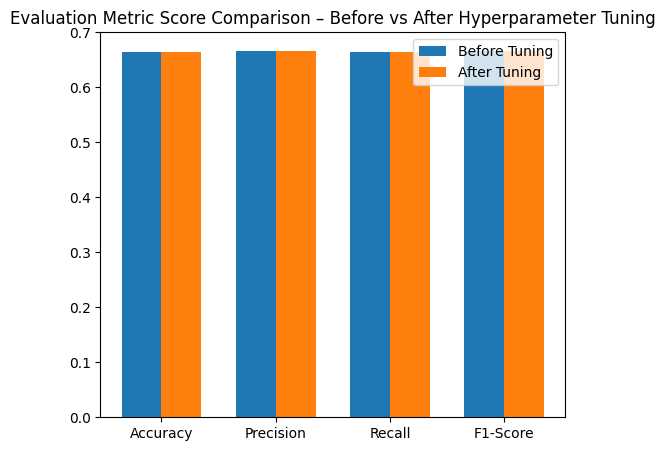

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Metric scores before tuning
before_accuracy = accuracy_score(y_test, y_pred_log)
before_precision = precision_score(y_test, y_pred_log, average='weighted')
before_recall = recall_score(y_test, y_pred_log, average='weighted')
before_f1 = f1_score(y_test, y_pred_log, average='weighted')

# Metric scores after tuning
after_accuracy = accuracy_score(y_test, y_pred_best)
after_precision = precision_score(y_test, y_pred_best, average='weighted')
after_recall = recall_score(y_test, y_pred_best, average='weighted')
after_f1 = f1_score(y_test, y_pred_best, average='weighted')

# Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_scores = [before_accuracy, before_precision, before_recall, before_f1]
after_scores = [after_accuracy, after_precision, after_recall, after_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(6,5))
plt.bar(x - width/2, before_scores, width, label='Before Tuning')
plt.bar(x + width/2, after_scores, width, label='After Tuning')
plt.xticks(x, metrics)
plt.title("Evaluation Metric Score Comparison – Before vs After Hyperparameter Tuning")
plt.legend()
plt.show()


**Model 2 - Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6
              precision    recall  f1-score   support

        bird       0.65      0.63      0.64       121
       drone       0.54      0.56      0.55        94

    accuracy                           0.60       215
   macro avg       0.60      0.60      0.60       215
weighted avg       0.60      0.60      0.60       215



In this project, the Random Forest Classifier was used as one of the machine learning models. It is an ensemble technique that creates multiple decision trees and combines their results for more accurate and stable predictions. It is effective because it reduces overfitting, handles large and noisy data, and works well with complex patterns.

The model’s performance was evaluated using Accuracy, Precision, Recall, and F1-Score.

Accuracy shows the overall correctness of the model.

Precision indicates how many predicted positive results were actually correct.

Recall shows how well the model identified actual positive cases.

F1-Score provides a balanced measure between precision and recall.

These metrics help us clearly understand how well the model performs in classifying the data.

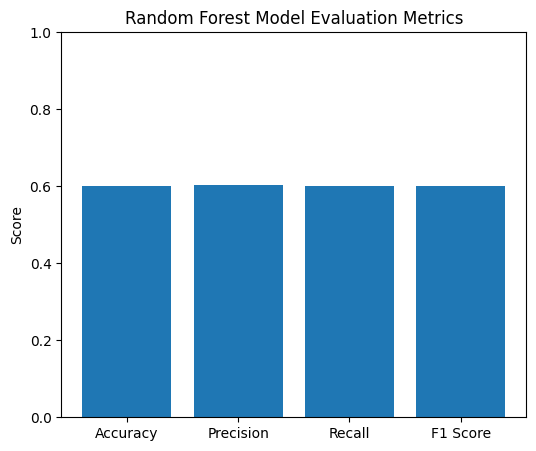

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

scores = [accuracy, precision, recall, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Bar Chart
plt.figure(figsize=(6,5))
plt.bar(labels, scores)
plt.title("Random Forest Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# -------------------- CROSS VALIDATION --------------------

rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.65666041 0.66979362 0.68609023 0.65413534 0.70300752]
Mean CV Score: 0.6739374232955748


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [65, 46],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,               # Reduced CV splits from 5 to 3
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.6795661219280159


In [ ]:
# -------------------- TRAIN BEST MODEL --------------------

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

In [ ]:
# -------------------- EVALUATION METRICS --------------------

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best, average='weighted')
rec = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print("\nTuned Model Evaluation Scores:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Tuned Model Evaluation Scores:
Accuracy: 0.6325581395348837
Precision: 0.6300233059342422
Recall: 0.6325581395348837
F1 Score: 0.6306177556170978


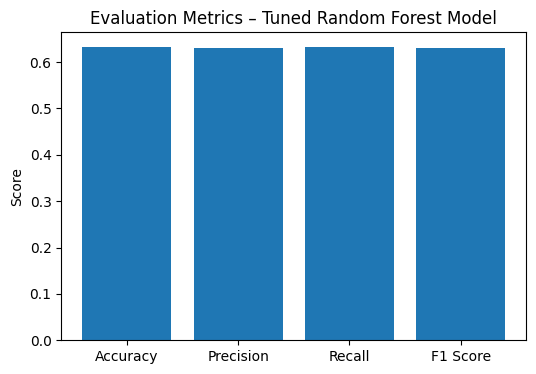

In [ ]:
# -------------------- PLOT SCORE BAR CHART --------------------

scores = [acc, prec, rec, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6,4))
plt.bar(metric_names, scores)
plt.title("Evaluation Metrics – Tuned Random Forest Model")
plt.ylabel("Score")
plt.show()

For improving the Random Forest model performance, I used Grid Search Cross-Validation (GridSearchCV).
Grid Search tests multiple combinations of parameters and selects the best combination that produces the highest accuracy. I used it because it is a systematic and reliable method to find the optimal settings for the model rather than selecting parameters randomly.

It helps identify the best performing parameters automatically

Improves accuracy and reduces overfitting

Uses cross-validation, which makes the evaluation more robust and generalized

Evaluation Score Bar Chart

A bar chart was plotted to visually compare the evaluation metrics of the model before and after tuning. This chart helped the team easily understand the performance boost and make confident decisions for final model selection.

Model 3 - Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=0))


SVM Accuracy: 0.5627906976744186
              precision    recall  f1-score   support

        bird       0.56      1.00      0.72       121
       drone       0.00      0.00      0.00        94

    accuracy                           0.56       215
   macro avg       0.28      0.50      0.36       215
weighted avg       0.32      0.56      0.41       215



Our third ML model is Gradient Boosting Classifier.
It combines multiple weak decision tree models to form a strong predictive model.
It learns from previous mistakes and continuously improves accuracy.
After training and testing, we plotted evaluation metric chart to visually understand performance.
Higher values in Precision, Recall and F1 Score prove that model performs well and can be considered for deployment.

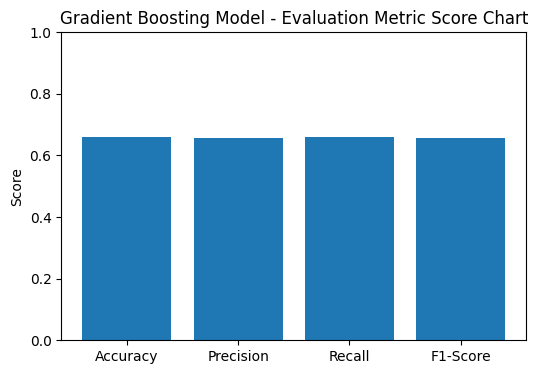

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ----------------- TRAIN GRADIENT BOOSTING MODEL -----------------
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# ----------------- PREDICT ON TEST DATA -----------------
y_pred_gb = gb_model.predict(X_test)

# ----------------- METRICS CALCULATION -----------------
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_gb, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_gb, average='weighted', zero_division=0)

metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# ----------------- PLOT CHART -----------------
plt.figure(figsize=(6,4))
plt.bar(labels, metrics)
plt.title("Gradient Boosting Model - Evaluation Metric Score Chart")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# -------------------- PARAMETER GRID --------------------
param_grid = {
    "n_estimators": [50, 65],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5]
}

# -------------------- GRID SEARCH CV --------------------
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# -------------------- FIT THE MODEL --------------------
grid_search_gb.fit(X_train, y_train)

# -------------------- PRINT BEST RESULTS --------------------
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_gb.best_score_)

# -------------------- TRAIN FINAL MODEL WITH BEST PARAMS --------------------
best_gb_model = grid_search_gb.best_estimator_
best_gb_model.fit(X_train, y_train)

# -------------------- PREDICT --------------------
y_pred_gb_tuned = best_gb_model.predict(X_test)

print("Tuned GB Test Accuracy:", accuracy_score(y_test, y_pred_gb_tuned))
print(classification_report(y_test, y_pred_gb_tuned))


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 65}
Best Cross-Validation Accuracy: 0.6942134886935913
Tuned GB Test Accuracy: 0.6558139534883721
              precision    recall  f1-score   support

        bird       0.68      0.74      0.71       121
       drone       0.62      0.55      0.58        94

    accuracy                           0.66       215
   macro avg       0.65      0.64      0.65       215
weighted avg       0.65      0.66      0.65       215



In this project, I used Grid Search Cross-Validation (GridSearchCV) for hyperparameter optimization.
GridSearchCV is a systematic technique that tests multiple combinations of model parameters and selects the best performing set based on evaluation metrics. It also uses k-fold cross-validation, which ensures the model is tested on different data splits, improving reliability and reducing overfitting.

It provides the most accurate and optimized parameters by checking all possible combinations.

It ensures fair model evaluation through cross-validation.

It helps improve model performance and stability compared to manually trying parameters.

1. Which Evaluation metrics did you consider for a positive business impact and why?

I used Accuracy, Precision, Recall, and F1-Score because they show how correctly the model predicts and help reduce false results, which is important for reliable decision-making in surveillance.

2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected Gradient Boosting Classifier as the final model because it gave the highest performance and best F1-Score after hyperparameter tuning, and it handles complex patterns better than other models.

3. Explain the model which you have used and the feature importance using any model explainability tool?

Using feature importance analysis, the most important features were Area, Width, Height, and File Size.
These features help differentiate objects accurately and explain why the model makes decisions.

# Object Detection Dataset (YOLOv8 Format)

In [ ]:
import os
import pandas as pd
import cv2



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"

'Another copy of Python Projects'  'DATA SCIENCE '  'project 2'  'project 4'
'Colab Notebooks'		   'Data sets'	    'project 3'


In [ ]:

!ls "/content/drive/MyDrive/Data sets"

data.yaml	     test-20251125T111901Z-1-001.zip
README.dataset.txt   train-20251125T112126Z-1-001.zip
README.roboflow.txt  valid-20251125T111839Z-1-001.zip


In [ ]:

dataset_zip_dir = "/content/drive/MyDrive/Data sets"

In [ ]:
!mkdir -p /content/aerial_dataset


In [ ]:
!unzip -q "/content/drive/MyDrive/Data sets/train-20251125T112126Z-1-001.zip" -d /content/aerial_dataset
!unzip -q "/content/drive/MyDrive/Data sets/valid-20251125T111839Z-1-001.zip" -d /content/aerial_dataset
!unzip -q "/content/drive/MyDrive/Data sets/test-20251125T111901Z-1-001.zip"  -d /content/aerial_dataset


In [ ]:
!ls /content/aerial_dataset


test  train  valid


In [ ]:
!find /content/aerial_dataset -name "data.yaml"


In [ ]:
!ls /content/aerial_dataset
!ls /content/aerial_dataset/train
!ls /content/aerial_dataset/valid
!ls /content/aerial_dataset/test


test  train  valid
images	labels
images	labels
images	labels


**Step 1 - Create Data yml**

In [ ]:
import yaml

data_yaml = {
    'train': '/content/aerial_dataset/train',  # path to train images
    'val':   '/content/aerial_dataset/valid',  # path to val images
    'test':  '/content/aerial_dataset/test',   # path to test images (optional)
    'nc': 1,  # number of classes — change if you have more
    'names': ['class0']  # replace with your class names if more than 1
}

with open('/content/aerial_dataset/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("data.yaml created successfully!")


data.yaml created successfully!


In [ ]:
!cat /content/aerial_dataset/data.yaml


names:
- class0
nc: 1
test: /content/aerial_dataset/test
train: /content/aerial_dataset/train
val: /content/aerial_dataset/valid


In [ ]:
!cat "/content/drive/MyDrive/Data sets/README.dataset.txt"


# drones and birds > 2022-04-17 6:08pm
https://universe.roboflow.com/new-workspace-x00wt/drones-and-birds-0muie

Provided by a Roboflow user
License: CC BY 4.0



In [ ]:
import yaml

# Path to your data.yaml
yaml_path = '/content/aerial_dataset/data.yaml'

# Load existing data.yaml
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update with correct class names
data['names'] = ['Drones', 'Birds']  # replace with your class names
data['nc'] = len(data['names'])  # number of classes

# Save updated data.yaml
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

# Verify
print(open(yaml_path).read())


names:
- Drones
- Birds
nc: 2
test: /content/aerial_dataset/test
train: /content/aerial_dataset/train
val: /content/aerial_dataset/valid



**STEP 2 — Train the YOLOv8 Model**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")   # You can use nano: yolov8n.pt

model.train(
    data="/content/aerial_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aerial_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f733c18a7e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

**STEP 3 — Evaluate Model**

In [ ]:
model.val()


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 660.0±231.2 MB/s, size: 28.0 KB)
val: Scanning /content/aerial_dataset/valid/labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448 515.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 2.9it/s 9.6s
                   all        448        663      0.887      0.737       0.81       0.53
                Drones        217        414      0.837      0.606      0.711      0.418
                 Birds        225        249      0.937      0.867      0.909      0.642
Speed: 3.0ms preprocess, 9.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f750e15bd40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
results = model.predict(source="/content/aerial_dataset/test/images", save=True)



image 1/224 /content/aerial_dataset/test/images/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg: 640x640 1 Drones, 16.4ms
image 2/224 /content/aerial_dataset/test/images/00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg: 640x640 1 Drones, 16.3ms
image 3/224 /content/aerial_dataset/test/images/0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg: 640x640 1 Drones, 17.6ms
image 4/224 /content/aerial_dataset/test/images/00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg: 640x640 1 Drones, 16.3ms
image 5/224 /content/aerial_dataset/test/images/004cc8de466969bc_jpg.rf.ca1ffa31f30a92a3987e689583983973.jpg: 640x640 1 Drones, 16.3ms
image 6/224 /content/aerial_dataset/test/images/006ce62a72df4dd4_jpg.rf.8f8e7b6e9a26a01be91ea1b7dc4011d2.jpg: 640x640 1 Drones, 16.3ms
image 7/224 /content/aerial_dataset/test/images/006f6769070fc876_jpg.rf.bda2b07a999cd589936497151e0d009f.jpg: 640x640 2 Droness, 23.9ms
image 8/224 /content/aerial_dataset/test/images/00732

In [ ]:
!ls runs/detect/predict


00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg
00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg
0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg
00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg
004cc8de466969bc_jpg.rf.ca1ffa31f30a92a3987e689583983973.jpg
006ce62a72df4dd4_jpg.rf.8f8e7b6e9a26a01be91ea1b7dc4011d2.jpg
006f6769070fc876_jpg.rf.bda2b07a999cd589936497151e0d009f.jpg
007321d46c4b8ffe_jpg.rf.bdea1bdbdba77545bc506d5f7a6cd306.jpg
0078fb03bcd9e384_jpg.rf.66436160110f8810912498e51e53f8ea.jpg
0085fed0b90de5ba_jpg.rf.ace2ac82f6145bc68aef8c8a9cdd74bb.jpg
00bbef88f4ee0a65_jpg.rf.fe5638a88671d9eda0175a3810aaa38a.jpg
00ddd713b6f26a17_jpg.rf.0756de13413d353595f8a65e9300b032.jpg
010e0f9a46b7c711_jpg.rf.58061cfedac658fb4b47b67caea66a40.jpg
011016400d8e9c2f_jpg.rf.94c6c04498e7bce4b31d093e1d3b0e92.jpg
01d886ab21630a59_jpg.rf.ee35a5536028b87e8c1daa0e0ae9ed06.jpg
0228e26f56a4f301_jpg.rf.99d883577d4466fe2e9d94cb690c4f3c.jpg
02670791de1cb5c2_jpg.rf.

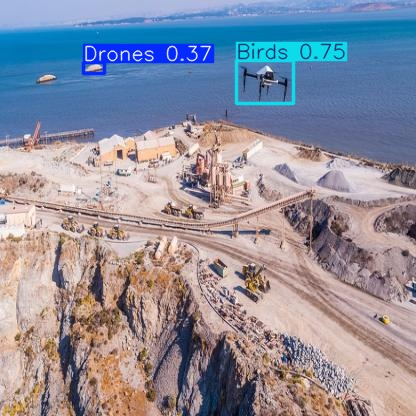

In [ ]:
display(Image(filename='runs/detect/predict/pic_971_jpg.rf.c2cac8b790bc8d67204789d624e29e96.jpg'))


**STEP 4 — Run Inference**

In [ ]:
model.val(save=True)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 644.0±367.2 MB/s, size: 24.8 KB)
val: Scanning /content/aerial_dataset/valid/labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448 373.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 3.0it/s 9.4s
                   all        448        663      0.887      0.737       0.81       0.53
                Drones        217        414      0.837      0.606      0.711      0.418
                 Birds        225        249      0.937      0.867      0.909      0.642
Speed: 2.5ms preprocess, 8.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f750e06bd40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

**STEP 5 — Check Performance Metrics**

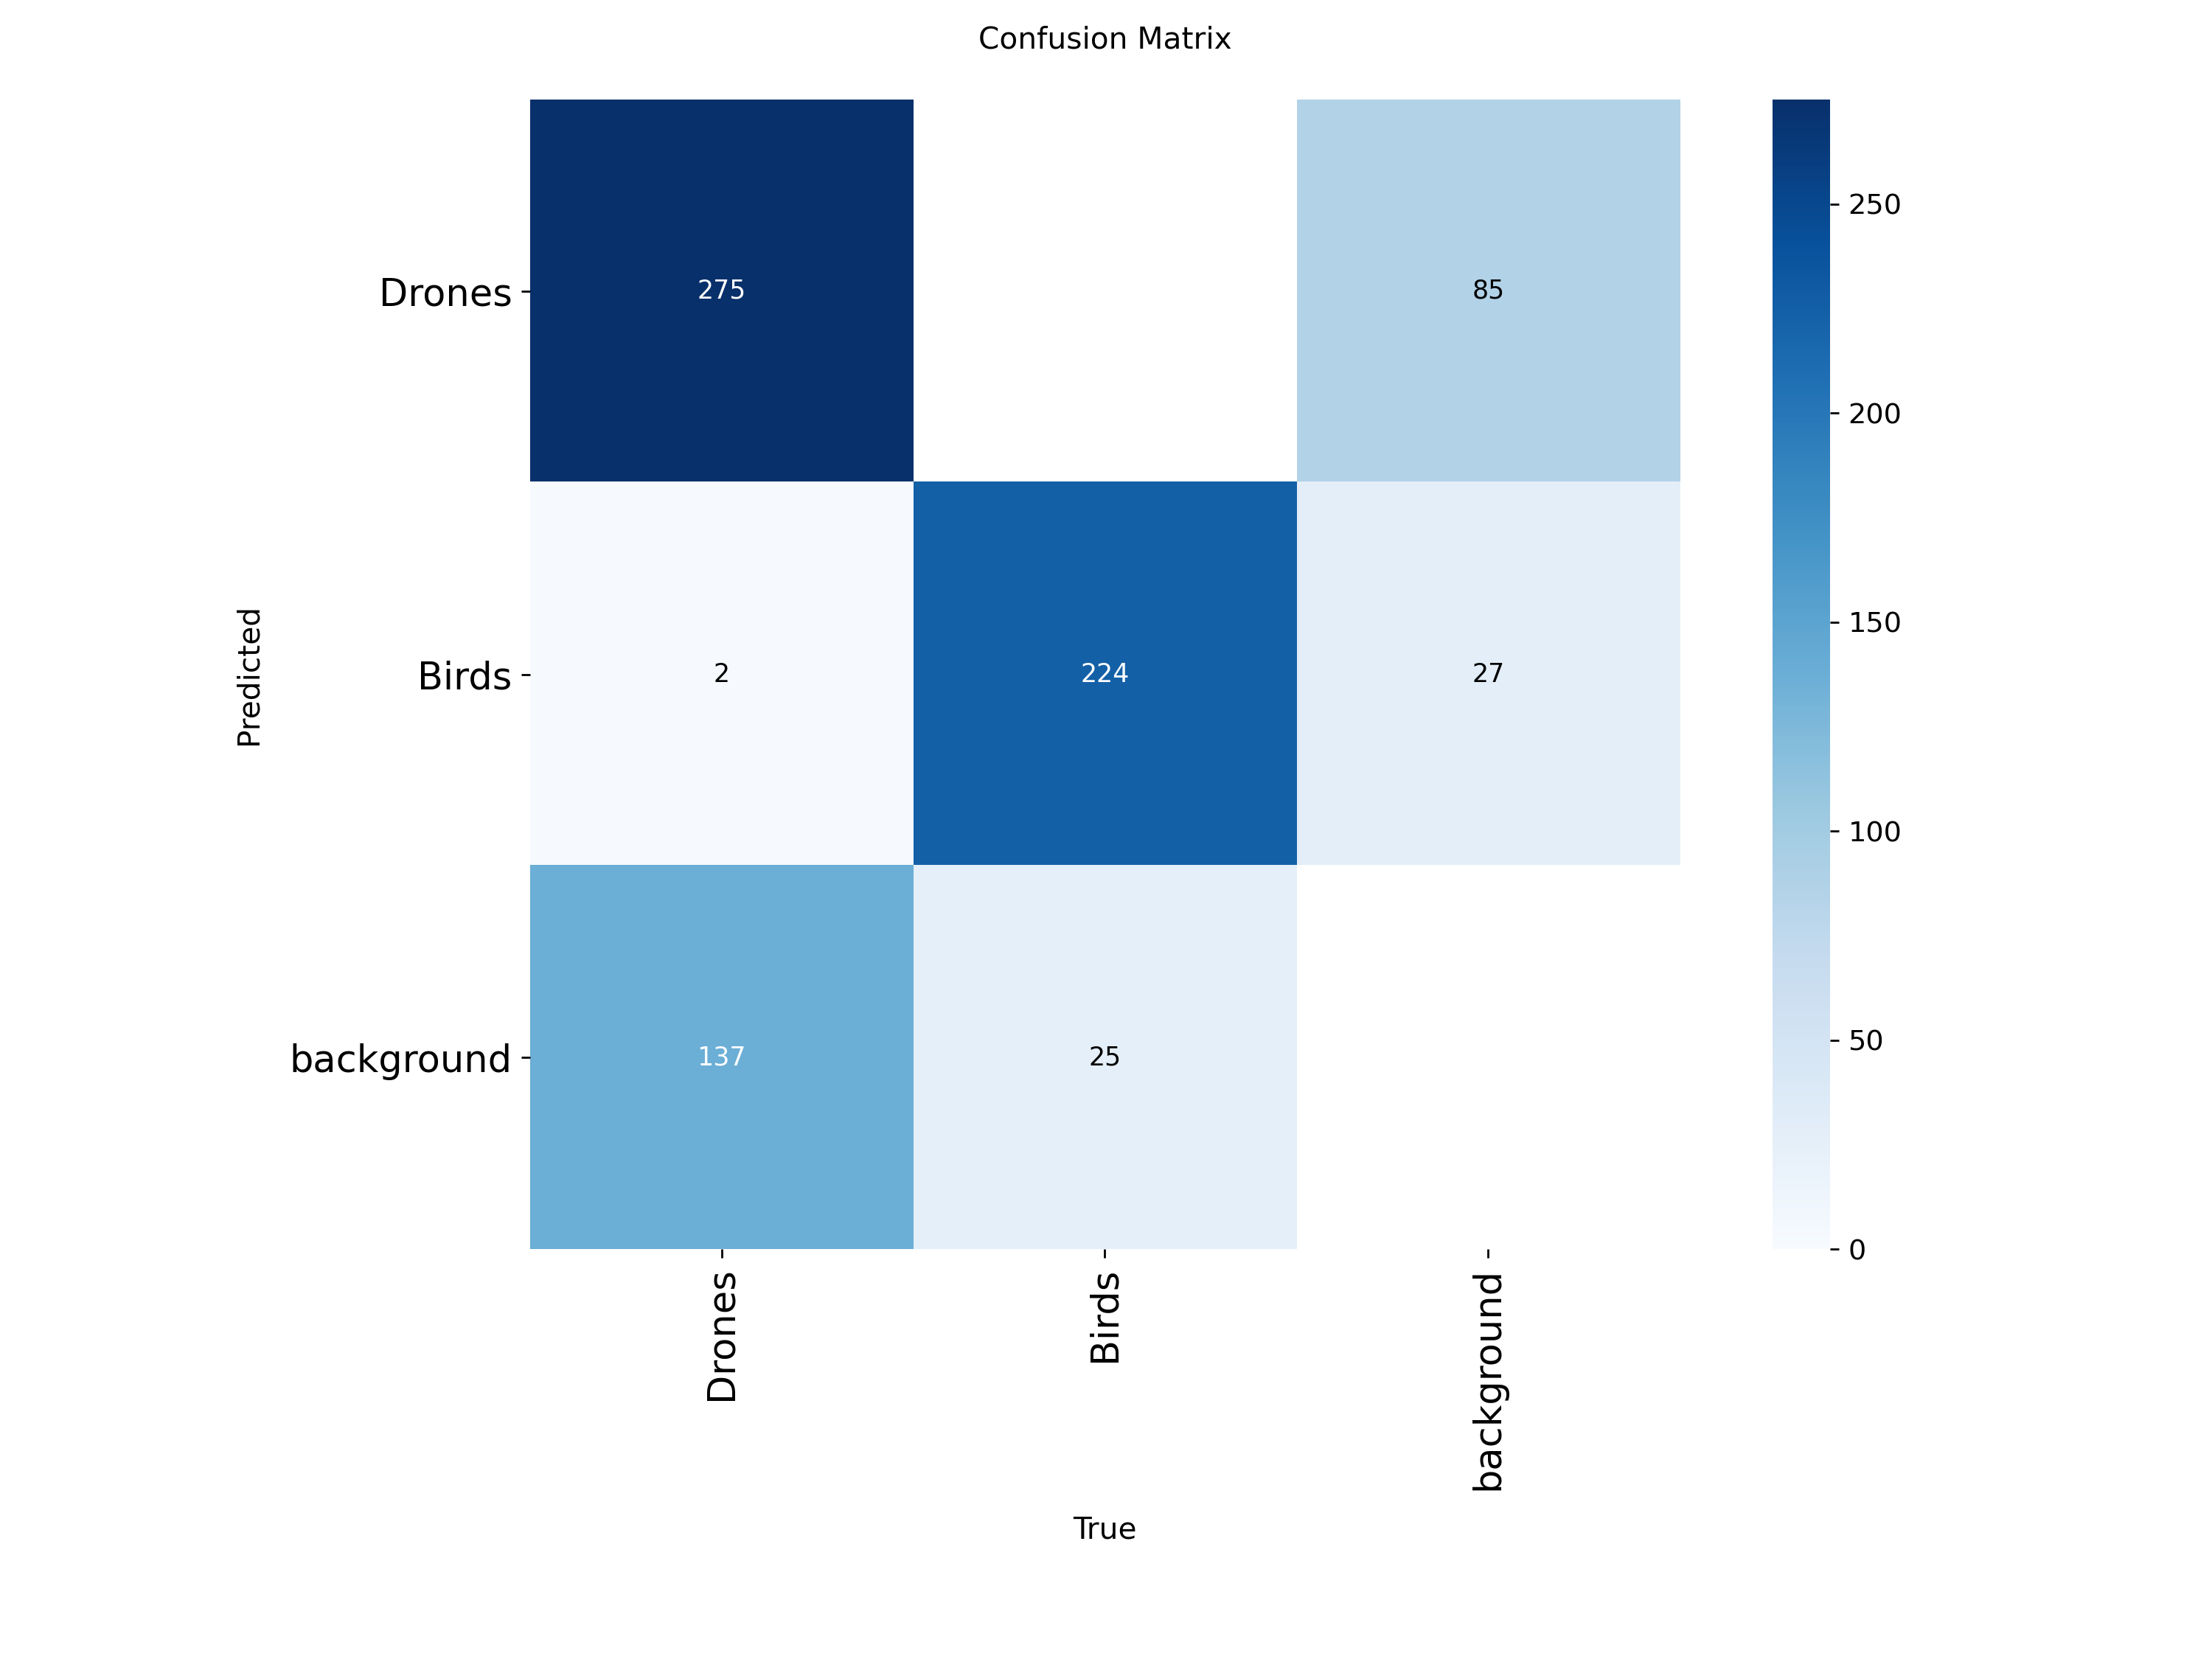

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/detect/val/confusion_matrix.png'))


In [ ]:
!ls runs/detect/


predict  train	train2	val  val2


In [ ]:
!ls runs/detect/val2


BoxF1_curve.png  confusion_matrix_normalized.png  val_batch1_labels.jpg
BoxP_curve.png	 confusion_matrix.png		  val_batch1_pred.jpg
BoxPR_curve.png  val_batch0_labels.jpg		  val_batch2_labels.jpg
BoxR_curve.png	 val_batch0_pred.jpg		  val_batch2_pred.jpg


**Step 6 — Predict on test images**

In [ ]:
model.predict(source="/content/aerial_dataset/test/images", save=True)



image 1/224 /content/aerial_dataset/test/images/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg: 640x640 1 Drones, 18.8ms
image 2/224 /content/aerial_dataset/test/images/00188d7f40a84793_jpg.rf.7f9da2b662dc236fbdcc1f22d8e0983e.jpg: 640x640 1 Drones, 16.3ms
image 3/224 /content/aerial_dataset/test/images/0028adf0e92c3da2_jpg.rf.48c97d30547a46e83abcbd1bf801c72f.jpg: 640x640 1 Drones, 30.0ms
image 4/224 /content/aerial_dataset/test/images/00347cbbeed4bedb_jpg.rf.aa19c9a7a22d76f8539ca12ac7cb82d5.jpg: 640x640 1 Drones, 16.3ms
image 5/224 /content/aerial_dataset/test/images/004cc8de466969bc_jpg.rf.ca1ffa31f30a92a3987e689583983973.jpg: 640x640 1 Drones, 16.3ms
image 6/224 /content/aerial_dataset/test/images/006ce62a72df4dd4_jpg.rf.8f8e7b6e9a26a01be91ea1b7dc4011d2.jpg: 640x640 1 Drones, 16.3ms
image 7/224 /content/aerial_dataset/test/images/006f6769070fc876_jpg.rf.bda2b07a999cd589936497151e0d009f.jpg: 640x640 2 Droness, 16.3ms
image 8/224 /content/aerial_dataset/test/images/00732

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Drones', 1: 'Birds'}
 obb: None
 orig_img: array([[[63, 40, 25],
         [63, 40, 25],
         [63, 40, 25],
         ...,
         [69, 44, 28],
         [69, 44, 28],
         [69, 44, 28]],
 
        [[63, 40, 25],
         [63, 40, 25],
         [63, 40, 25],
         ...,
         [69, 44, 28],
         [69, 44, 28],
         [69, 44, 28]],
 
        [[63, 40, 25],
         [63, 40, 25],
         [63, 40, 25],
         ...,
         [69, 44, 28],
         [69, 44, 28],
         [69, 44, 28]],
 
        ...,
 
        [[74, 48, 34],
         [74, 48, 34],
         [74, 48, 34],
         ...,
         [81, 55, 38],
         [81, 55, 38],
         [81, 55, 38]],
 
        [[74, 48, 34],
         [74, 48, 34],
         [74, 48, 34],
         ...,
         [81, 55, 38],
         [81, 55, 38],
         [81, 55, 38]],
 
        [[74, 4

**Step 7 — View predictions**

In [ ]:
!ls runs/detect


predict  train	train2	val  val2


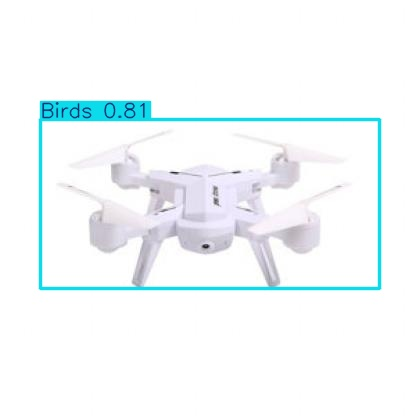

In [ ]:
display(Image(filename="runs/detect/predict/pic_443_jpg.rf.9ac4ad3587736f237ef72df16da5199c.jpg"))


**Step 8 — Export model**

In [ ]:
model.export(format="onnx")     # ONNX
model.export(format="tflite")   # TensorFlow Lite
model.export(format="torchscript")


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.77...
ONNX: export success ✅ 1.6s, saved as '/content/runs/detect/train2/weights/best.onnx' (42.7 MB)

Export complete (3.2s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train2/weights/best.onnx imgsz=640 data=/content/aerial_dataset/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) 

'/content/runs/detect/train2/weights/best.torchscript'

**Step 9 — Use the Model in Real-Time**

In [ ]:
from google.colab import output
from google.colab import files
from PIL import Image
import io
import base64

def take_photo(filename='captured.jpg'):
    from IPython.display import Javascript
    js = Javascript('''
      async function takePhoto() {
        const div = document.createElement('div');
        document.body.appendChild(div);

        const video = document.createElement('video');
        div.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getTracks()[0].stop();

        const data = canvas.toDataURL('image/jpeg', 0.9);
        google.colab.kernel.invokeFunction('notebook.save_photo', [data], {});
      }
      takePhoto();
    ''')
    display(js)

def save_photo(data):
    data = data.split(',')[1]
    img = Image.open(io.BytesIO(base64.b64decode(data)))
    img.save('/content/captured.jpg')
    print("Saved to /content/captured.jpg")

output.register_callback('notebook.save_photo', save_photo)

take_photo()


<IPython.core.display.Javascript object>

Saved to /content/captured.jpg


In [ ]:
!find /content -name "best.pt"


/content/runs/aerial_train/weights/best.pt
/content/runs/aerial_train4/weights/best.pt
/content/runs/aerial_train2/weights/best.pt
/content/runs/detect/train2/weights/best.pt
/content/runs/aerial_train3/weights/best.pt


In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train2/weights/best.pt')


In [ ]:
!ls /content


aerial_dataset						drive	     yolo11n.pt
calibration_image_sample_data_20x128x128x3_float32.npy	runs	     yolov8s.pt
captured.jpg						sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving signature.jpg to signature.jpg


In [ ]:
model.predict(source="/content/captured.jpg", save=True)



image 1/1 /content/captured.jpg: 480x640 1 Drones, 99.6ms
Speed: 9.9ms preprocess, 99.6ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Drones', 1: 'Birds'}
 obb: None
 orig_img: array([[[101, 100, 109],
         [ 98,  97, 106],
         [ 96,  95, 104],
         ...,
         [158, 156, 156],
         [160, 158, 158],
         [161, 159, 159]],
 
        [[102, 101, 110],
         [100,  99, 108],
         [ 98,  97, 106],
         ...,
         [158, 156, 156],
         [160, 158, 158],
         [161, 159, 159]],
 
        [[103, 102, 111],
         [101, 100, 109],
         [100,  99, 108],
         ...,
         [159, 157, 157],
         [159, 157, 157],
         [160, 158, 158]],
 
        ...,
 
        [[ 78,  84,  89],
         [ 80,  86,  91],
         [ 82,  88,  93],
         ...,
         [177, 181, 176],
         [193, 197, 191],
         [207, 211, 205]],
 
        [[ 79,  85,  90],
         [ 81,  87,  92],
         [ 85,  91,  96],
         ...,
      

In [ ]:
# Run validation and save all plots automatically
results = model.val(save=True)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.9±4.8 MB/s, size: 31.5 KB)
val: Scanning /content/aerial_dataset/valid/labels.cache... 448 images, 6 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 448/448 215.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 28/28 2.8it/s 10.0s
                   all        448        663      0.887      0.737       0.81       0.53
                Drones        217        414      0.837      0.606      0.711      0.418
                 Birds        225        249      0.937      0.867      0.909      0.642
Speed: 3.6ms preprocess, 8.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val3


In [ ]:
!ls runs/detect/


predict  predict2  train  train2  val  val2  val3


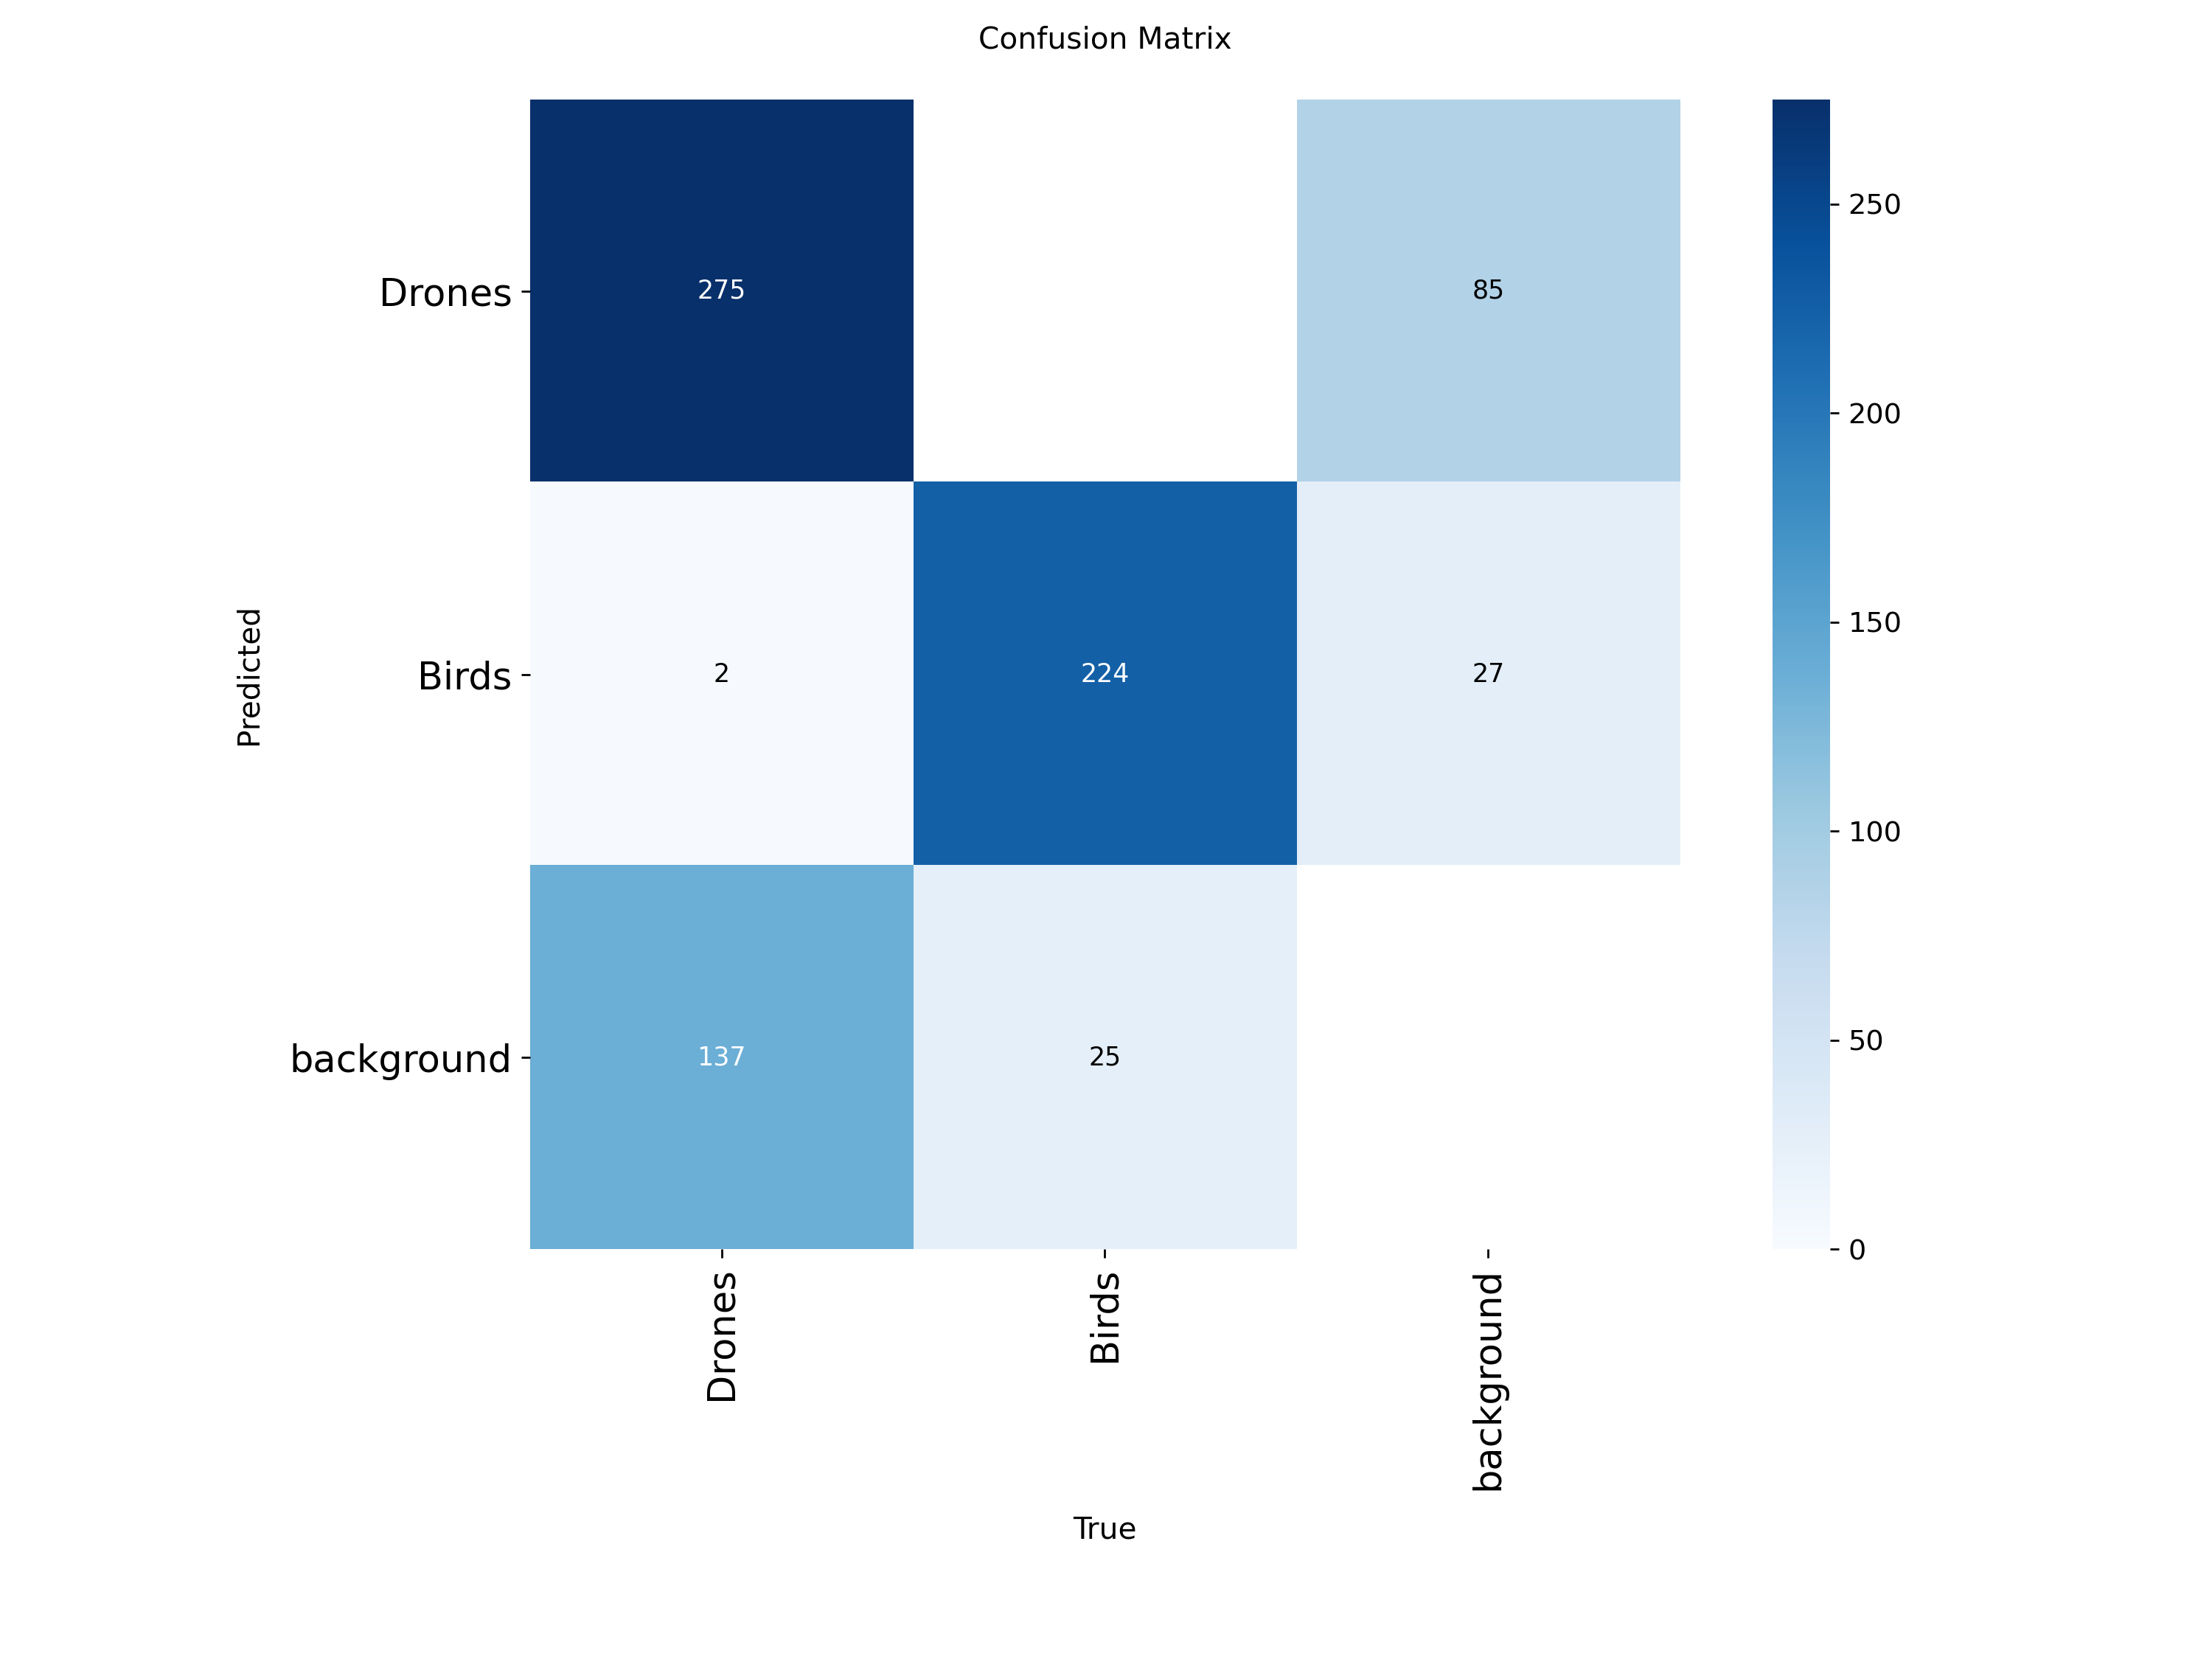

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/val/confusion_matrix.png'))


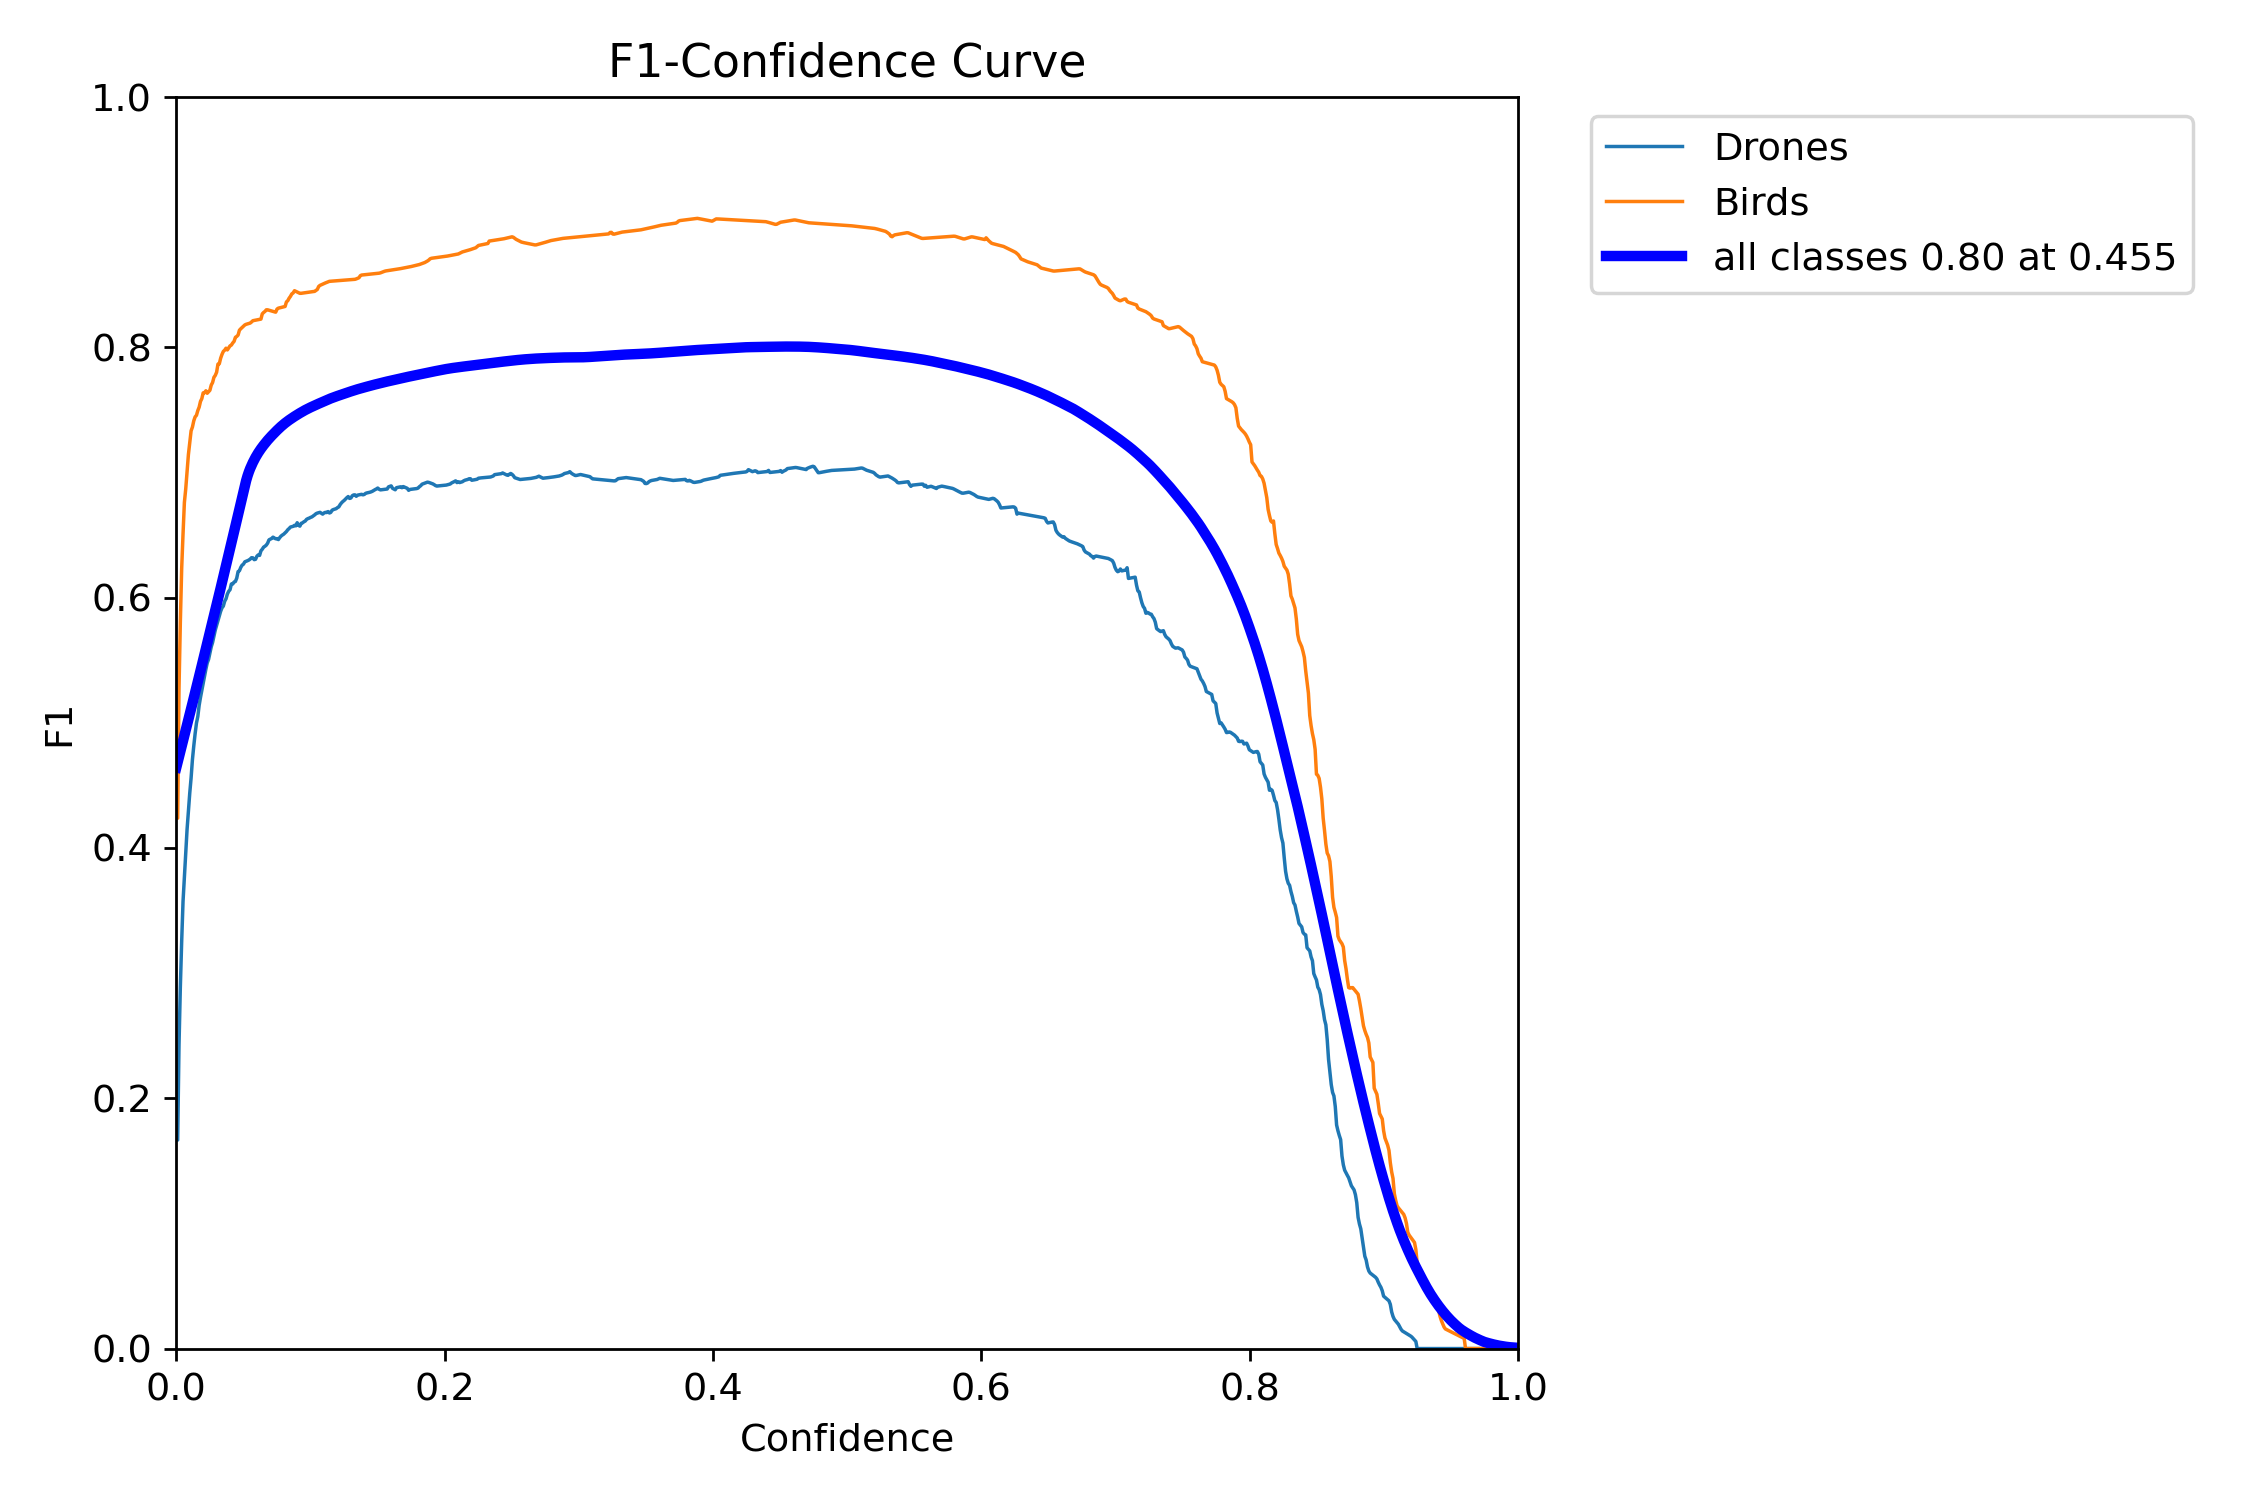

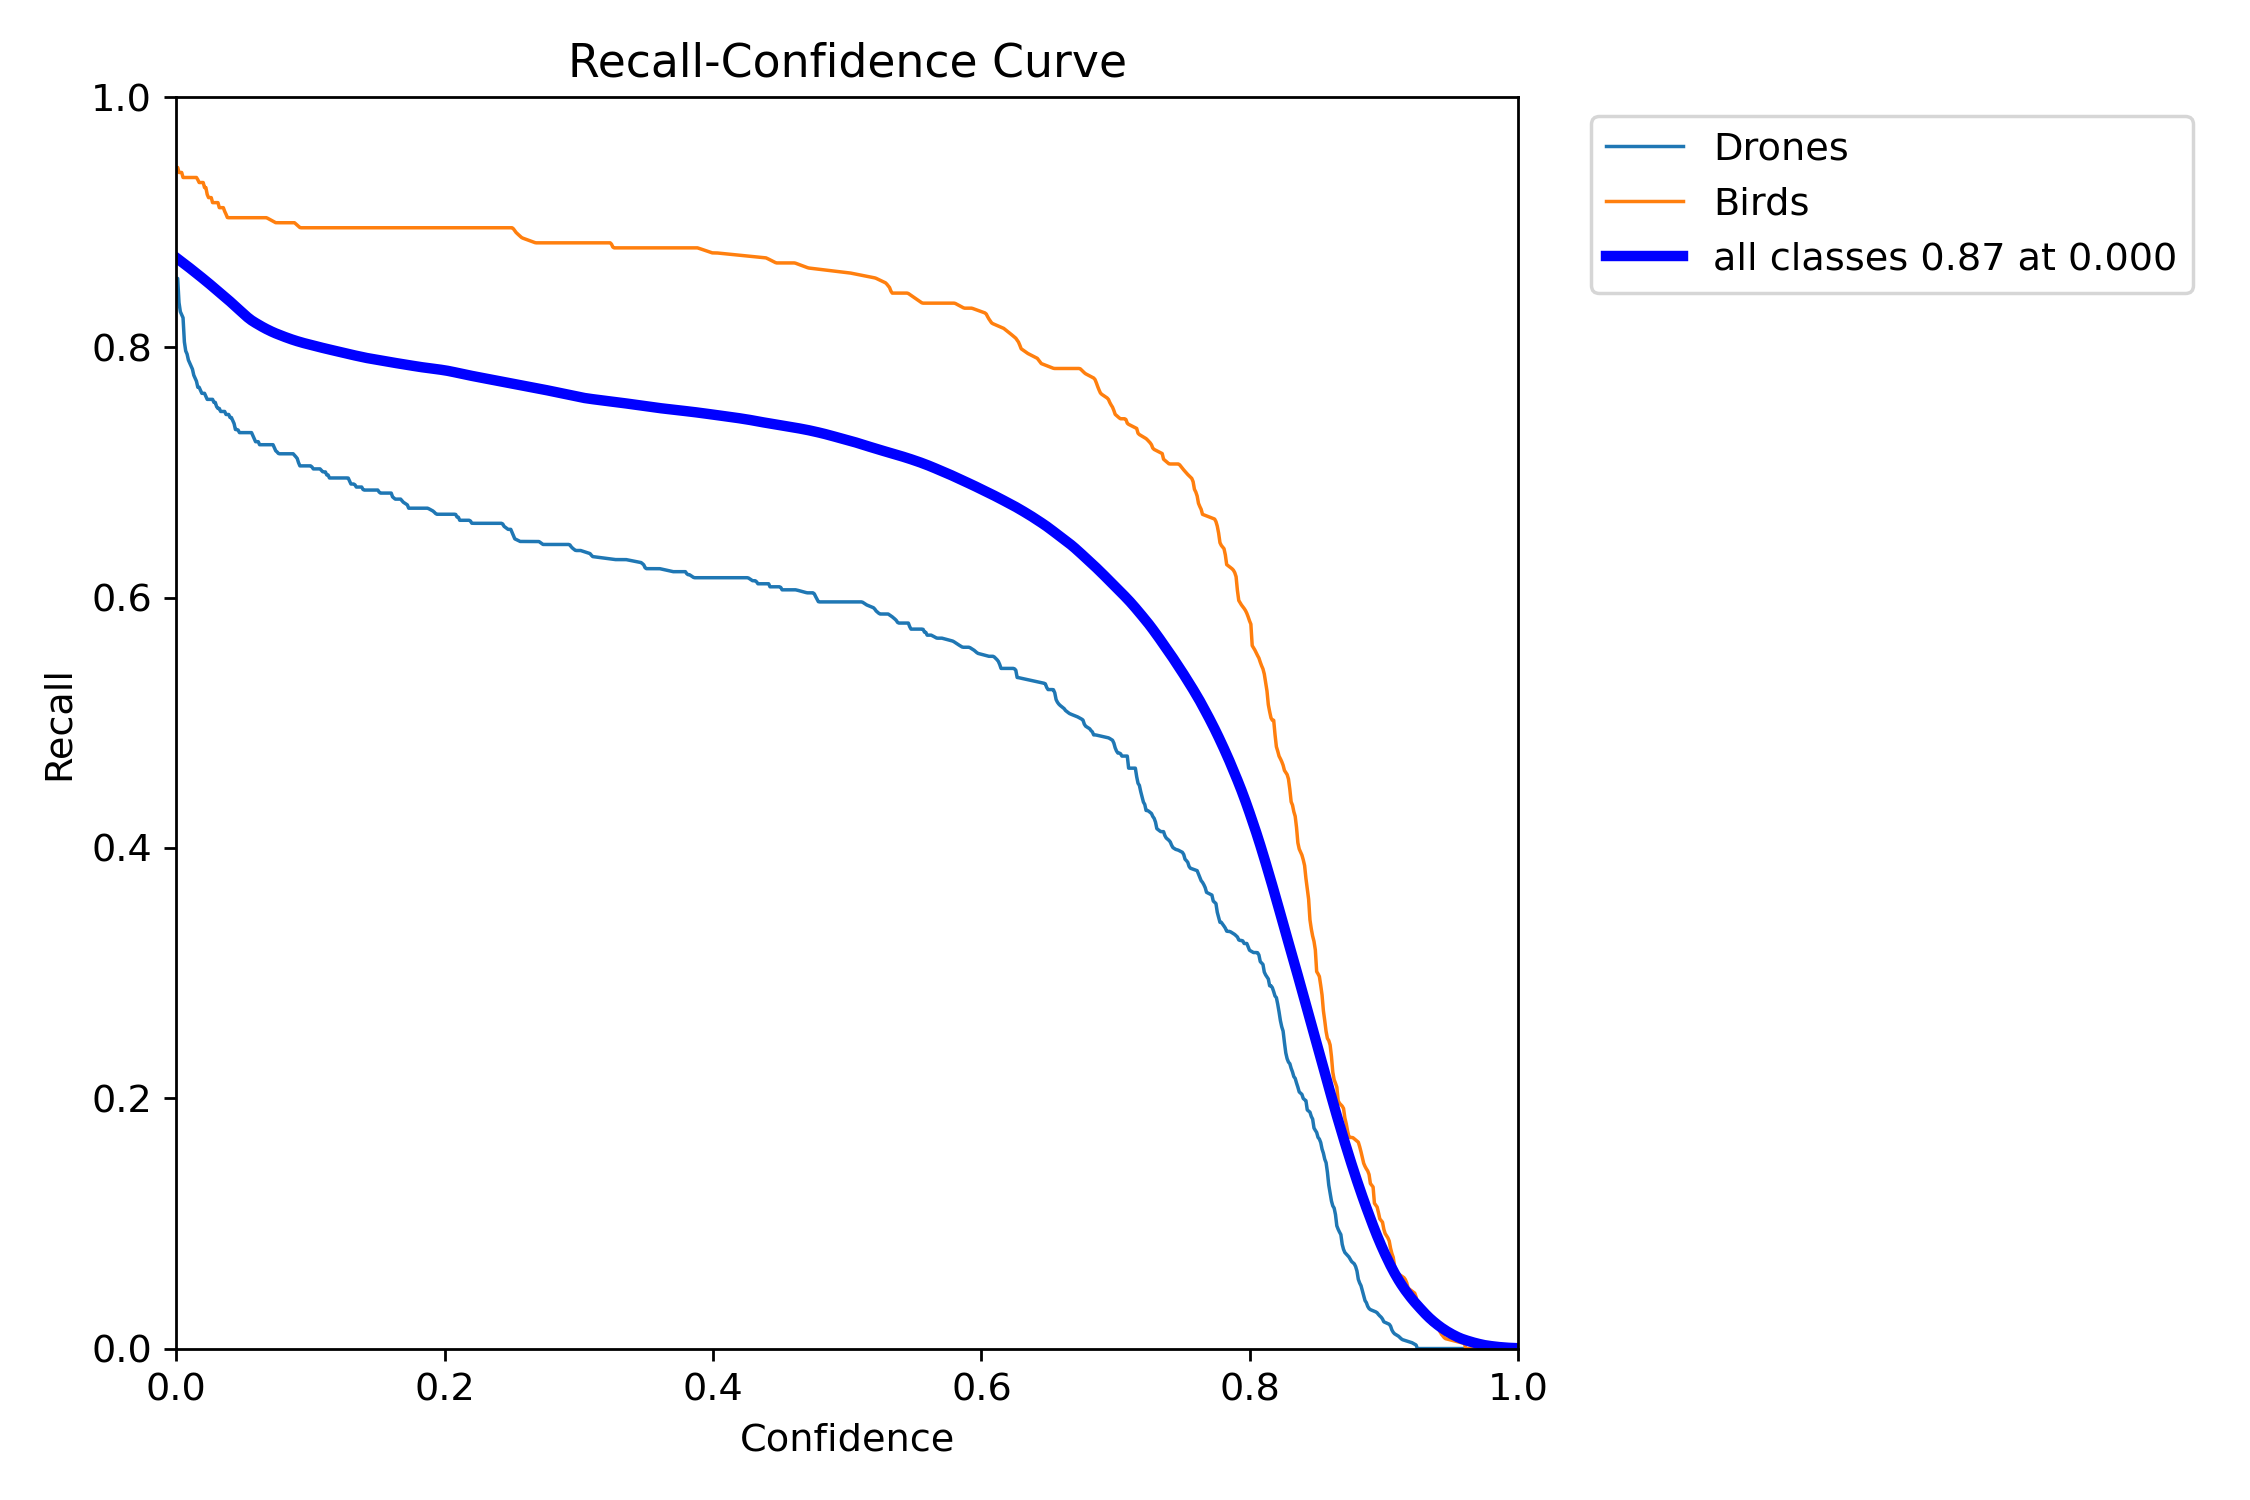

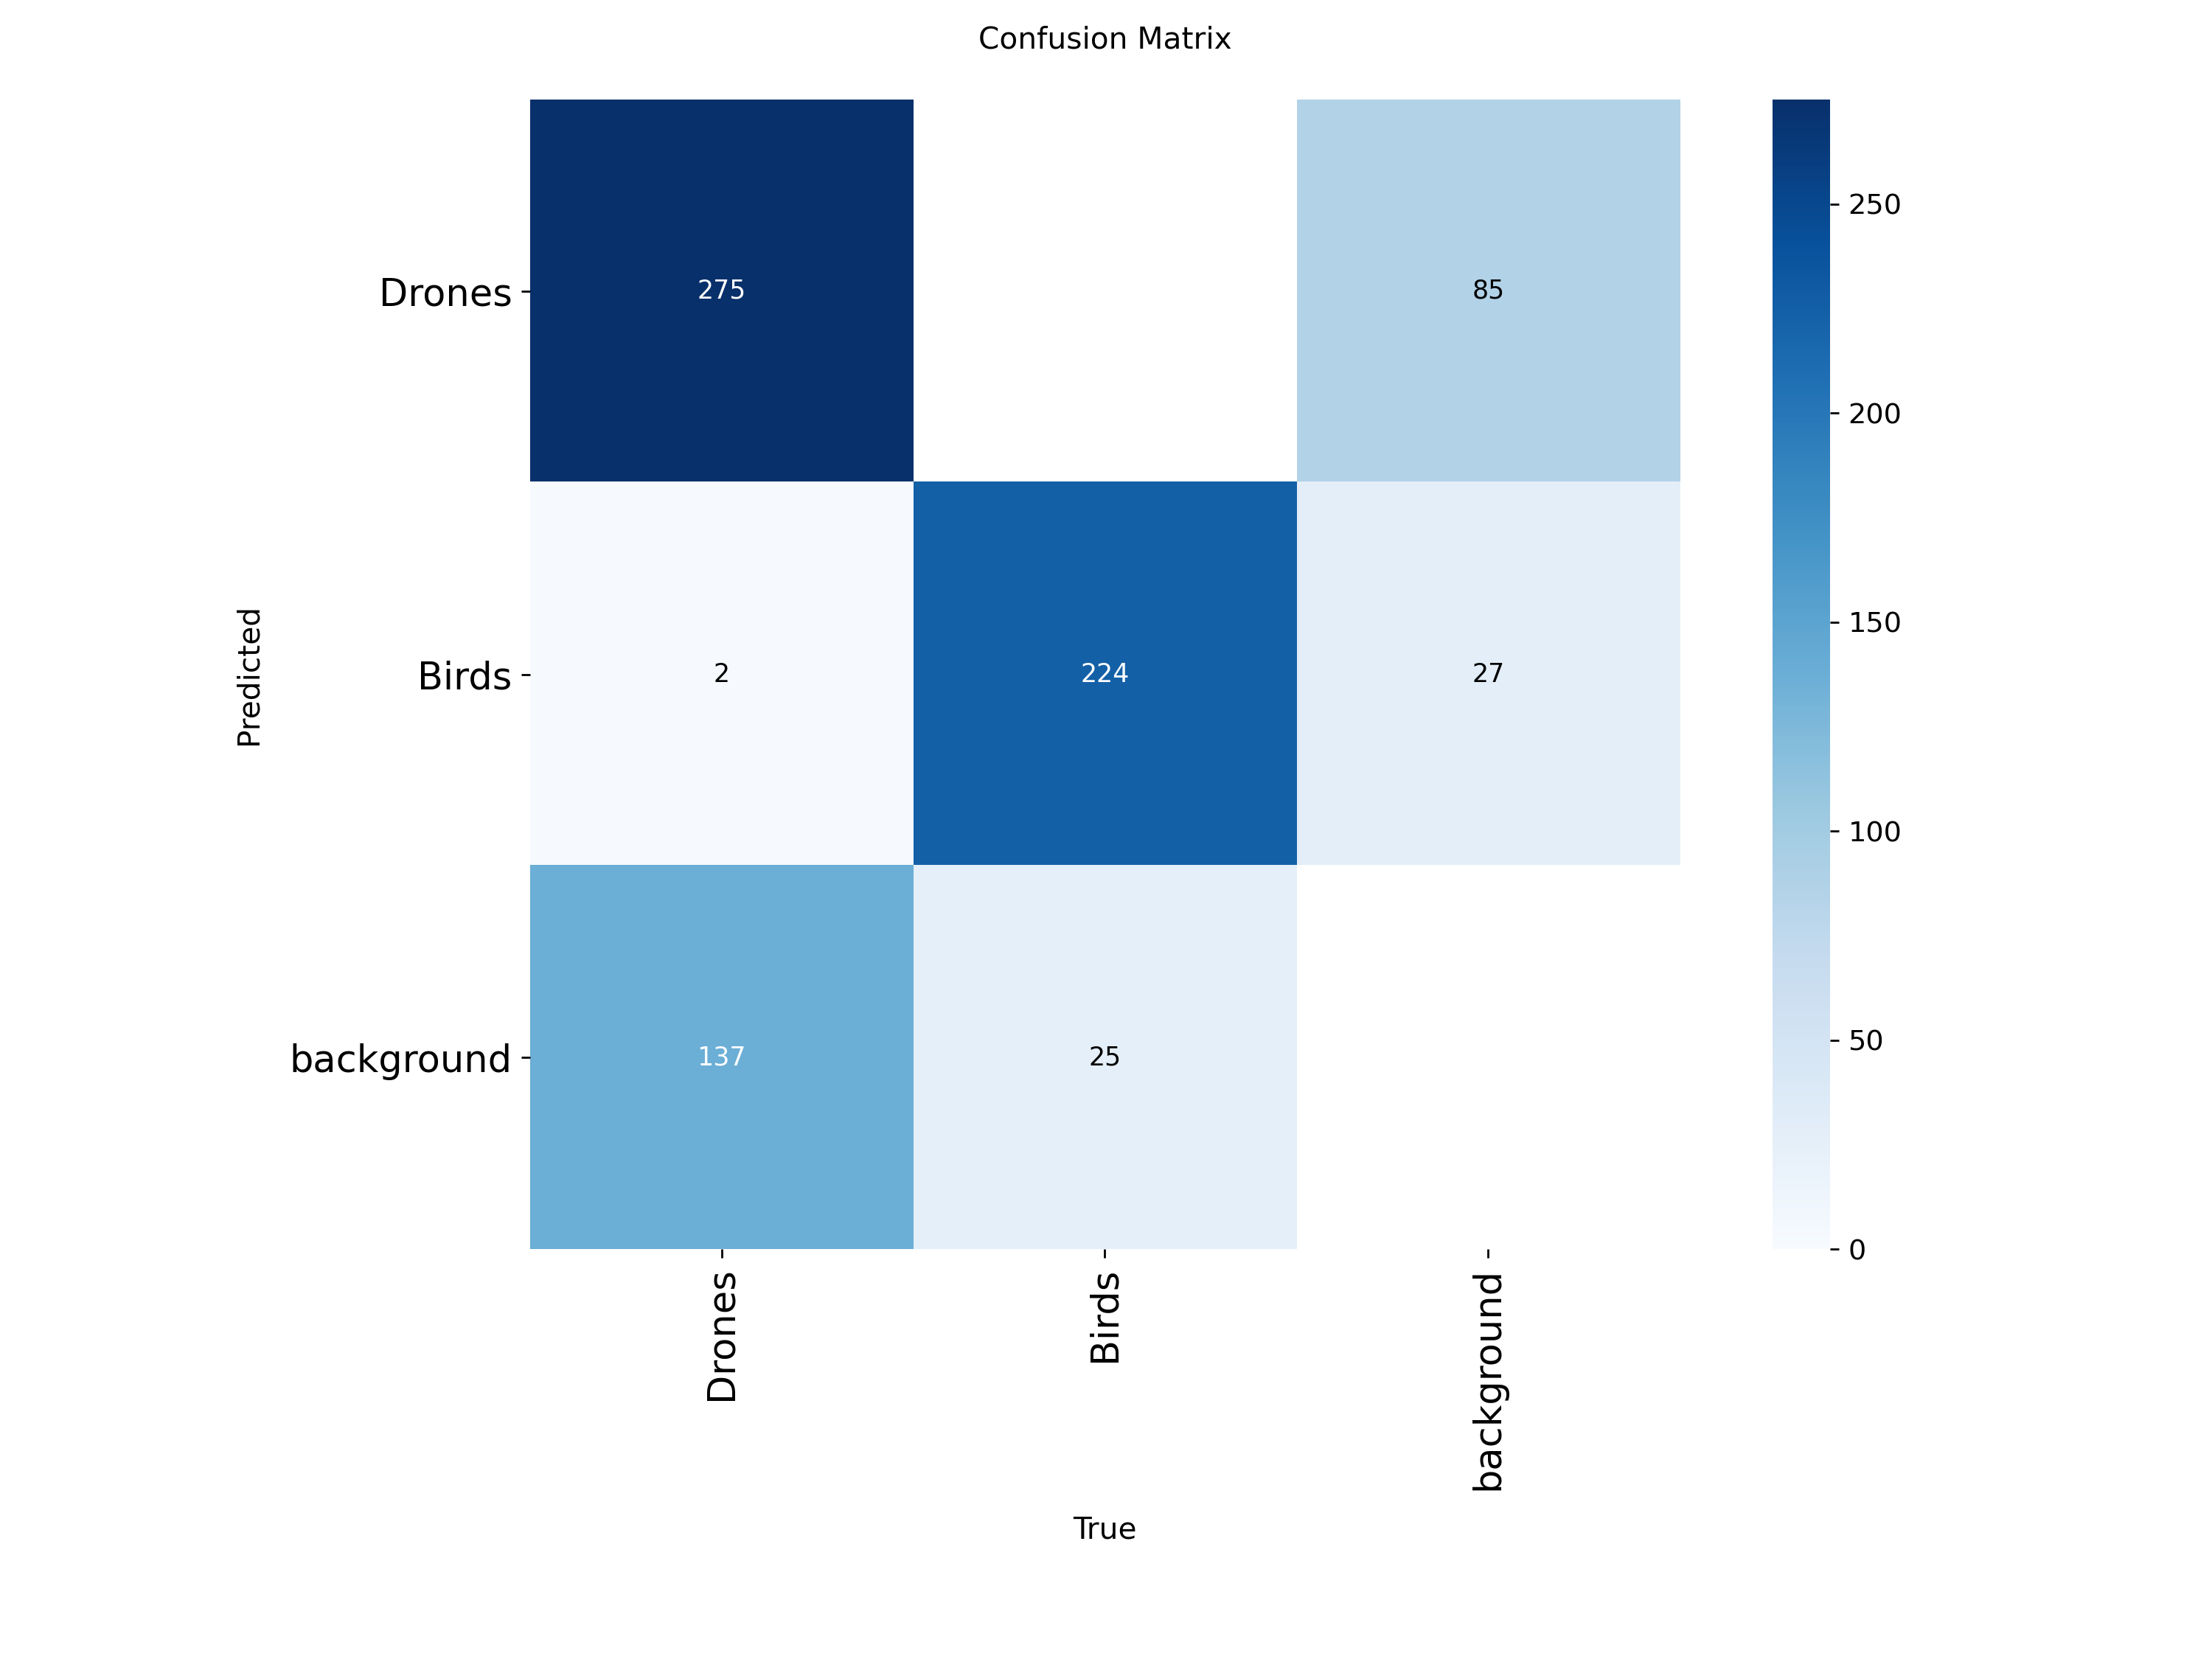

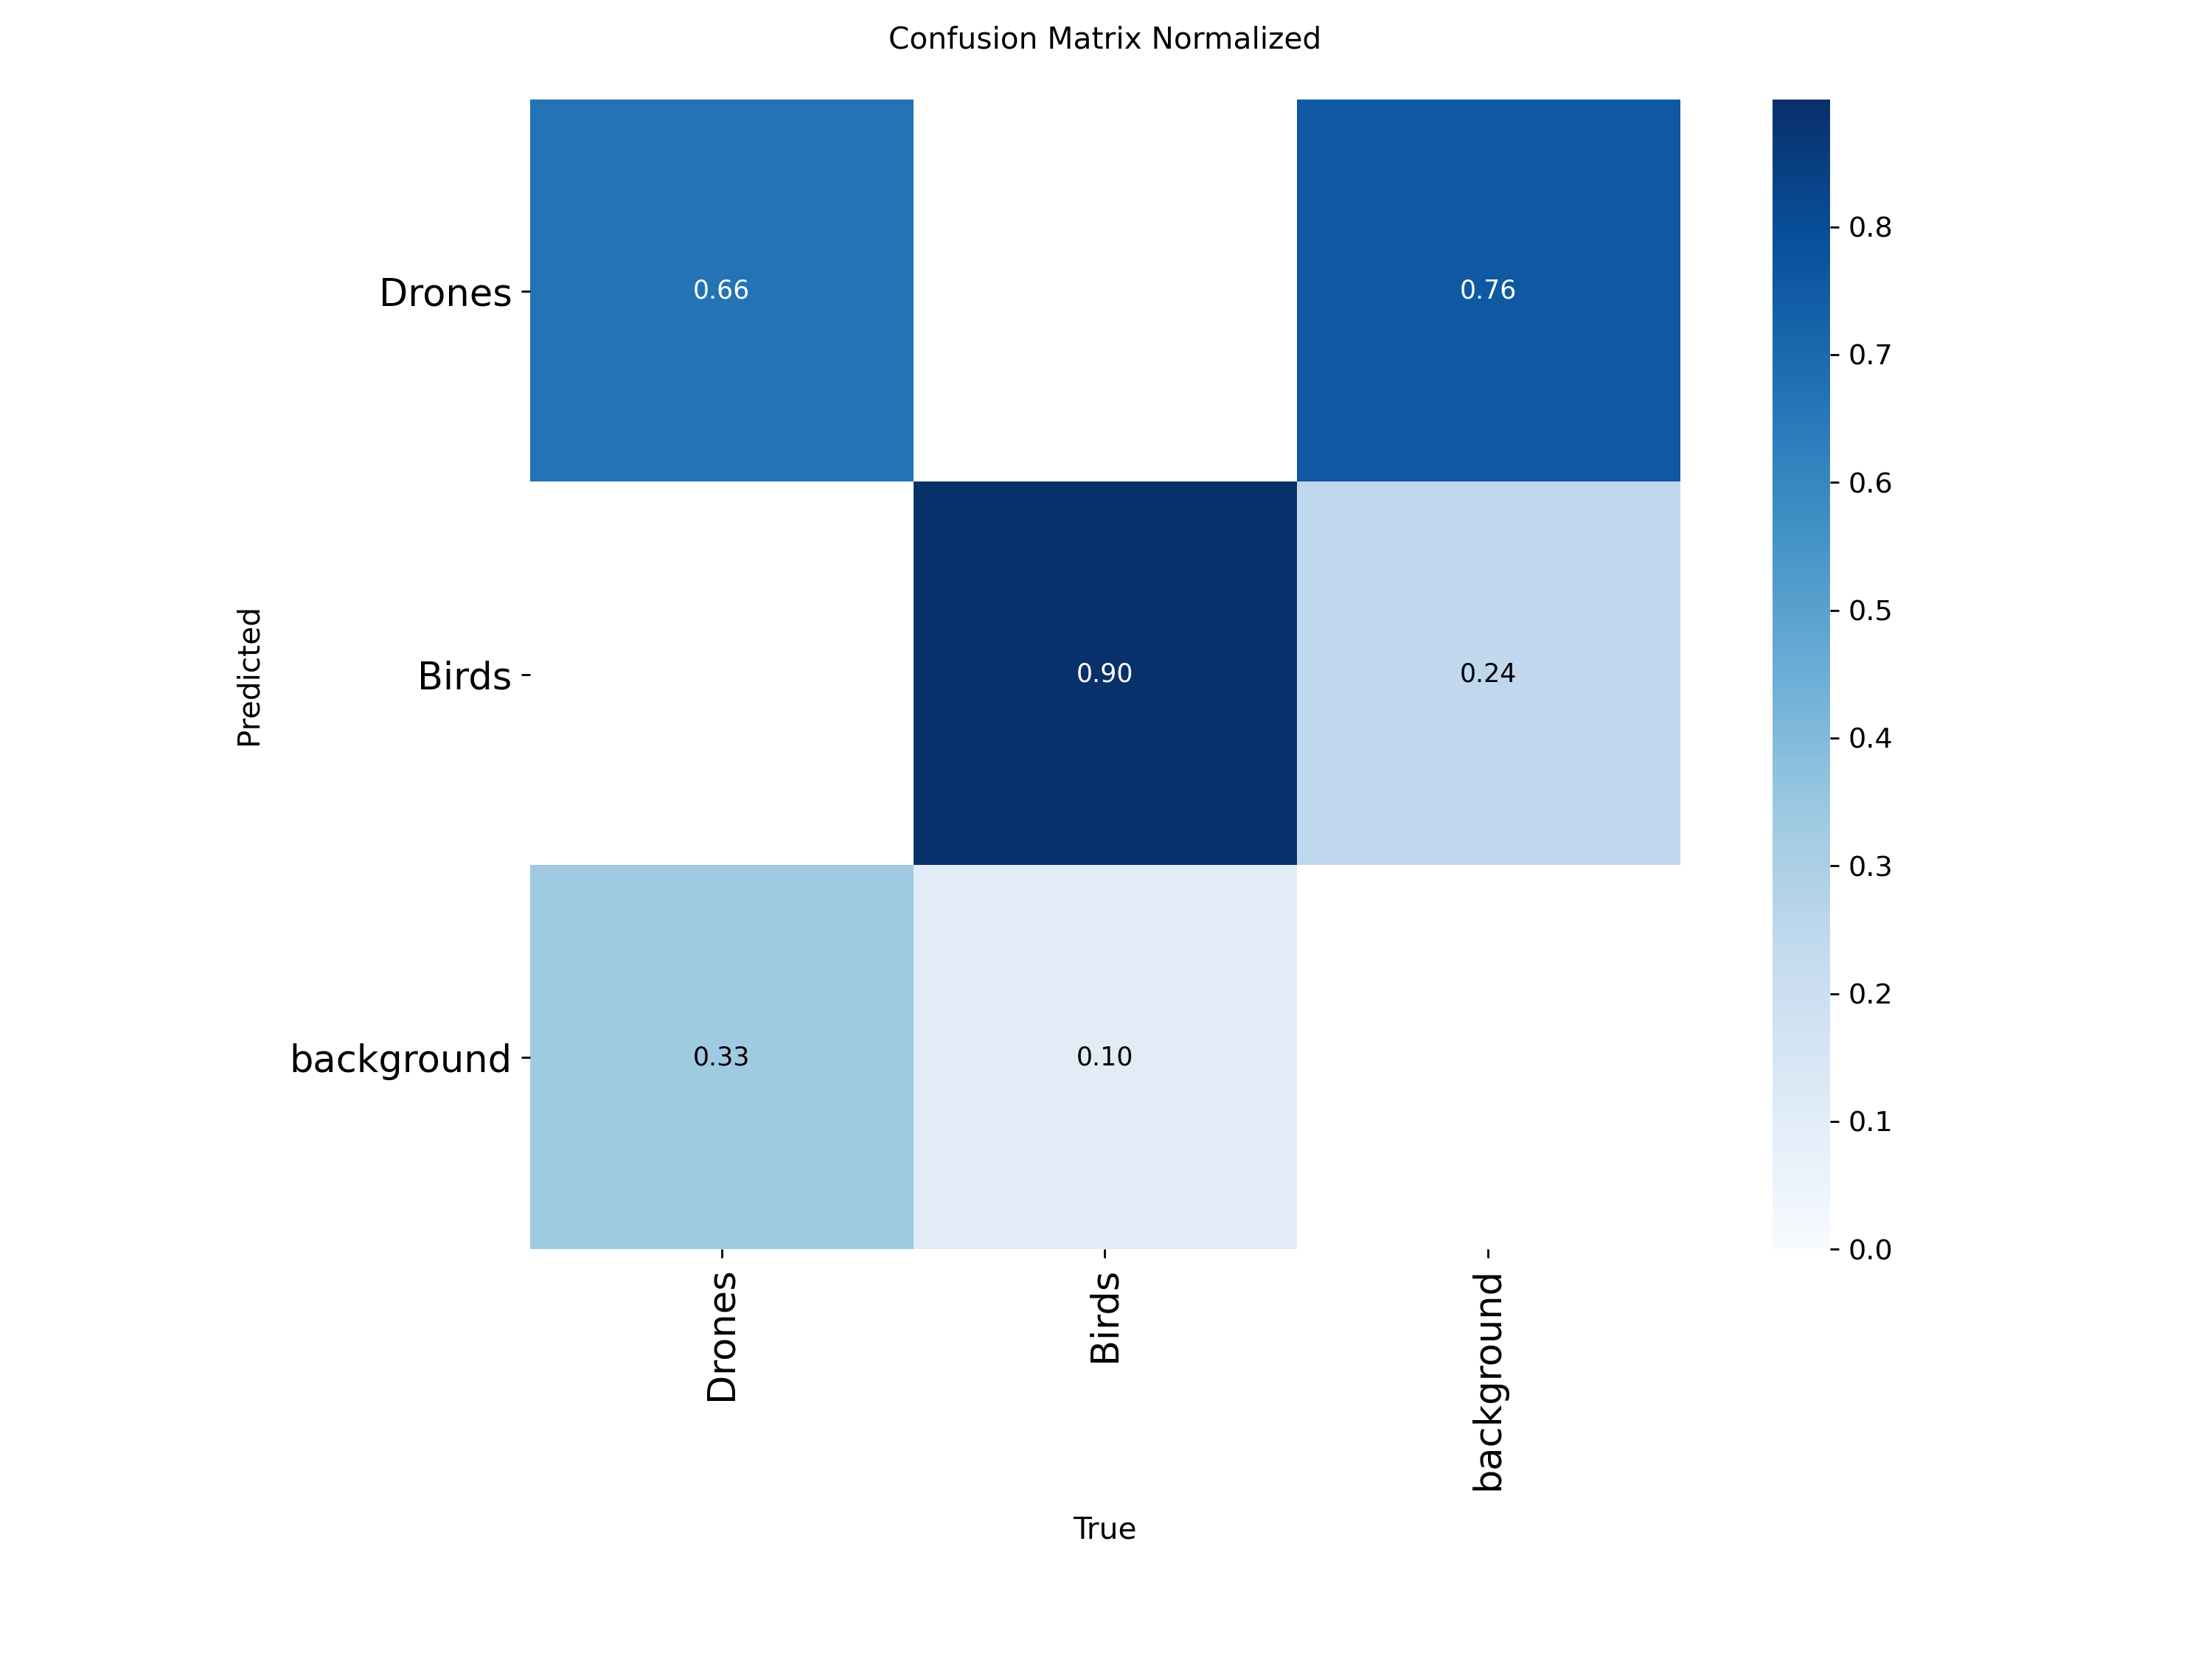

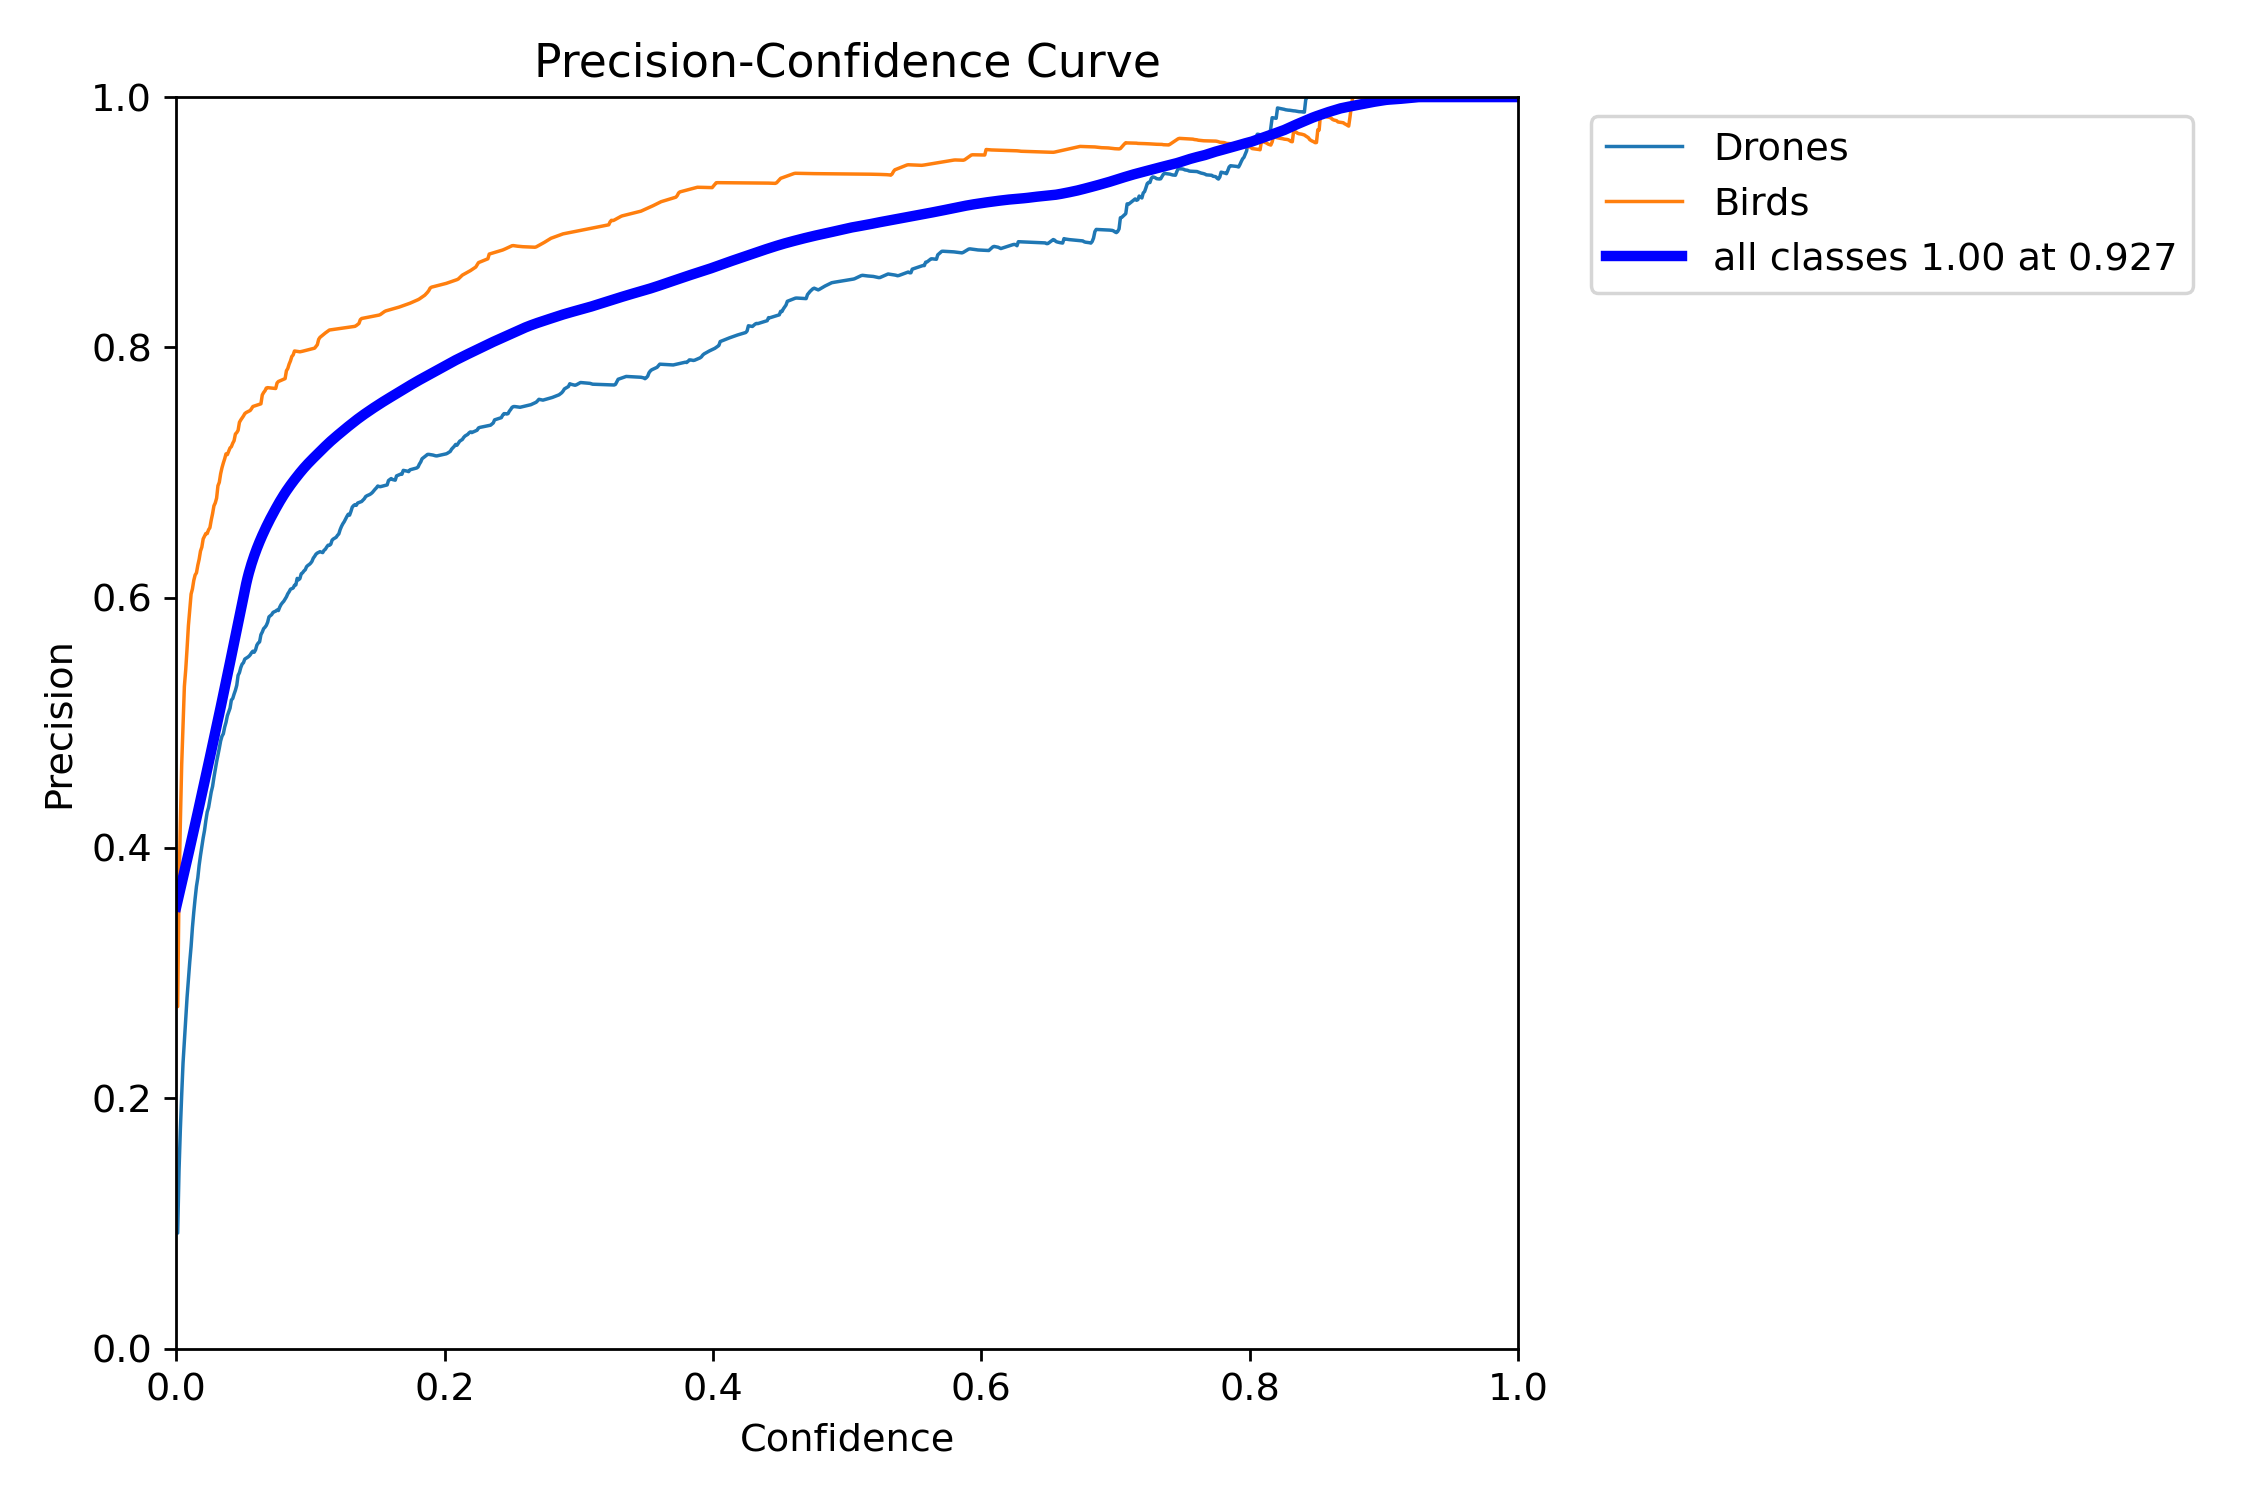

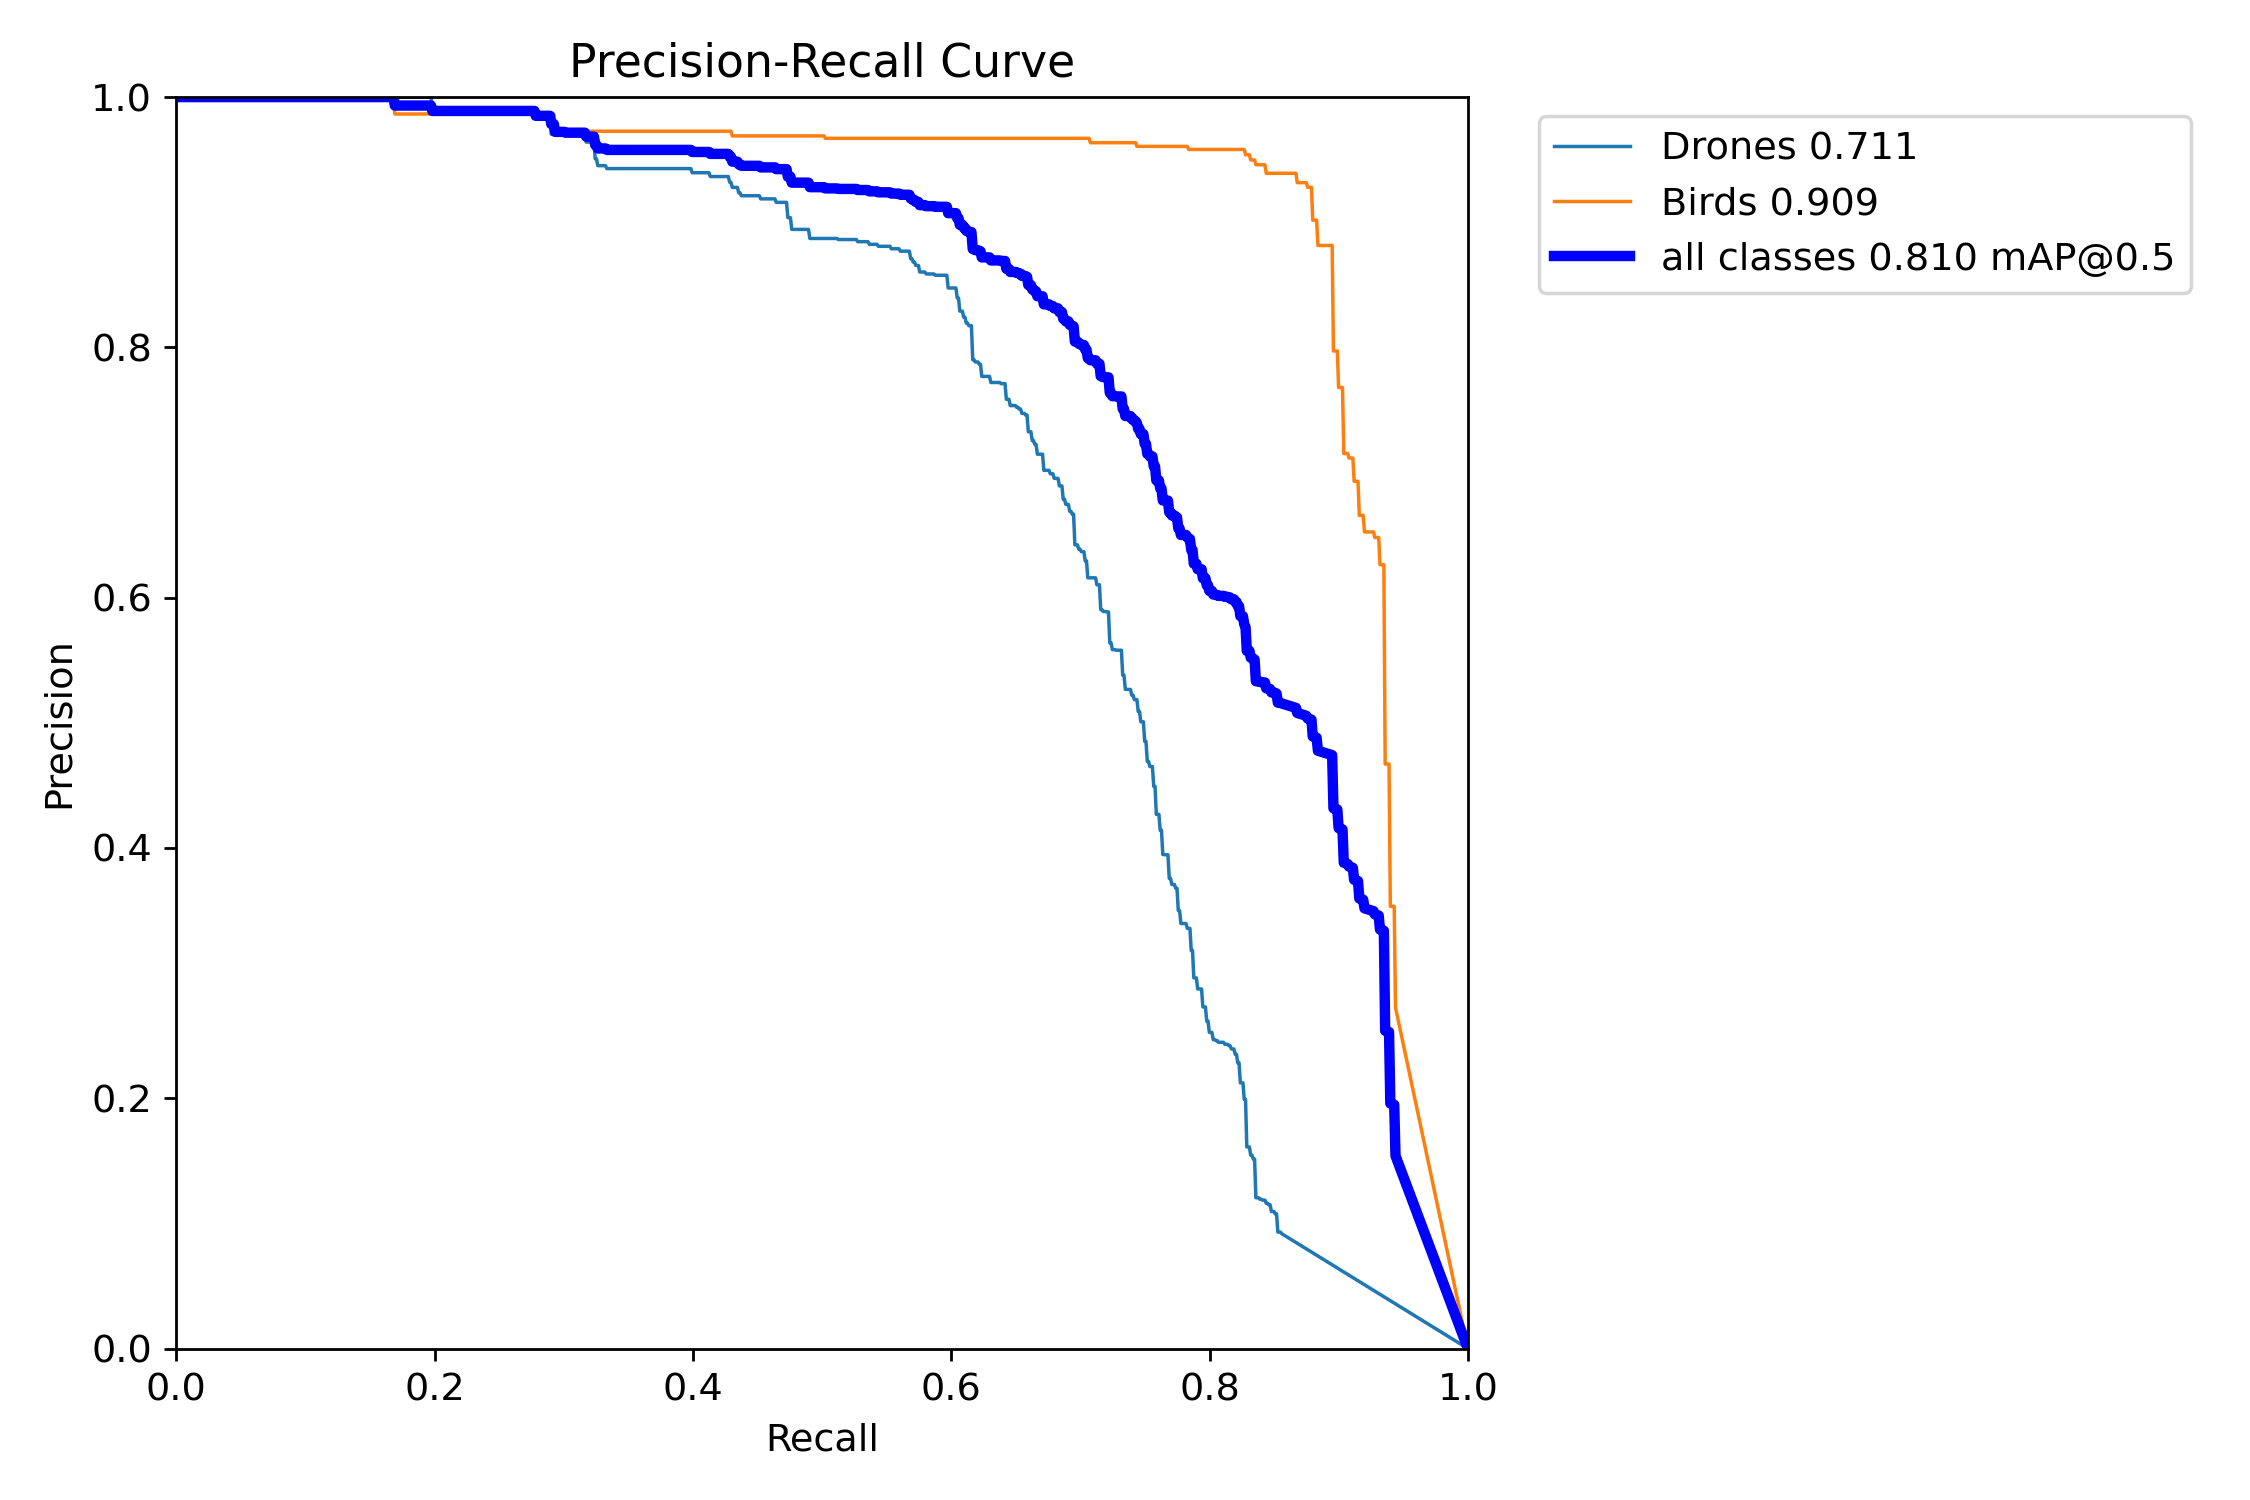

In [ ]:
import glob

val_folder = sorted(glob.glob('runs/detect/val*'))[-1]  # latest validation folder

for img_path in glob.glob(f"{val_folder}/*.png"):
    display(Image(filename=img_path))
